---

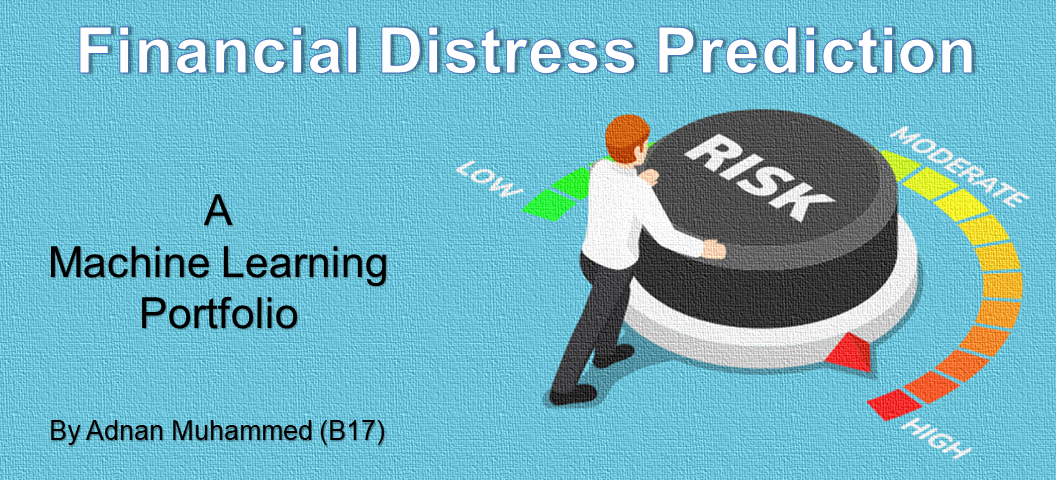

---

<a id="100"></a>
## Table of Contents

<font size =4>

<br/>
    
1. [Introduction](#1)

    <br/>

2. [Objective](#2)
   - [Project Plan](#21)

    <br/>

3. [Dataset Load and Study](#3)
   - [Imports](#31)
   - [Load Data](#32)
   - [The Dataset - Give me some Credit](#33)
    
    <br/>

4. [EDA](#4)
   - [Varible Review - age](#41)
   - [Varible Review - MonthlyIncome](#42)
   - [Varible Review - NumberOfDependents](#43)
   - [Varible Review - DebtRatio](#44)
   - [Varible Review - RevolvingUtilizationOfUnsecuredLines](#45)
   - [Varible Review - NumberOfOpenCreditLinesAndLoans](#46)
   - [Varible Review - NumberRealEstateLoansOrLines](#47)
   - [Varible Review - NumberOfTime30-59DaysPastDueNotWorse](#48)
   - [Varible Review - NumberOfTime60-89DaysPastDueNotWorse](#49)
   - [Varible Review - NumberOfTimes90DaysLate](#410)
   - [Varible Review - SeriousDlqin2yrs](#411)
   - [Defining Cleaning Function](#412)
   - [Correlations](#413)
      - [Correlation Plots](#4131)
      - [Variance Inflation Factor](#4132)
      - [t-test](#4133)
    
    <br/>

5. [Feature Engineering](#5)
   - [Exploring Data](#51)
   - [Custom Features](#52)
   - [Defining Feature Engineering Function](#53)
    
    <br/>

6. [Modelling](#6)
   - [Basic Model](#61)
   - [Transformation](#62)
   - [GridSearch and ROC Curve Functions](#63)
   - [All Models with GridSearch](#64)
      - [Logistic Regression](#641)
      - [Random Forest](#642)
      - [Gradient Boosting](#643)
      - [XGBoost](#644)
      - [LightGBM](#645)
      - [CatBoost](#646)
      - [Adaboost](#647)
      - [Deep Learning](#648)
         - [Multi-Layer Perceptron (MLP)](#6481)
         - [KerasClassifier](#6482)
   - [Model Performance](#65)
   - [Model Ensemble Methods](#66)
      - [Voting Classifier](#661)
      - [Stacking Classifier](#662)
   - [Final Model Study](#67)
   - [Model Interpretation](#68)
      - [Lime Tabular](#681)
      - [Shap Tree](#682)
   - [Test Model](#69)
    
    <br/>

7. [Pipeline](#7)
    
    <br/>

8. [Conclusion](#8)

<a id="1"></a>
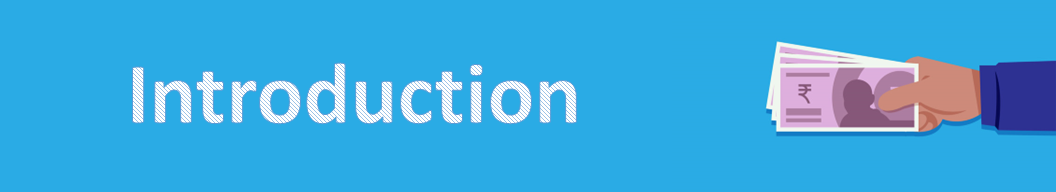

[Back to Contents](#100)

## Why predict for Financial Distress?

<br/>
<font size=3>

**Credit risk modeling**  and **financial distress prediction** are important tools for assessing the likelihood of a borrower defaulting on a loan or experiencing financial difficulties in the future. These tools are essential for lenders, investors, and other stakeholders who are exposed to financial risks.

Some specific reasons why credit risk modeling and financial distress prediction are important:

- **Helps lenders make informed decisions**: Credit risk modeling helps lenders evaluate the creditworthiness of potential borrowers and determine the likelihood that a borrower will default on a loan. This information is essential for lenders when making lending decisions, setting interest rates, and determining loan terms.

- **Protects investors and stakeholders**: Financial distress prediction helps investors and other stakeholders identify companies and borrowers that are at high risk of experiencing financial difficulties or defaulting on their obligations. This information can help stakeholders take appropriate actions to mitigate their risks, such as selling their investments or reducing their exposure.

- **Improves risk management**: Credit risk modeling and financial distress prediction are important components of effective risk management. By identifying potential risks and predicting the likelihood of financial difficulties, lenders and other stakeholders can develop strategies for managing their risks and protecting themselves from potential losses.

- **Supports regulatory compliance**: Many financial institutions are subject to regulatory requirements related to credit risk management and financial distress prediction. Compliance with these regulations is essential for maintaining the safety and stability of the financial system.

Overall, credit risk modeling and financial distress prediction are **important tools for managing financial risks and protecting stakeholders from potential losses**. By providing insights into the creditworthiness and financial health of borrowers and companies, these tools help lenders, investors, and other stakeholders make informed decisions and manage their risks effectively.

---

<a id="2"></a>
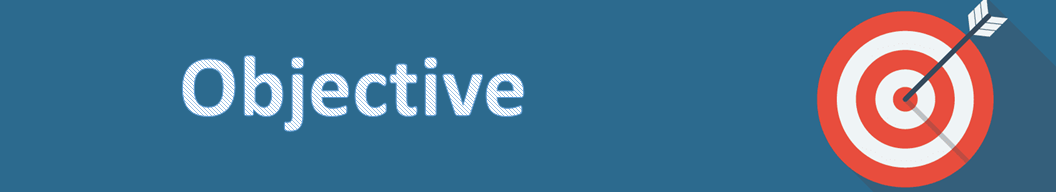

[Back to Contents](#100)

## What are we predicting in this project? Why are we predicting it?
<br/>

<font size=3>
    
With the given dataset, we will be predicting for the likelihood of the borrower to fall into financial distress and default on a loan based on their past credit behavior and other variables. Predicting an individual's financial distress is important for several reasons:

- **Risk Management**: Banks and other financial institutions need to manage the risk of default by their borrowers. Predicting an individual's financial distress can help banks identify customers who are at a higher risk of defaulting on their loans. This allows them to take proactive measures to mitigate potential losses, such as adjusting interest rates or reducing credit limits.

- **Credit Decisions**: Banks use credit scores and other indicators of financial health to make lending decisions. Predicting an individual's financial distress can provide additional information to help banks make more informed credit decisions. Banks can use this information to determine whether to approve a loan, set interest rates, or adjust other terms of the loan.

- **Portfolio Management**: Banks need to manage their loan portfolios effectively to maintain their financial health. Predicting an individual's financial distress can help banks identify potential risks in their loan portfolios and take steps to reduce their exposure to these risks. This can help banks avoid losses and maintain their financial stability.

- **Compliance**: Banks are subject to regulatory requirements that require them to manage their risks effectively. Predicting an individual's financial distress can help banks comply with these regulations and avoid penalties or other regulatory action.

- **Customer Service**: Banks have a responsibility to provide good customer service to their customers. Predicting an individual's financial distress can help banks identify customers who may be struggling financially and provide them with the support they need to manage their finances effectively. This can help build trust and loyalty with customers and improve the overall customer experience.

    With this dataset, predicting an individual's financial distress can help banks identify customers who are at a higher risk of defaulting on their loans. This allows them to take proactive measures to manage their risks and avoid potential losses, while also providing support to customers who may be struggling financially. The **AUC (Area Under the Curve)** is a commonly used metric to evaluate the performance of binary classification models, such as those used to predict financial distress. The AUC represents the probability that the model will correctly rank a randomly chosen positive example (i.e., a case of financial distress) higher than a randomly chosen negative example (i.e., a case without financial distress). This is explained more in next section.
    

## What is the metric we will be predicting for?
<br/>

<font size=3>
    
In this project we are predicting for the classification metric of **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**. AUC-ROC is a widely used evaluation metric for binary classification problems that measures the model's ability to distinguish between positive and negative classes by plotting the true positive rate (TPR) against the false positive rate (FPR) at various thresholds. 
    
**TPR (True Positive Rate)** and **FPR (False Positive Rate)** are two common performance measures used in binary classification problems.

- **TPR**: The true positive rate is the proportion of actual positive cases that are correctly identified by the model. It is calculated as the number of true positives divided by the sum of true positives and false negatives. Mathematically, TPR = TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.

- **FPR**: The false positive rate is the proportion of actual negative cases that are incorrectly classified as positive by the model. It is calculated as the number of false positives divided by the sum of false positives and true negatives. Mathematically, FPR = FP / (FP + TN), where FP is the number of false positives and TN is the number of true negatives.

To get TPR and FPR values for a given model and threshold, we need to calculate the confusion matrix, which is a table that summarizes the classification results of the model. The confusion matrix contains four values: true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN). Once we have the confusion matrix, we can calculate TPR and FPR for a given threshold using the formulas above.

The ROC curve is created by varying the decision threshold of the model and plotting TPR against FPR at each threshold. The AUC-ROC score is then calculated as the area under the ROC curve. The AUC-ROC score ranges between 0 and 1, with a score of 0.5 indicating random guessing and a score of 1 indicating perfect classification performance. **The higher the AUC-ROC score, the better the model's predictive performance.**
    
---

**<font size=4 color='green'>The highest AUC score in the Kaggle competition was 0.86955. The goal with this project is to reach as close to the same.</font>**
    
---

    

<a id="21"></a>

## Project Outline - Plan and Goals

[Back to Contents](#100)

<font size =3>
    
**This flowchart walks through the steps undertaken in this project. Only the Headings and Some subheadings are specified. The details version is foudn in each section.**

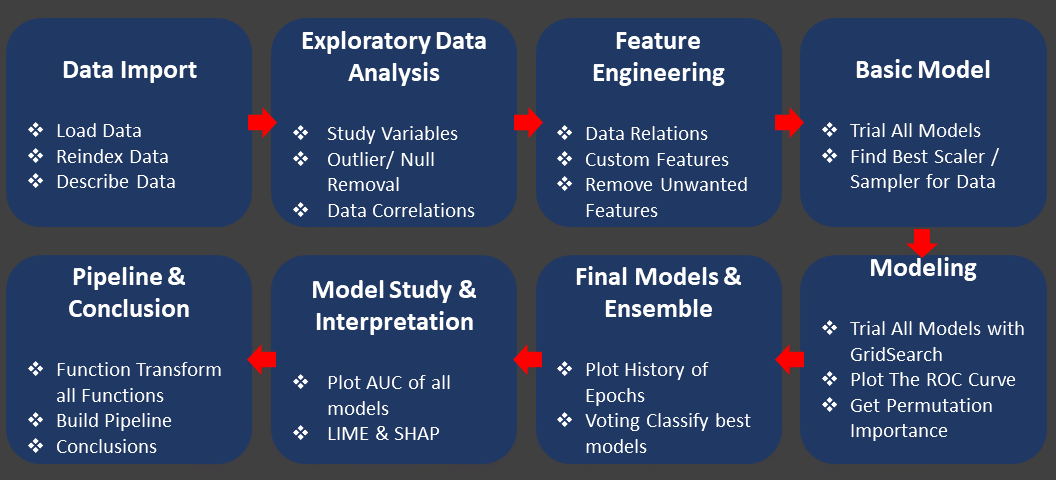

---

<a id="3"></a>
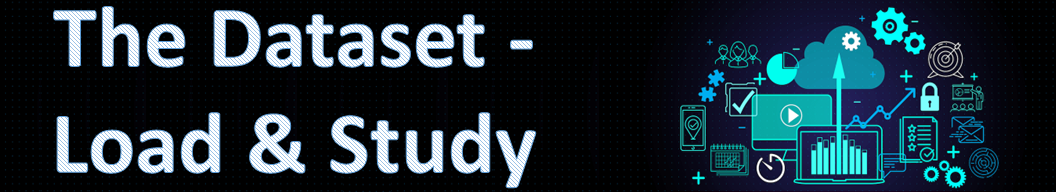

[Back to Contents](#100)

### We need Import all the libraries required for this project.

<a id="31"></a>

## Imports

In [8]:
#main
import pandas as pd
import numpy as np
import re

# visualiation libraries
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

#stats
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#Scalers
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE

# model interpretablity
import eli5
from eli5.sklearn import PermutationImportance
from lime.lime_tabular import LimeTabularExplainer
#import shap

# preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, RepeatedEditedNearestNeighbours
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

# metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, auc, roc_curve

# saving the pipeline
from joblib import dump, load

#warnings
import warnings
warnings.filterwarnings('ignore')

# modeling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline as Pipe # distinguish from imblearn pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation

#PCA
from sklearn.decomposition import PCA

#Tools
from functools import reduce

#gpu selection
gpu = '/device:GPU:0'
# with tf.device(gpu):


#----------------------------------------------------------------
# Define Custom Plotting Template For Matplotlib
#----------------------------------------------------------------
large=20; med=16; small=14

# print(plt.style.available)
plt.style.use('ggplot')

params = {'font.family'      : 'monospace',
          'axes.titlesize'   : large,
          'axes.titleweight' : 'bold',
          'axes.labelsize'   : large,
          'axes.labelweight' : 'bold',
          'xtick.labelsize'  : small,
          'ytick.labelsize'  : small,
          'legend.fontsize'  : small,
          'figure.figsize'   : (6,6),
          'grid.alpha': 0.5}

plt.rcParams.update(params)


from IPython.display import display, HTML
#Align plots in middle of notebook.
display(HTML("<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>"))


<a id="32"></a>

## Load/Import Data

[Back to Contents](#100)

### The dataset is kept in a csv file called _cs-training.csv_ and this is being loaded into a pandas dataframe df.

In [3]:
df = pd.read_csv('cs-training.csv') # Data Reading using Pandas

FileNotFoundError: [Errno 2] No such file or directory: 'cs-training.csv'

In [184]:
df.info() # Summary information of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [185]:
df.head() #First five rows of a dataframe

Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0

In [186]:
df = df.drop('Unnamed: 0', axis=1) # The index Unnamed 0 is dropped

#### The Order of columns is a bit confusing and is changed below:

In [187]:
# get a list of column names in the desired order
new_order = ['age', 'MonthlyIncome', 'NumberOfDependents', 'DebtRatio', 'RevolvingUtilizationOfUnsecuredLines',\
             'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',\
             'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',\
             'SeriousDlqin2yrs']

# reindex the dataframe with the new order of columns
df = df.reindex(columns=new_order)

In [57]:
df.info() # Summary information of a dataframe - New Order of Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   150000 non-null  int64  
 1   MonthlyIncome                         120269 non-null  float64
 2   NumberOfDependents                    146076 non-null  float64
 3   DebtRatio                             150000 non-null  float64
 4   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberRealEstateLoansOrLines          150000 non-null  int64  
 7   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfTimes90DaysLate               150000 non-null  int64  
 10  SeriousDlqin2yrs                      150000 non-null  int64  
dtype

In [58]:
df.head() #First five rows of a dataframe - New Column order

age  MonthlyIncome  NumberOfDependents  DebtRatio  \
0   45         9120.0                 2.0   0.802982   
1   40         2600.0                 1.0   0.121876   
2   38         3042.0                 0.0   0.085113   
3   30         3300.0                 0.0   0.036050   
4   49        63588.0                 0.0   0.024926   

   RevolvingUtilizationOfUnsecuredLines  NumberOfOpenCreditLinesAndLoans  \
0                              0.766127                               13   
1                              0.957151                                4   
2                              0.658180                                2   
3                              0.233810                                5   
4                              0.907239                                7   

   NumberRealEstateLoansOrLines  NumberOfTime30-59DaysPastDueNotWorse  \
0                             6                                     2   
1                             0                                     0   
2                             0                                     1   
3                             0                                     0   
4                             1                                     1   

   NumberOfTime60-89DaysPastDueNotWorse  NumberOfTimes90DaysLate  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        1   
3                                     0                        0   
4                                     0                        0   

   SeriousDlqin2yrs  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

---

<a id="33"></a>

## The Dataset - Give Me Some Credit

<font size=3>

<br/>

**The Dataset can be found [here](https://www.kaggle.com/competitions/GiveMeSomeCredit) on Kaggle**

<br/>

The **Give Me Some Credit** dataset is a public dataset that is often used in credit risk modeling and financial distress prediction. The dataset contains anonymized data on a large number of individuals, and includes various demographic and financial variables that are commonly used to assess creditworthiness.

The dataset was originally released by Kaggle as part of a data science competition, and has since been widely used by researchers and practitioners in the field of credit risk analysis. The **dataset includes over 150,000 observations, each with 11 variables**, including:
    
    
<br/>    
<font size=3>
    

|Feature|Description|Data Type|
|---|---|---|
|**age**                                    |Age of borrower in years                                    | Integer           |
|**MonthlyIncome**                          |Monthly Income                                              |  Real             |
|**NumberOfDependents**                     |Number of dependents in family excluding themselves (spouse, children etc.)                                                                                                                | Integer           |
|**DebtRatio**                              |Monthly debt payments, alimony, living costs divided by monthy gross income                                                                                                                | Percentage        |
|**RevolvingUtilizationOfUnsecuredLines**   |Total balance on credit cards and personal lines of credit except real estate and  no installment debt like car loans divided by the sum of credit limits                                   | Percentage        | 
|**NumberOfOpenCreditLinesAndLoans**        |Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)                                                                                      | Integer           | |**NumberRealEstateLoansOrLines**           |Number of mortgage and real estate loans including home equity lines of credit                                                                                                              | Integer           | 
|**NumberOfTime30-59DaysPastDueNotWorse**   |Number of times borrower has been 30-59 days past due but no worse in the last 2 years.                                                                                                   | Integer           |
|**NumberOfTime60-89DaysPastDueNotWorse**   |Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                                                   | Integer           |
|**NumberOfTimes90DaysLate**                |Number of times borrower has been 90 days or more past due. | Integer           |
|**SeriousDlqin2yrs**                       |Person experienced 90 days past due delinquency or worse    | Categorical (Y/N) |


    
<br/>
    
    
The Give Me Some Credit dataset is commonly used as a **benchmark dataset for credit risk modeling and financial distress prediction**. Researchers and practitioners use this dataset to develop and evaluate predictive models that can identify borrowers who are at high risk of delinquency and default.
    
    
##### The Datatypes were loaded from Data Dictionary file that came with the dataset. The df needs to be updated to reflect the same.

---

<a id="4"></a>

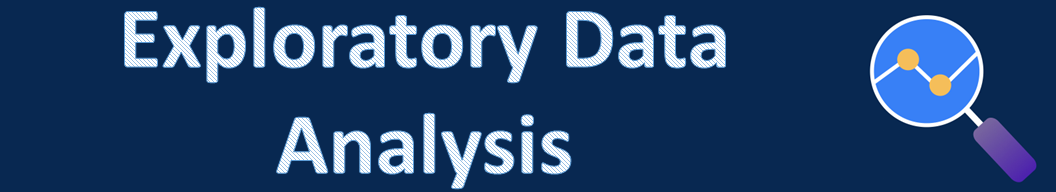

[Back to Contents](#100)

<br/>    
<font size=3>
    
### The target variable in this project is the **SeriousDlqin2yrs**.

Now we need to study each of the columns and how they interact with each other and with the target variable. 
    
The words column and variable will be used interchangeably throughout this notebook. These are both used for referring to a feature or attribute of a dataset such as _SeriousDlqin2yrs_ or _MonthlyIncome_.

<br/>    
<font size=3>
Before that we check for null values in the dataset. This has to be addressed individually depending on Datatype and column values.

In [59]:
df.isnull().sum() # Finding the sum of the null values in each column

age                                         0
MonthlyIncome                           29731
NumberOfDependents                       3924
DebtRatio                                   0
RevolvingUtilizationOfUnsecuredLines        0
NumberOfOpenCreditLinesAndLoans             0
NumberRealEstateLoansOrLines                0
NumberOfTime30-59DaysPastDueNotWorse        0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfTimes90DaysLate                     0
SeriousDlqin2yrs                            0
dtype: int64

<font size=3 color='green'>We need to remove the null values in columns **'MonthlyIncome'** and **'NumberOfDependents'**</font>

<br/>    
<font size=3>
We also take a count of the zeros in the dataset. While zeros are perfectly normal, some columns shouldn't have a zero, like age and monthly income. 

In [60]:
(df.eq(0)).sum()

age                                          1
MonthlyIncome                             1634
NumberOfDependents                       86902
DebtRatio                                 4113
RevolvingUtilizationOfUnsecuredLines     10878
NumberOfOpenCreditLinesAndLoans           1888
NumberRealEstateLoansOrLines             56188
NumberOfTime30-59DaysPastDueNotWorse    126018
NumberOfTime60-89DaysPastDueNotWorse    142396
NumberOfTimes90DaysLate                 141662
SeriousDlqin2yrs                        139974
dtype: int64

<font size=3 color='green'>We need to remove the zeros values in columns **'age'** and **'MonthlyIncome'**</font>

### Lets review each column

<br/>

<a id="41"></a>

### Variable - *age*

<font size = 3>
This variable represents the age of the borrower in years. It is an integer variable.

In [61]:
df['age'].describe() # Describing the variable

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

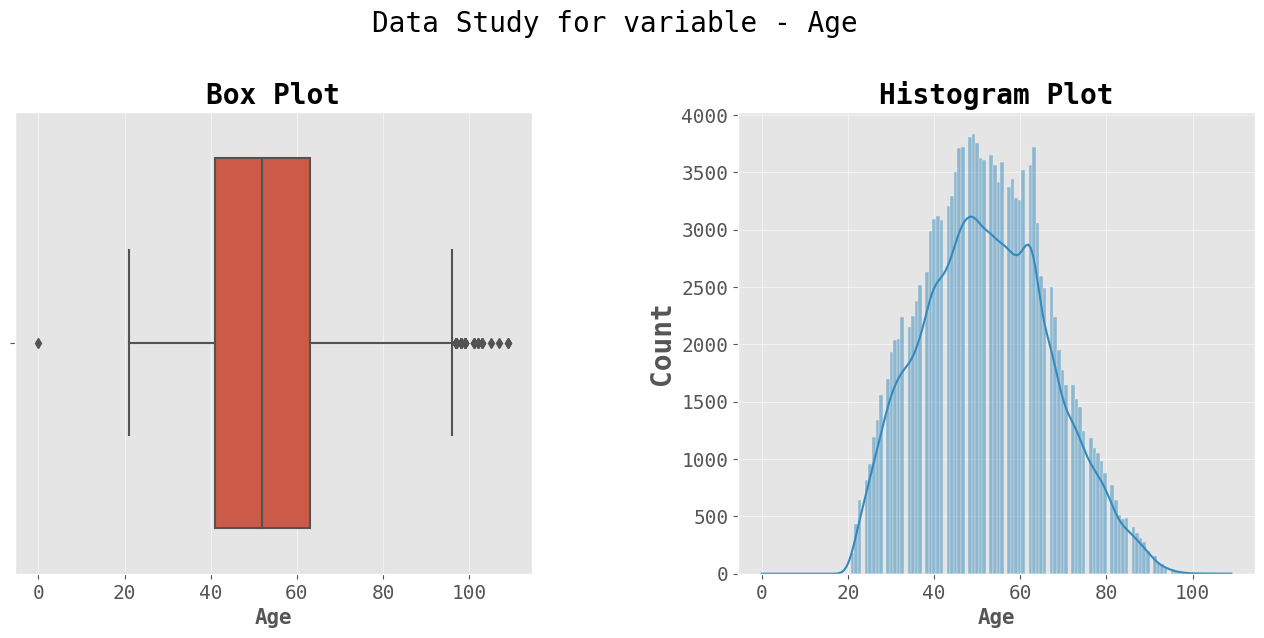

In [62]:
# Plotting the Variable info

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['age'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Age', size = 15) # set x-axis label


sns.histplot(df['age'], kde=True, ax=axes[1])
axes[1].set_title('Histogram Plot', size=20)
axes[1].set_xlabel('Age', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - Age', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

<font size =3>

There is an age value at 0. This is probably an error. 
This needs to be replaced with the mean.


In [63]:
df[df['age']==0].index # Finding index of 0 value to ensure only one is present

Int64Index([65695], dtype='int64')

Replacing Zero with mean

In [64]:
df['age'] = df['age'].replace(0, np.nan) # Replacing the zero first with NaN. This ensures an accurate mean is taken.
mean_age = round(df['age'].mean()) # Finding mean
df['age'] = df['age'].fillna(mean_age) # Replacing NaN with mean

In [65]:
df['age'].describe() # Cheacking if removed

count    150000.000000
mean         52.295553
std          14.771249
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

<font size =3, color ='green'>
    
We see now the min age is 21 which looks more accurate.

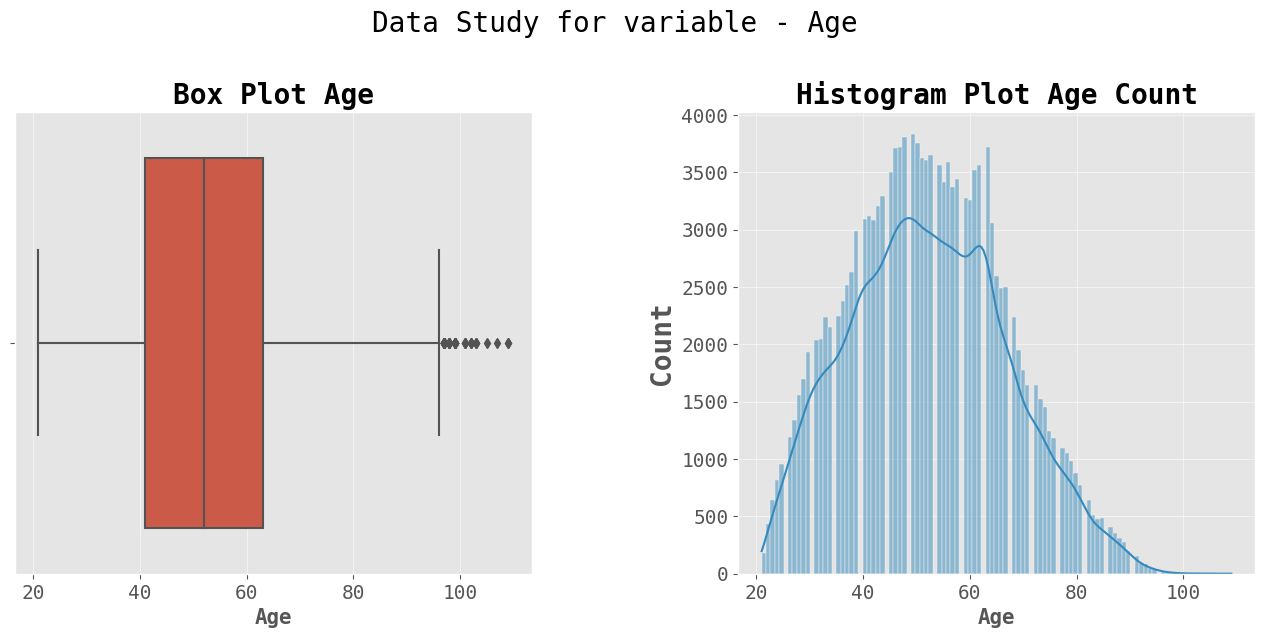

In [66]:
# Plotting Variable info

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['age'], ax = axes[0])
axes[0].set_title('Box Plot Age', size=20)
axes[0].set_xlabel('Age', size = 15) # set x-axis label


sns.histplot(df['age'], kde=True, ax=axes[1])
axes[1].set_title('Histogram Plot Age Count', size=20)
axes[1].set_xlabel('Age', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - Age', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

<font size =3, color ='green'>

The error age has been replace with mean age, Now start age is 21. End is 109. This also could have a few outliers. But this needs to be checked further as age of 109 is usually too high to hold a loan. 

<br/>

<a id="42"></a>

### Variable - *MonthlyIncome*

<font size = 3>
    This variable represents the monthly income of the borrower. It is a continuous variable with some missing values.

In [16]:
df['MonthlyIncome'].describe() # Reading the data

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [17]:
df['MonthlyIncome'].isnull().sum() # Number of null values. This was discovered earlier.

29731

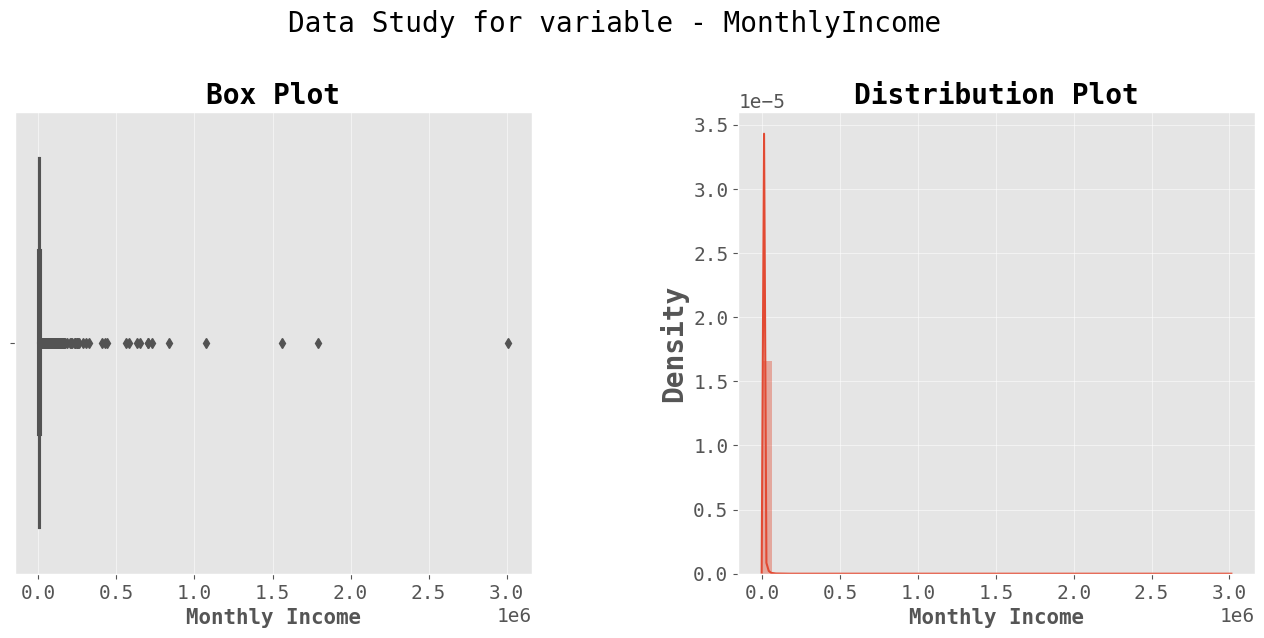

In [21]:
#Plotting the Variable

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['MonthlyIncome'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Monthly Income', size = 15) # set x-axis label


sns.distplot(df['MonthlyIncome'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Monthly Income', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - MonthlyIncome', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

#### Instead of just replacing the null values with the mean, creatinng divisions(bins) by age and then averaging the income for that age range might give us an edge in calculations. 

#### But before we do that, it would be beneficial to replace all the zeros in the MonthlyIncome column with nulls as well so that the average values will replace then during binning and processing.

In [22]:
(df['MonthlyIncome'].eq(0)).sum() # Checking zeros in MonthlyIncome

1634

#### The zeros were replaced with nulls as below. This increases the null count. 

In [23]:
df['MonthlyIncome'] = df['MonthlyIncome'].replace(0, np.nan) # Replacing script

In [24]:
df.isnull().sum() # Null is now higher again

age                                         0
MonthlyIncome                           31365
NumberOfDependents                       3924
DebtRatio                                   0
RevolvingUtilizationOfUnsecuredLines        0
NumberOfOpenCreditLinesAndLoans             0
NumberRealEstateLoansOrLines                0
NumberOfTime30-59DaysPastDueNotWorse        0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfTimes90DaysLate                     0
SeriousDlqin2yrs                            0
dtype: int64

In [26]:
null_idx = df[df['MonthlyIncome'].isnull()].index # Null index saved for later

<font size=3 >
    
<br/>    

In order to have a mean based on age range imputed to the null columns, we need to first create a **categorical division of age.**

This is done by **binning** as below:

The bins were chosen using the below dividers:

- **20 to 28** - Early Working Professional (Junior)
- **28 to 38** - Senior Professional
- **38 to 52** - Junior Management
- **52 to 65** - Senior Management 
- **65 to 75** - Retirement Age 
- **75 to 90** - Senior Citizen (Retired)
- **90 to infinity** - Super Senior Citizen (Retired)  

In [25]:
bins = [20, 28, 38, 52, 65, 75, 90, np.inf] # Bins made with info shared above

# Bin the age column using the defined bins
df['agebins'] = pd.cut(df['age'], bins)

# Find the average of the MonthlyIncome column based on the age bins
avg_by_bin = df.groupby('agebins')['MonthlyIncome'].mean()

In [27]:
avg_by_bin # Checking the average values by bin size. 

agebins
(20.0, 28.0]    2875.305477
(28.0, 38.0]    5351.421030
(38.0, 52.0]    7448.220350
(52.0, 65.0]    7664.516339
(65.0, 75.0]    6691.993460
(75.0, 90.0]    5396.944272
(90.0, inf]     6015.812000
Name: MonthlyIncome, dtype: float64

<font size =3>
    
The above averages will now replace the Monthly Income nulls. For example, any null value present in the variable Monthly Income in ages **between 20 and 28** will now be **2875.305477**

In [28]:
df['MonthlyIncome'] = np.where(df.index.isin(null_idx), df['agebins'].map(avg_by_bin), df['MonthlyIncome'])

#### The above code should have replaced all the values. Below two checks will give us a more definitive idea. 

In [29]:
df.isnull().sum() # Checking to see if nulls remain

age                                        0
MonthlyIncome                              0
NumberOfDependents                      3924
DebtRatio                                  0
RevolvingUtilizationOfUnsecuredLines       0
NumberOfOpenCreditLinesAndLoans            0
NumberRealEstateLoansOrLines               0
NumberOfTime30-59DaysPastDueNotWorse       0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfTimes90DaysLate                    0
SeriousDlqin2yrs                           0
agebins                                    0
dtype: int64

In [30]:
(df['MonthlyIncome'].eq(0)).sum() # Final check to see if any zeros remain

0

<font size = 3>
All Nulls (including transformed zeros) from MonthlyIncome is now the average by Binned Age. This was a judgement call as age should have some degree of influence on monthly income. A Linear Regression Model and K Nearest Neighbours were tried initially, but they had highly varying results and couldn't be fully relied upon. Another thing to note is that there are also anomaly values such as single digit incomes. These have not been cleared for this project, but might improve score further.

<br/>

<a id="43"></a>

### Variable - *NumberOfDependents*

<font size =3>
This variable represents the number of dependents in the borrower's family, excluding themselves. It is a continuous variable with some missing values.

In [885]:
df['NumberOfDependents'].describe() #Describing Data

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [886]:
df.isnull().sum() # Checking Nulls

age                                        0
MonthlyIncome                              0
NumberOfDependents                      3924
DebtRatio                                  0
RevolvingUtilizationOfUnsecuredLines       0
NumberOfOpenCreditLinesAndLoans            0
NumberRealEstateLoansOrLines               0
NumberOfTime30-59DaysPastDueNotWorse       0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfTimes90DaysLate                    0
SeriousDlqin2yrs                           0
agebins                                    0
dtype: int64

In [887]:
df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean(), inplace=True) # Replacing Nulls with Mean

In [888]:
df.isnull().sum() # Rechceking to see if nulls were removed

age                                     0
MonthlyIncome                           0
NumberOfDependents                      0
DebtRatio                               0
RevolvingUtilizationOfUnsecuredLines    0
NumberOfOpenCreditLinesAndLoans         0
NumberRealEstateLoansOrLines            0
NumberOfTime30-59DaysPastDueNotWorse    0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfTimes90DaysLate                 0
SeriousDlqin2yrs                        0
agebins                                 0
dtype: int64

<br/>

<a id="44"></a>

### Variable - *DebtRatio*

<font size =3>
This variable represents the number of dependents in the borrower's family, excluding themselves. It is a continuous variable with some missing values.

In [889]:
df['DebtRatio'].describe() # Statistical Description

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

#### Lets try plotting this

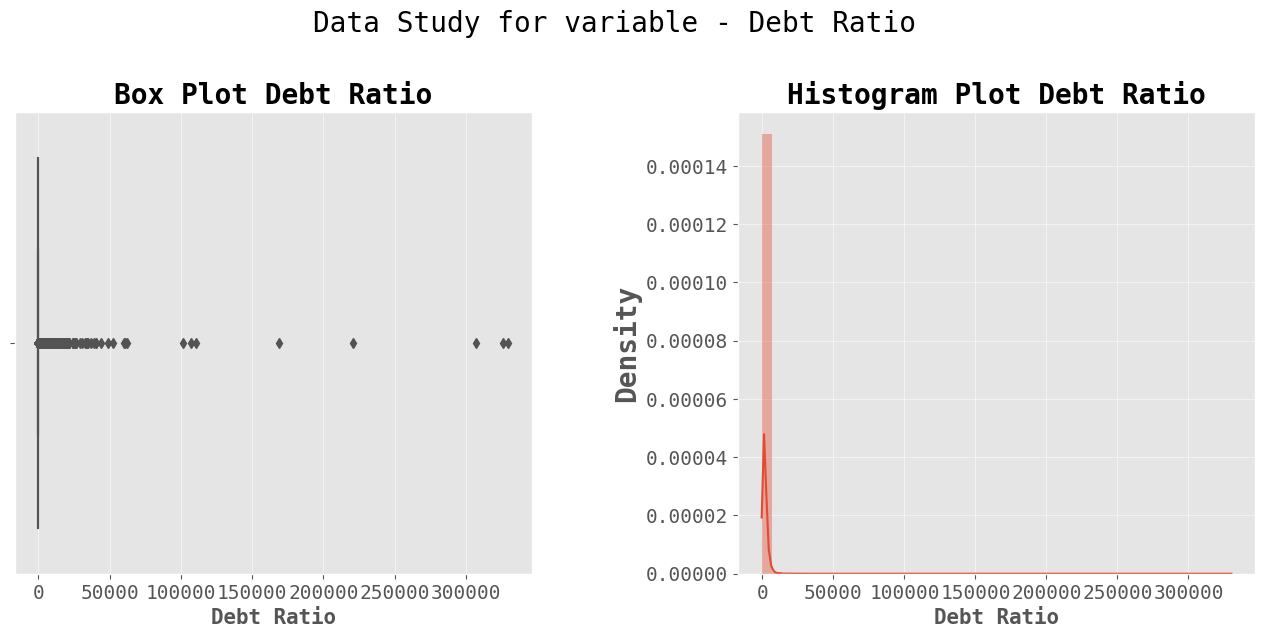

In [33]:
#Plotting the variable

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['DebtRatio'], ax = axes[0])
axes[0].set_title('Box Plot Debt Ratio', size=20)
axes[0].set_xlabel('Debt Ratio', size = 15) # set x-axis label
# plt.xticks(rotation=90)

sns.distplot(df['DebtRatio'], kde=True, ax=axes[1])
axes[1].set_title('Histogram Plot Debt Ratio', size=20)
axes[1].set_xlabel('Debt Ratio', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - Debt Ratio', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

<font size = 3>
The Value has huge outliers. While debt ratio can be massive, some of those outliers can be removed if they correlate with Monthly income being 0 or null. This is why an index was made for all null values in MonthlyIncome earlier.

<font size=3> Using the agebins from earlier, we find averages for **Debt Ratio** also. 

In [34]:
# Creating debt ratio mean by age bin
debt_ratio_by_agebin = df.loc[~df.index.isin(null_idx)].groupby('agebins')['DebtRatio'].mean() 

In [35]:
debt_ratio_by_agebin

agebins
(20.0, 28.0]     1.660445
(28.0, 38.0]     4.403289
(38.0, 52.0]     7.047262
(52.0, 65.0]     4.747072
(65.0, 75.0]     1.698741
(75.0, 90.0]    10.319937
(90.0, inf]      7.291597
Name: DebtRatio, dtype: float64

<font size = 3> Now lets replace them inside the Debt Ratio variable based on Age bin. 

In [36]:
# Replacing in the same index that was saved earlier

for idx in null_idx:
    agebin = df.loc[idx, 'agebins']
    if pd.isnull(agebin):
        continue
    df.loc[idx, 'DebtRatio'] = debt_ratio_by_agebin[agebin]

<font size = 3>
    When describing below, we see a massive reduction in the mean and std. There is though a high max value, from the earlier plot, there seemed to be a few outliers.

In [37]:
df['DebtRatio'].describe() #Rechecking

count    150000.000000
mean          5.282996
std         177.667892
min           0.000000
25%           0.184157
50%           0.376146
75%           0.966385
max       61106.500000
Name: DebtRatio, dtype: float64

<font size = 3>
    
**We see there is still a very high max value. The Standard Deviation  is also very high. Lets try removing the outliers.**

In [38]:
df['SeriousDlqin2yrs'].sum()

10026

#### There are total of 10k SeriousDlqin2yrs values. Lets check the values at particular debt ratios to see the impact it may have on the final score. 

In [39]:
df[df['DebtRatio'] > 10]['SeriousDlqin2yrs'].sum() #72 seems a high enough number. Lets try another level

72

In [40]:
df[df['DebtRatio'] > 15]['SeriousDlqin2yrs'].sum() #23 is far better. Let's try one more

23

In [41]:
df[df['DebtRatio'] > 20]['SeriousDlqin2yrs'].sum() #20 is not much different. We can choose 15 as our number. 

20

In [42]:
outlierindex_debt = df[df['DebtRatio']>15].index

outlierindex_debt

# There seems to be more than 600 values. 

# These are not just outliers and probably are error values. They also only contain 23 target varibles.

Int64Index([    44,    167,    195,    217,    400,    421,    983,   1280,
              1615,   1717,
            ...
            148515, 148730, 148822, 149213, 149288, 149381, 149462, 149494,
            149882, 149954],
           dtype='int64', length=603)

In [46]:
debt_ratio_mean = df[df['DebtRatio'] < 15]['DebtRatio'].mean() # Taking the mean of all values with Monthly income 1. 
debt_ratio_mean

1.399370107622365

In [47]:
df.loc[outlierindex_debt, 'DebtRatio'] = debt_ratio_mean # Replace mean in index location. 

In [48]:
df['DebtRatio'].describe() # Now the values seem more accurate

count    150000.000000
mean          1.399370
std           2.336573
min           0.000000
25%           0.184157
50%           0.376146
75%           0.966385
max          14.837949
Name: DebtRatio, dtype: float64

### Lets now check the plot

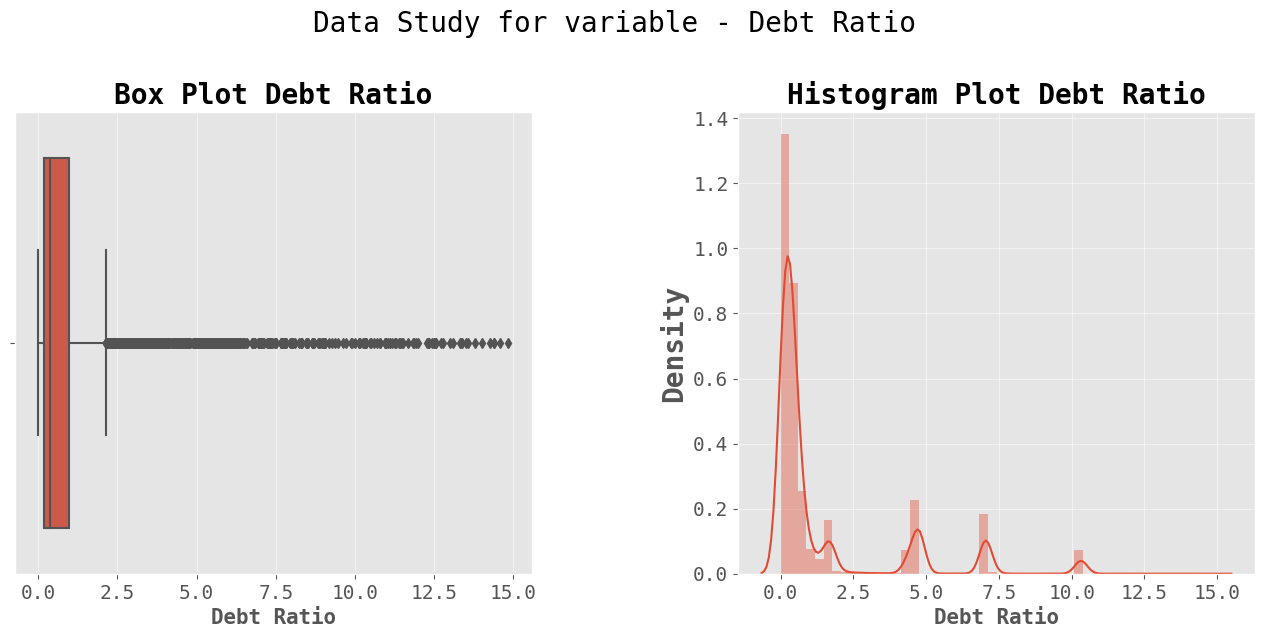

In [49]:
#Replotting the variable

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['DebtRatio'], ax = axes[0])
axes[0].set_title('Box Plot Debt Ratio', size=20)
axes[0].set_xlabel('Debt Ratio', size = 15) # set x-axis label


sns.distplot(df['DebtRatio'], kde=True, ax=axes[1])
axes[1].set_title('Histogram Plot Debt Ratio', size=20)
axes[1].set_xlabel('Debt Ratio', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - Debt Ratio', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

#### While there are still outliers, they contain many target variable and cant be avoided. 

<font size = 3, color = 'green'> **The box plot shows a much better distribution.**

In [50]:
df.drop(['agebins'], axis=1, inplace=True) # Removing the variable as it is no longer required

<br/>

<a id="45"></a>

### Variable - *RevolvingUtilizationOfUnsecuredLines*

<font size = 3>
This variable represents the total balance on credit cards and personal lines of credit except for real estate and no installment debt like car loans divided by the sum of credit limits. It is a ratio variable with values usually ranging from 0 to 1. While a value higher than 1 is possible, it would mean that the total credit balance available is higher than the credit limits. Likely an error. 

In [51]:
df['RevolvingUtilizationOfUnsecuredLines'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: RevolvingUtilizationOfUnsecuredLines
Non-Null Count   Dtype  
--------------   -----  
150000 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


<font size = 3>It is currently in a float datatype and that is in line with being a percentage value as per the Data Dictionary.

In [52]:
len(df['RevolvingUtilizationOfUnsecuredLines'].unique()) # Number of unique values

125728

In [53]:
df['RevolvingUtilizationOfUnsecuredLines'].describe() #Statistical Description

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

<font size = 3>There definately seems to be some anomaly with the data. Need to investigate further. The mean itself if way too high. 

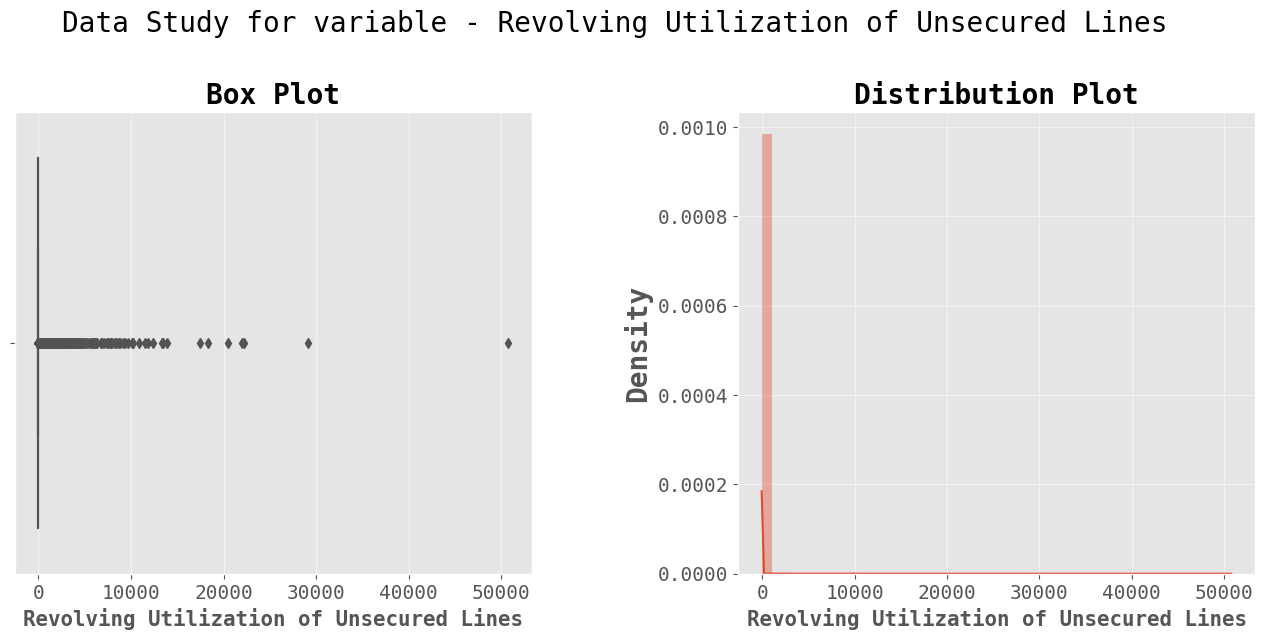

In [54]:
#Plotting the variable

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['RevolvingUtilizationOfUnsecuredLines'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Revolving Utilization of Unsecured Lines', size = 15) # set x-axis label


sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Revolving Utilization of Unsecured Lines', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - Revolving Utilization of Unsecured Lines', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

<font size = 3>

While the values close to one (upto even 15%) may be considered real due to fraud or other circumstances. Values in the thousands are most likely errors. There we will replace those values with the mean of the remaining data.

<font size = 3>
    
This data needs to be cleaned and the outliers replaced with the mean.

In [55]:
df[df['RevolvingUtilizationOfUnsecuredLines']>1.15]

age  MonthlyIncome  NumberOfDependents  DebtRatio  \
226     38.0    3556.000000                 2.0   0.153500   
293     45.0    8333.000000                 2.0   0.339333   
541     24.0    2875.305477                 NaN   1.660445   
667     33.0    2700.000000                 0.0   0.175120   
697     58.0    6000.000000                 1.0   0.271121   
...      ...            ...                 ...        ...   
149245  52.0    8000.000000                 0.0   0.832021   
149279  42.0    9902.000000                 2.0   0.062102   
149663  49.0    2500.000000                 1.0   1.224310   
149778  26.0    1839.000000                 0.0   0.247826   
149927  71.0   12370.000000                 1.0   0.054401   

        RevolvingUtilizationOfUnsecuredLines  NumberOfOpenCreditLinesAndLoans  \
226                                 1.953488                                5   
293                              2340.000000                                7   
541                                 1.245847                                4   
667                                 1.248751                                3   
697                              2066.000000                                8   
...                                      ...                              ...   
149245                            771.000000                               13   
149279                          20514.000000                                1   
149663                              1.744511                                4   
149778                              1.383886                                3   
149927                              3.603566                                5   

        NumberRealEstateLoansOrLines  NumberOfTime30-59DaysPastDueNotWorse  \
226                                0                                     0   
293                                2                                     0   
541                                0                                     1   
667                                0                                     0   
697                                1                                     0   
...                              ...                                   ...   
149245                             3                                     0   
149279                             0                                     0   
149663                             2                                     0   
149778                             0                                     2   
149927                             0                                     0   

        NumberOfTime60-89DaysPastDueNotWorse  NumberOfTimes90DaysLate  \
226                                        0                        0   
293                                        0                        0   
541                                        0                        1   
667                                        0                        2   
697                                        0                        1   
...                                      ...                      ...   
149245                                     0                        0   
149279                                     0                        1   
149663                                     1                        4   
149778                                     1                        1   
149927                                     0                        0   

        SeriousDlqin2yrs  
226                    1  
293                    0  
541                    0  
667                    1  
697                    1  
...                  ...  
149245                 0  
149279                 0  
149663                 1  
149778                 0  
149927                 0  

[1173 rows x 11 columns]

#### The below script replaces the values above 1.15 by the mean.

In [56]:
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x: np.nan if x > 1.15 else x)
meanruul = df['RevolvingUtilizationOfUnsecuredLines'].mean()
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].fillna(meanruul)

In [57]:
df['RevolvingUtilizationOfUnsecuredLines'].describe() #Statistical Description

count    150000.000000
mean          0.314464
std           0.345540
min           0.000000
25%           0.029867
50%           0.154181
75%           0.540207
max           1.149964
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

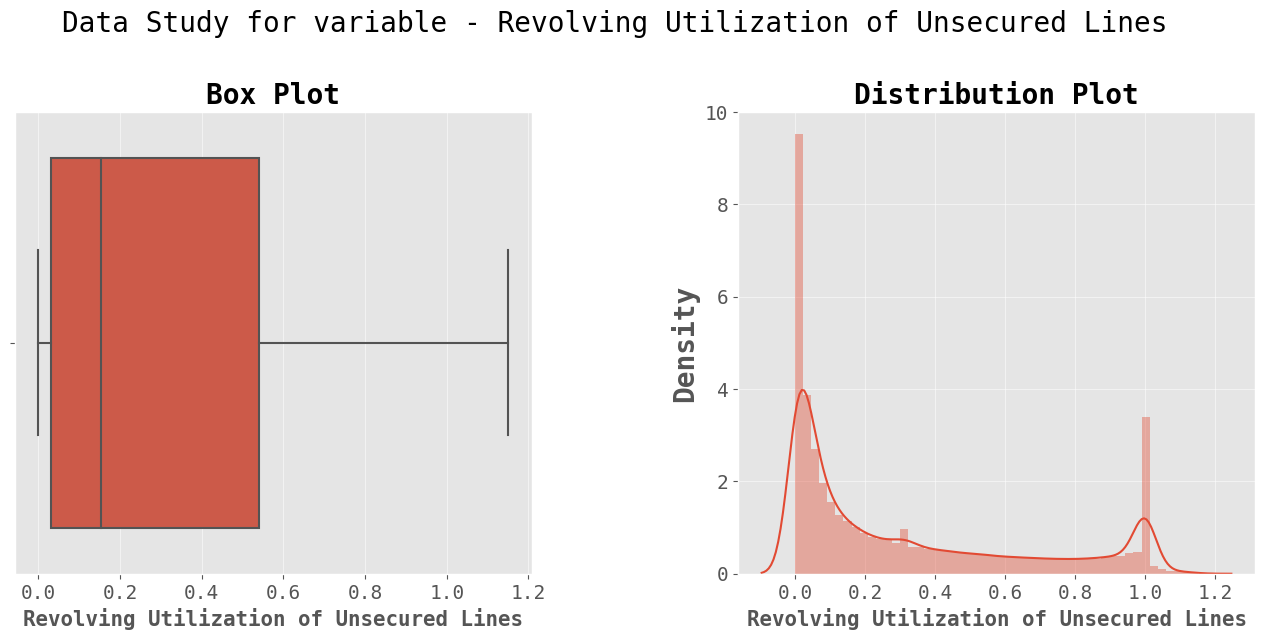

In [58]:
# Replotting

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['RevolvingUtilizationOfUnsecuredLines'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Revolving Utilization of Unsecured Lines', size = 15) # set x-axis label


sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Revolving Utilization of Unsecured Lines', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - Revolving Utilization of Unsecured Lines', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

<font size = 3, color = 'green'>
    
The Distribution is far better and looks much more likely. We need to see if this actually benefits the models made later.

<br/>

<a id="46"></a>

### Variable - *NumberOfOpenCreditLinesAndLoans*

<font size =3>
This variable represents the number of open loans (installment like car loan or mortgage) and credit cards (revolving) the borrower has. It is an integer variable.

In [59]:
df['NumberOfOpenCreditLinesAndLoans'].describe() #Describing

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

The data has a range of 0 to 58. With mean around 8. 

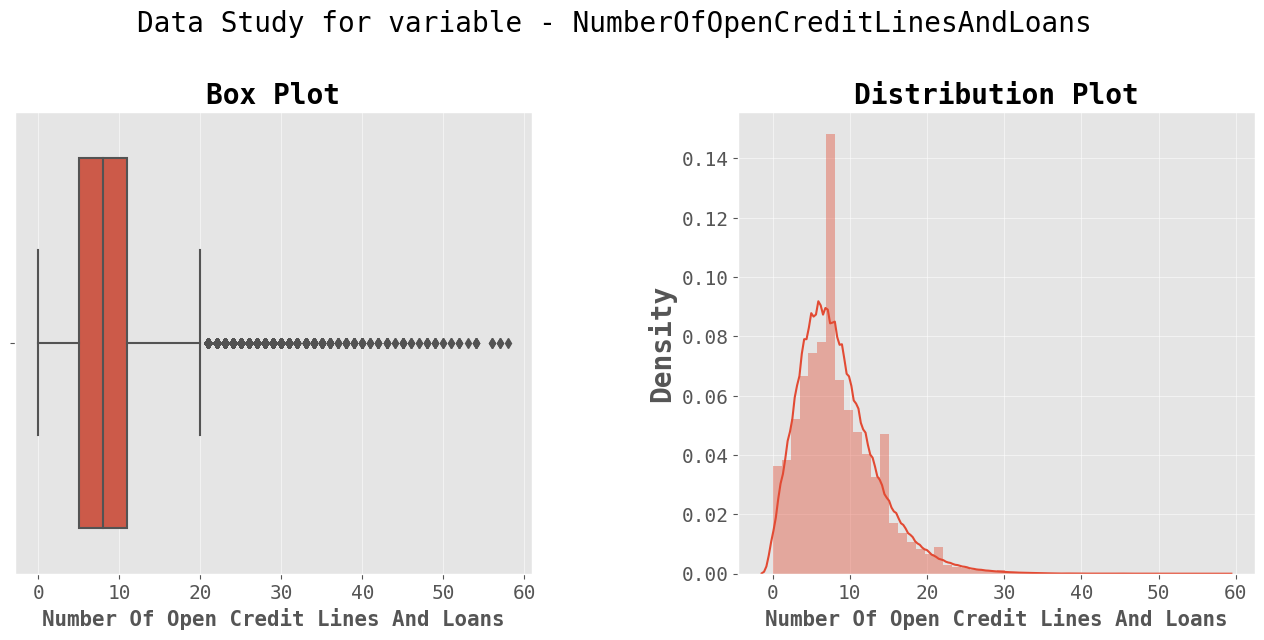

In [60]:
# Plotting the variable
fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['NumberOfOpenCreditLinesAndLoans'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Number Of Open Credit Lines And Loans', size = 15) # set x-axis label


sns.distplot(df['NumberOfOpenCreditLinesAndLoans'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Number Of Open Credit Lines And Loans', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - NumberOfOpenCreditLinesAndLoans', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

<font size =3, color ='green'>

The outliers are not removed due to low numbers and since they could matter to loan defaulting.

<br/>

<a id="47"></a>

### Variable - *NumberRealEstateLoansOrLines*

<font size =3>
This variable represents the number of real estate loans or lines of credit the borrower has. It is an integer variable.

In [61]:
df['NumberRealEstateLoansOrLines'].describe() #Describing

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

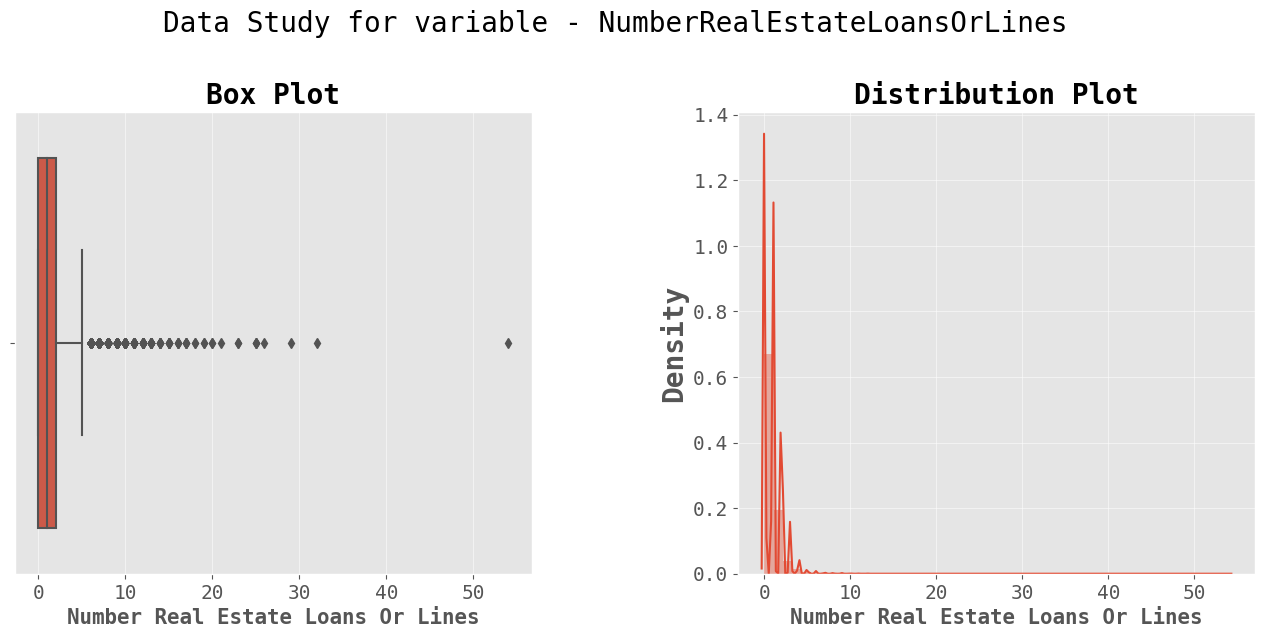

In [62]:
#PLotting Variable
fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['NumberRealEstateLoansOrLines'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Number Real Estate Loans Or Lines', size = 15) # set x-axis label


sns.distplot(df['NumberRealEstateLoansOrLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Number Real Estate Loans Or Lines', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - NumberRealEstateLoansOrLines', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

### Outlier over 20 can be removed as these seem a bit out of place.

In [63]:
real_index = df[df['NumberRealEstateLoansOrLines']>20].index # find the index of the outliers. Only 20 values in this case.
real_index

Int64Index([18259, 30587, 31517, 46102, 62192, 65728, 68909, 103893, 104198,
            123746],
           dtype='int64')

In [64]:
df[df['NumberRealEstateLoansOrLines'] > 20]['SeriousDlqin2yrs'].sum() # Only 2 target variables. Low correlation.

2

In [65]:
meanreal = df['NumberRealEstateLoansOrLines'].mean() # Finding mean to replace in locations. 
meanreal

1.01824

In [66]:
df.loc[real_index, 'NumberRealEstateLoansOrLines'] = meanreal #Replacing with the mean

In [67]:
df['NumberRealEstateLoansOrLines'].describe() # Rechecking

count    150000.000000
mean          1.016421
std           1.105115
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          20.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

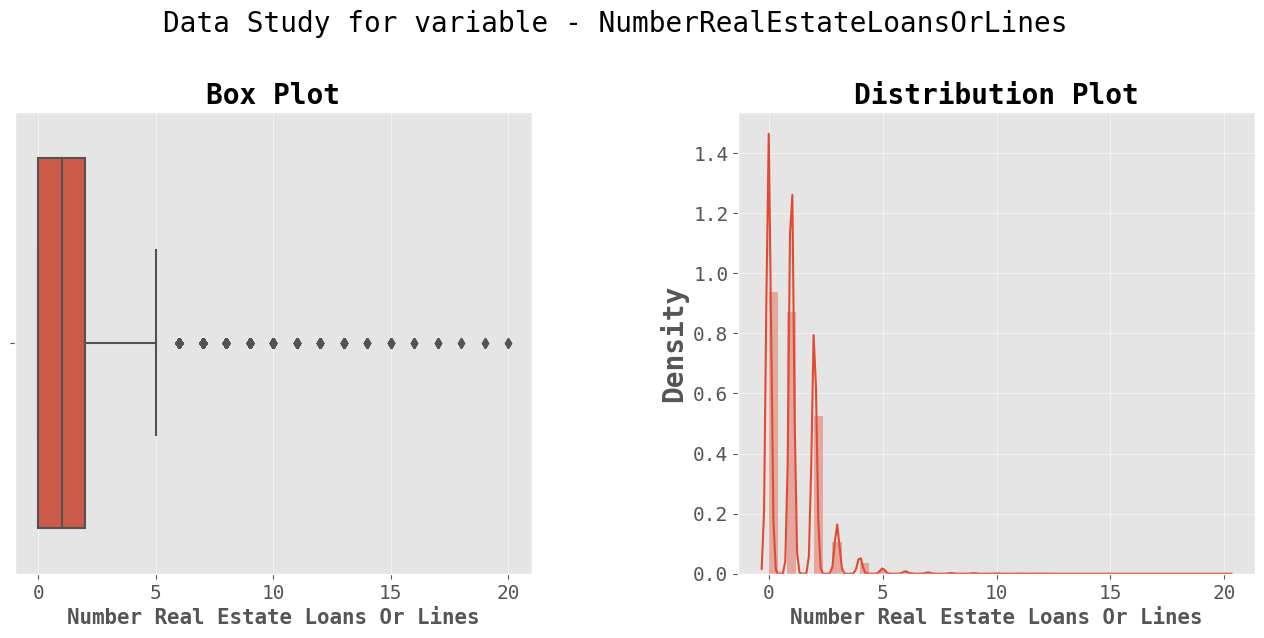

In [68]:
# Replotting

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['NumberRealEstateLoansOrLines'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Number Real Estate Loans Or Lines', size = 15) # set x-axis label


sns.distplot(df['NumberRealEstateLoansOrLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Number Real Estate Loans Or Lines', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - NumberRealEstateLoansOrLines', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)


<font size =3, color ='green'>
    
All other outliers are not removed due to low numbers and since they could matter to loan defaulting. The distribution is better than earlier.

<br/>

<a id="48"></a>

### Variable - *NumberOfTime30-59DaysPastDueNotWorse*

<font size =3>
This variable represents the number of times the borrower has been 30-59 days past due but not worse in the past two years. It is an integer variable.

In [69]:
df['NumberOfTime30-59DaysPastDueNotWorse'].describe() #Describing

count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

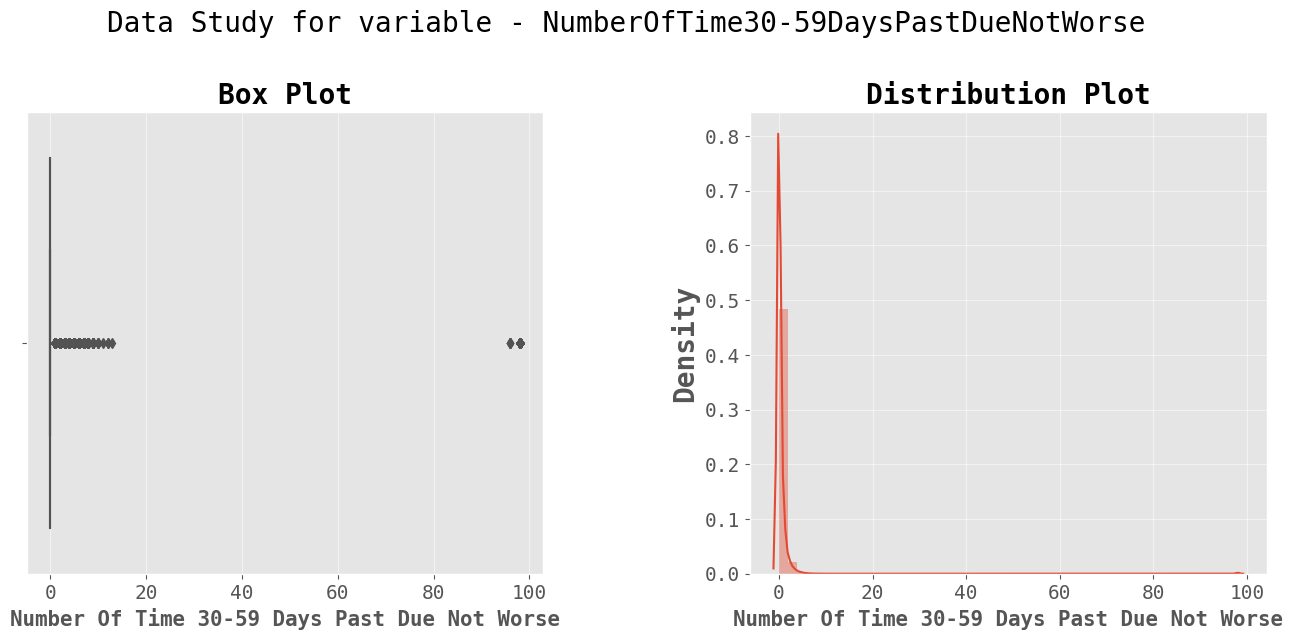

In [70]:
#PLotting

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['NumberOfTime30-59DaysPastDueNotWorse'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Number Of Time 30-59 Days Past Due Not Worse', size = 15) # set x-axis label


sns.distplot(df['NumberOfTime30-59DaysPastDueNotWorse'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Number Of Time 30-59 Days Past Due Not Worse', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - NumberOfTime30-59DaysPastDueNotWorse', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

In [71]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [72]:
df[df['NumberOfTime30-59DaysPastDueNotWorse'] > 20]['SeriousDlqin2yrs'].sum()

147

<font size =3, color ='green'>
    
Since the outliers have significant values attached to them. It might be beneficial to leave them in.

<br/>

<a id="49"></a>

### Variable - *NumberOfTime60-89DaysPastDueNotWorse*

<font size =3>
This variable represents the number of times the borrower has been 60-89 days past due but not worse in the past two years. It is an integer variable.

In [73]:
df['NumberOfTime60-89DaysPastDueNotWorse'].describe() #Describing

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

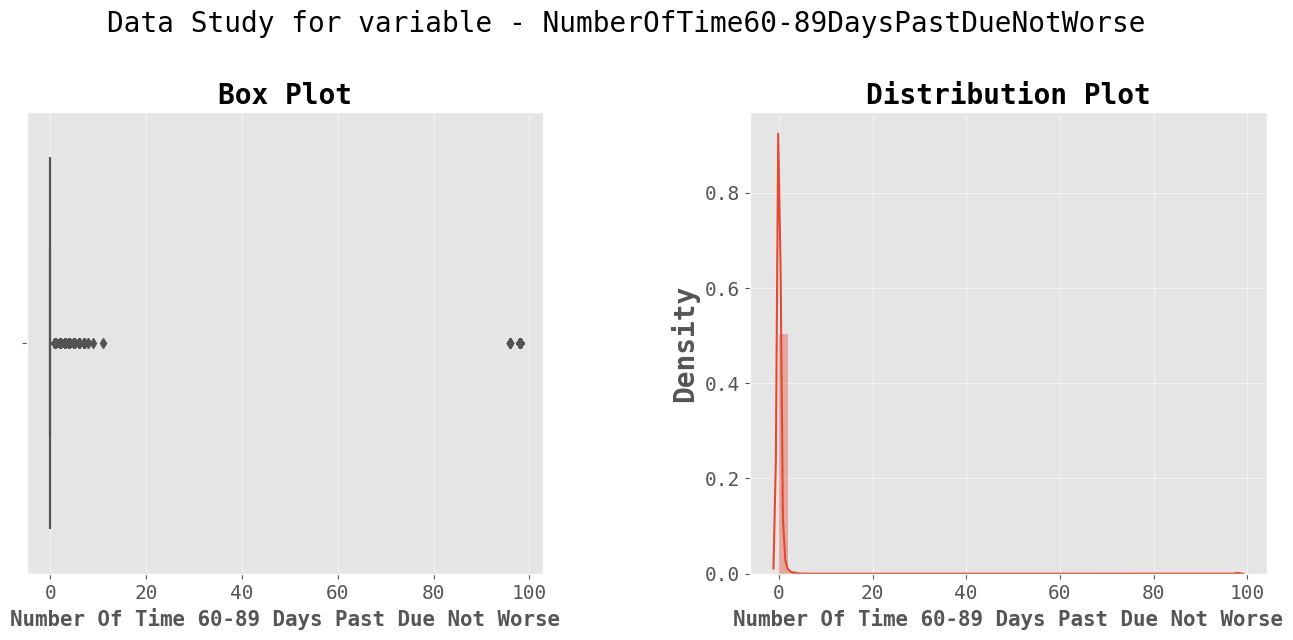

In [74]:
#Plotting

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['NumberOfTime60-89DaysPastDueNotWorse'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Number Of Time 60-89 Days Past Due Not Worse', size = 15) # set x-axis label


sns.distplot(df['NumberOfTime60-89DaysPastDueNotWorse'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Number Of Time 60-89 Days Past Due Not Worse', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - NumberOfTime60-89DaysPastDueNotWorse', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

In [75]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [76]:
df[df['NumberOfTime60-89DaysPastDueNotWorse'] > 20]['SeriousDlqin2yrs'].sum()

147

<font size =3, color ='green'>
    
Since the outliers have significant values attached to them. It might be beneficial to leave them in.

<br/>

<a id="410"></a>


### Variable - *NumberOfTimes90DaysLate*

<font size =3>
This variable represents the number of times the borrower has been 90 days or more past due. It is an integer variable.

In [77]:
df['NumberOfTimes90DaysLate'].describe() #Describing

count    150000.000000
mean          0.265973
std           4.169304
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

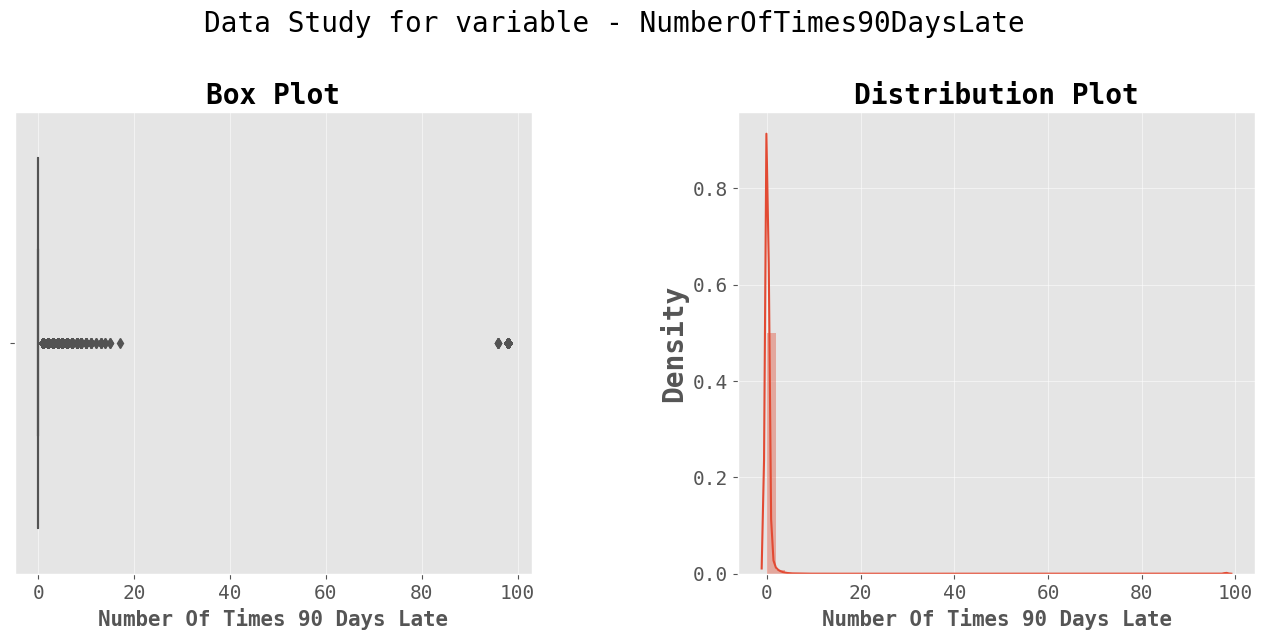

In [78]:
#Plotting

fig, axes = plt.subplots(1,2,figsize = (16, 6))

sns.boxplot(df['NumberOfTimes90DaysLate'], ax = axes[0])
axes[0].set_title('Box Plot', size=20)
axes[0].set_xlabel('Number Of Times 90 Days Late', size = 15) # set x-axis label


sns.distplot(df['NumberOfTimes90DaysLate'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot', size=20)
axes[1].set_xlabel('Number Of Times 90 Days Late', size = 15) # set x-axis label

fig.suptitle('Data Study for variable - NumberOfTimes90DaysLate', size=20, y=1.05) # add a main title for both subplots
fig.subplots_adjust(wspace=0.4)
# plt.xticks(rotation=90)

In [79]:
df['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [80]:
df[df['NumberOfTimes90DaysLate'] > 20]['SeriousDlqin2yrs'].sum()

147

<font size =3, color ='green'>
    
Since the outliers have significant values attached to them. It might be beneficial to leave them in.

<br/>

<a id="411"></a>

### Variable - *SeriousDlqin2yrs*

<font size = 3>
    
This is the **target variable** or response variable that indicates whether a borrower has experienced a serious delinquency in the past two years. It is a binary variable with the value 1 indicating that the borrower has experienced a serious delinquency and 0 indicating that the borrower has not.

In [81]:
df['SeriousDlqin2yrs'].info() #Returns information of the variable

<class 'pandas.core.series.Series'>
RangeIndex: 150000 entries, 0 to 149999
Series name: SeriousDlqin2yrs
Non-Null Count   Dtype
--------------   -----
150000 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


The variable is in a **int64** format. It need to be in a **category** as per data dictionary. This is changed below:

In [82]:
df['SeriousDlqin2yrs'] = df['SeriousDlqin2yrs'].astype('category') #Changing datatype to category

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   age                                   150000 non-null  float64 
 1   MonthlyIncome                         150000 non-null  float64 
 2   NumberOfDependents                    146076 non-null  float64 
 3   DebtRatio                             150000 non-null  float64 
 4   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64 
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64   
 6   NumberRealEstateLoansOrLines          150000 non-null  float64 
 7   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64   
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64   
 9   NumberOfTimes90DaysLate               150000 non-null  int64   
 10  SeriousDlqin2yrs                      150000 non-null  c

<font size=2 color='green'>We can see **_SeriousDlqin2yrs_** is now a **category**

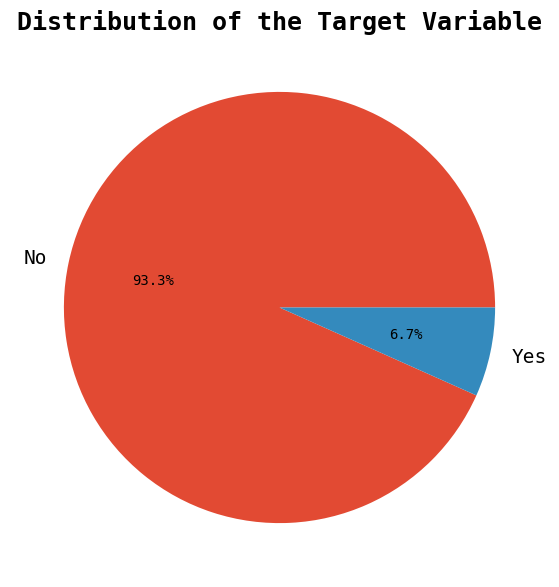

In [84]:
count = df['SeriousDlqin2yrs'].value_counts() 
fig = plt.figure(figsize =(10, 7))
plt.pie(count, autopct = '%1.1f%%', labels = ['No', 'Yes'])
plt.title('Distribution of the Target Variable', size=18)
plt.show()

<font size =3>
    
The dataset is heavily imbalanced and can cause issues when building a machine learning model. This is because the model may be biased towards the majority class and may have a low performance on the minority class. Most machine learning algorithms are designed to maximize accuracy, which can result in a biased model when the dataset is imbalanced. 
<br/>
    
By transforming the imbalanced dataset before modeling, we improve the performance of the model on the minority class and reduce the bias towards the majority class. This can lead to more accurate and reliable predictions on both classes, especially in cases where the minority class is important and rare events need to be detected. This will be explored later.

---

<a id="412"></a>

### All the above Data cleaning is then put into a function for pipeline integration later as below:

In [5]:
def clean_credit_data(df):
    """
    This function takes in the dataframe and does all basic and EDA cleaning at one go. This can be used in a pipeline. 
    """
    # Make a copy of the dataframe to avoid modifying the original
    df_clean = df.copy()

    # Remove unwanted column
    df_clean = df_clean.drop('Unnamed: 0', axis=1)

    # Reordering df
    new_order = ['age', 'MonthlyIncome', 'NumberOfDependents', 'DebtRatio',
                 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans',
                 'NumberRealEstateLoansOrLines', 'NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'SeriousDlqin2yrs']
    df_clean = df_clean.reindex(columns=new_order)

    # Age Clean
    
    df_clean['age'] = df_clean['age'].replace(0, np.nan)
    mean_age = round(df_clean['age'].mean())
    df_clean['age'] = df_clean['age'].fillna(mean_age)
    
    # Monthly Income Clean
    df_clean['MonthlyIncome'] = df_clean['MonthlyIncome'].replace(0, np.nan)
    bins = [20, 28, 38, 52, 65, 75, 90, np.inf]
    df_clean['agebins'] = pd.cut(df_clean['age'], bins)
    avg_by_bin = df_clean.groupby('agebins')['MonthlyIncome'].mean()
    null_idx = df_clean[df_clean['MonthlyIncome'].isnull()].index
    df_clean['MonthlyIncome'] = np.where(df_clean.index.isin(null_idx),
                                         df_clean['agebins'].map(avg_by_bin),
                                         df_clean['MonthlyIncome'])
    df_clean['NumberOfDependents'].fillna(df_clean['NumberOfDependents'].mean(), inplace=True)

    # Debt Ratio Clean
    debt_ratio_by_agebin = df_clean.loc[~df_clean.index.isin(null_idx)].groupby('agebins')['DebtRatio'].mean()
    for idx in null_idx:
        agebin = df_clean.loc[idx, 'agebins']
        if pd.isnull(agebin):
            continue
        df_clean.loc[idx, 'DebtRatio'] = debt_ratio_by_agebin[agebin]
    outlierindex_debt = df_clean[df_clean['DebtRatio']>15].index
    debt_ratio_mean = df_clean[df_clean['DebtRatio'] < 15]['DebtRatio'].mean()
    df_clean.loc[outlierindex_debt, 'DebtRatio'] = debt_ratio_mean
    df_clean.drop(['agebins'], axis=1, inplace=True)

    # RevolvingUtilizationOfUnsecuredLines Clean
    df_clean['RevolvingUtilizationOfUnsecuredLines'] = df_clean['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x: np.nan if x > 1.15 else x)
    meanruul = df_clean['RevolvingUtilizationOfUnsecuredLines'].mean()
    df_clean['RevolvingUtilizationOfUnsecuredLines'] = df_clean['RevolvingUtilizationOfUnsecuredLines'].fillna(meanruul)

    # NumberRealEstateLoansOrLines Clean
    real_index = df_clean[df_clean['NumberRealEstateLoansOrLines']>20].index
    meanreal = df_clean['NumberRealEstateLoansOrLines'].mean()
    df_clean.loc[real_index, 'NumberRealEstateLoansOrLines'] = meanreal

    # SeriousDlqin2yrs Clean
    df_clean['SeriousDlqin2yrs'] = df_clean['SeriousDlqin2yrs'].astype('category')
    
    return df_clean

---

<a id="413"></a>

## Correlations

<font size =3>
<br/>
    
Before we start engineering features, it is necessary to understand their relations to one another. For this we look at a few correlation checks. **Correlations or multicollinearity** among predictor variables in a model can have several impacts on the model's performance and interpretation, including:

- Unreliable parameter estimates: Correlated variables can cause problems in parameter estimation, leading to unstable and unreliable estimates of the regression coefficients or other model parameters. This can make it difficult to interpret the model and may reduce its predictive accuracy.

- Reduced model interpretability: Correlated variables can make it difficult to interpret the effects of individual predictors on the outcome variable. This can be problematic when trying to understand the relationships between variables in the model and how they contribute to the model's output.

- Reduced predictive accuracy: Correlated variables can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data. This can reduce the model's ability to generalize to new data and may limit its predictive accuracy.

- Biased variable importance estimates: Correlated variables can inflate or deflate the estimated importance of individual variables in the model, making it difficult to accurately identify which variables are most important for predicting the outcome variable.

In summary, correlations or multicollinearity among predictor variables can have a range of negative impacts on a model's performance and interpretation. Therefore, it is important to carefully examine the relationships between variables in the model and take steps to address any issues of multicollinearity before fitting the model.
    
**To understand and remove collinearity, we look at 3 different methods in this project**:
    
- **Correlation plots** can help identify strong linear relationships between variables, which can inform the selection and creation of features. For example, if two variables are highly correlated, it may be beneficial to combine them into a single feature or to drop one of the variables to reduce redundancy.
    
-  **Variance Inflation Factor (VIF)** is a measure of multicollinearity that assesses how much the variance of the estimated coefficient of an independent variable is inflated due to the presence of correlated independent variables.

- **T-tests** are a statistical test used to compare the means of two groups and can be used to identify features that have a significant impact on the target variable. For example, if we are trying to predict whether a customer will purchase a product, we can perform t-tests to compare the mean purchase amounts of customers who bought the product to those who did not. Features that have a significant difference in means between these groups may be important predictors of the target variable.

**We study these individually so as to use this knowledge during Feature Engineering.**

<a id="4131"></a>

### Correlation Plots

<font size =3>
    <br/>

We will be looking at two types of Correlation Plots: **Kendall correlation** and **Pearson correlation**. They are both measures of the strength and direction of the linear relationship between two variables. However, they differ in how they calculate the correlation coefficient and what assumptions they make about the data.

- **Pearson correlation** measures the linear relationship between two variables using the covariance of the variables divided by the product of their standard deviations. It assumes that the variables are normally distributed and that there is a linear relationship between them. Pearson correlation ranges from -1 to 1, with a value of 1 indicating a perfect positive linear relationship, 0 indicating no linear relationship, and -1 indicating a perfect negative linear relationship.

- **Kendall correlation** measures the strength and direction of the association between two variables based on the number of concordant and discordant pairs of observations. It does not assume any particular distribution of the data or a linear relationship between the variables. Kendall correlation ranges from -1 to 1, with a value of 1 indicating a perfect positive association, 0 indicating no association, and -1 indicating a perfect negative association.

In general, Pearson correlation is used when the relationship between the variables is expected to be linear and the data are normally distributed, while Kendall correlation is used when the relationship may be nonlinear or the data may not be normally distributed. However, the choice of which correlation to use ultimately depends on the nature of the data and the research question being addressed.

###  First we look at Pearson Correlation

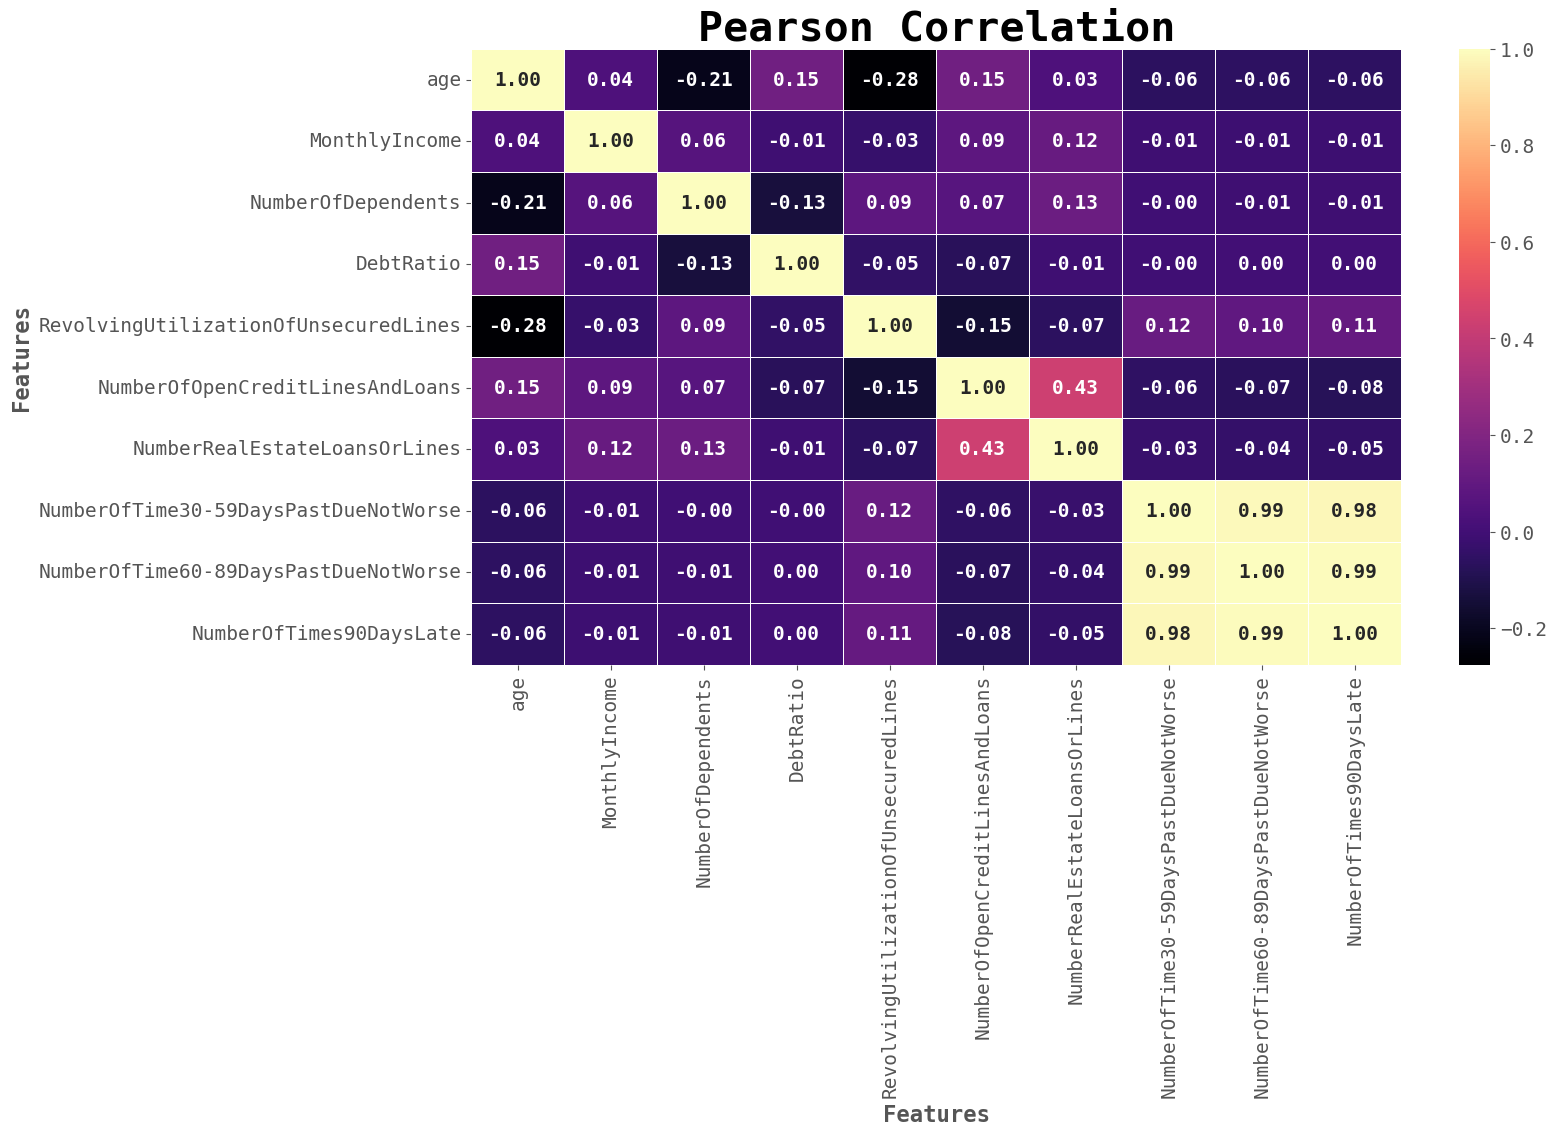

In [86]:
correlation = df.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', annot_kws={'size':14, 'fontweight':'bold'}, linewidths=0.5)
sns.set(font_scale=1.5)
plt.title('Pearson Correlation', size=30, fontweight='bold')
plt.xlabel('Features', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')
plt.show()

<br/>
<font size =3, color = 'green'>


    
The Plot shows us that there is strong correlation between the columns **NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTime60-89DaysPastDueNotWorse** and **NumberOfTimes90DaysLate**.

There also seems to be a decent correlation between **NumberOfOpenCreditLinesAndLoans** and **NumberRealEstateLoansOrLines**
    
<br/>

### Now the Kendall Correlation

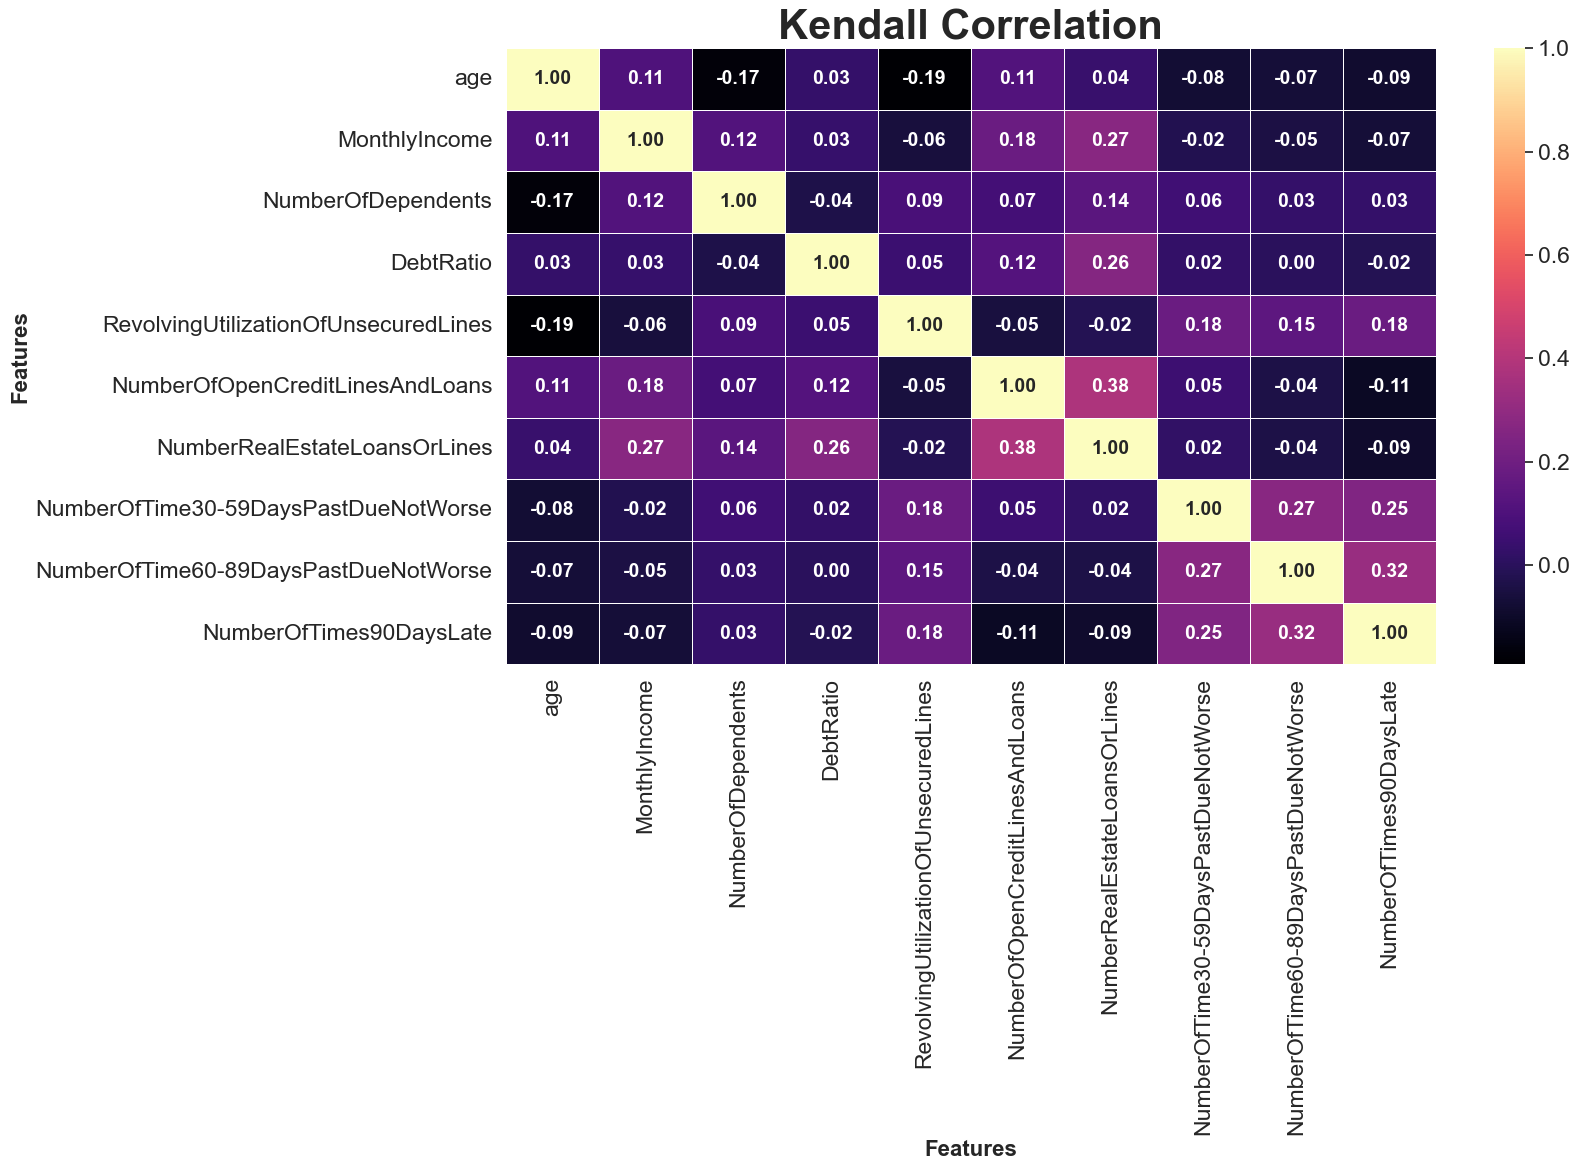

In [998]:
correlation = df.corr(method='kendall')
plt.figure(figsize = (15, 8))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', annot_kws={'size':14, 'fontweight':'bold'}, linewidths=0.5)
sns.set(font_scale=1.5)
plt.title('Kendall Correlation', size=30, fontweight='bold')
plt.xlabel('Features', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')
plt.show()

<br/>
<font size =3, color = 'green'>


The Kendall correlation doesn't show as strong as a correlation other than with the same features.

It does however signify some relation between the three **Number of times late columns**(NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate) and the **RevolvingUtilizationOfUnsecuredLines** variable.

It also shows some relation between the **NumberRealEstateLoansOrLines** varibale with the **MonthlyIncome** and **DebtRatio** columns.

<br/>

<a id="4132"></a>


### Variance Inflation Factor (VIF)

<font size =3>
    <br/>

    
VIF is a commonly used technique to assess the presence of multicollinearity in a regression model. VIF measures the degree of correlation between each predictor variable and all other predictor variables in the model. While the VIF may not be directly applicable to non-regression models, it is still important to identify and address issues of multicollinearity or feature correlation in the data before building a model. 

If a predictor variable is highly correlated with other predictor variables in the model, its VIF value will be high, indicating the presence of multicollinearity. VIF values greater than 1 suggest some degree of multicollinearity, and values greater than 5 or 10 indicate a high degree of multicollinearity.

By examining the VIF values of each predictor variable in the model, we can identify which variables are highly correlated with other variables in the model and may be contributing to issues of multicollinearity. This can help us to identify problematic variables that may be negatively impacting the model's performance and interpretation.

In addition, checking for VIF can also help to inform decisions about variable selection and model building. By removing highly correlated variables with high VIF values, we can create a more parsimonious model with fewer variables and improved interpretability. 

In summary, checking for VIF is a useful technique for understanding the presence of multicollinearity in a regression model and identifying problematic variables that may be negatively impacting the model's performance and interpretation.

In [999]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

                                 feature        VIF
0                                    age   4.644384
1                          MonthlyIncome   1.296428
2                     NumberOfDependents   1.478024
3                              DebtRatio   1.410657
4   RevolvingUtilizationOfUnsecuredLines   1.795841
5        NumberOfOpenCreditLinesAndLoans   4.593384
6           NumberRealEstateLoansOrLines   2.319815
7   NumberOfTime30-59DaysPastDueNotWorse  42.593421
8   NumberOfTime60-89DaysPastDueNotWorse  95.116295
9                NumberOfTimes90DaysLate  74.187992
10                      SeriousDlqin2yrs   1.188257


<br/>
<font size =3, color = 'green'>

Once again the columns  **NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTime60-89DaysPastDueNotWorse** and **NumberOfTimes90DaysLate** show the highest values. There also seems to be some correlation in **age** and **NumberOfOpenCreditLinesAndLoans**      

<br/>

<a id="4133"></a>


### t-test

<font size =3>
    <br/>

A t-test is a statistical hypothesis test used to determine whether there is a significant difference between the means of two groups. It is typically used when the sample sizes are small and the population standard deviations are unknown. The test is based on the t-distribution, which describes the distribution of the differences between the means of two groups.

The null hypothesis of a t-test is that there is no significant difference between the means of the two groups, while the alternative hypothesis is that there is a significant difference between the means of the two groups. The test calculates a t-statistic, which measures the difference between the means of the two groups relative to the variation within each group.

The p-value is the probability of observing a t-statistic as extreme as the one observed, assuming the null hypothesis is true. A small p-value (typically less than 0.05) indicates that the observed difference between the means of the two groups is unlikely to have occurred by chance alone, and we reject the null hypothesis in favor of the alternative hypothesis that there is a significant difference between the means of the two groups.

The p-value is an important component of hypothesis testing, as it provides a quantitative measure of the strength of evidence against the null hypothesis. A small p-value indicates strong evidence against the null hypothesis, while a large p-value suggests weak or inconclusive evidence.

In summary, a t-test is a statistical hypothesis test used to determine whether there is a significant difference between the means of two groups, while the p-value is the probability of observing a t-statistic as extreme as the one observed, assuming the null hypothesis is true. The p-value provides a measure of the strength of evidence against the null hypothesis and is used to determine whether to reject or fail to reject the null hypothesis.

Text(0.5, 1.0, 'Significance of Numerical Features for Default Prediction')

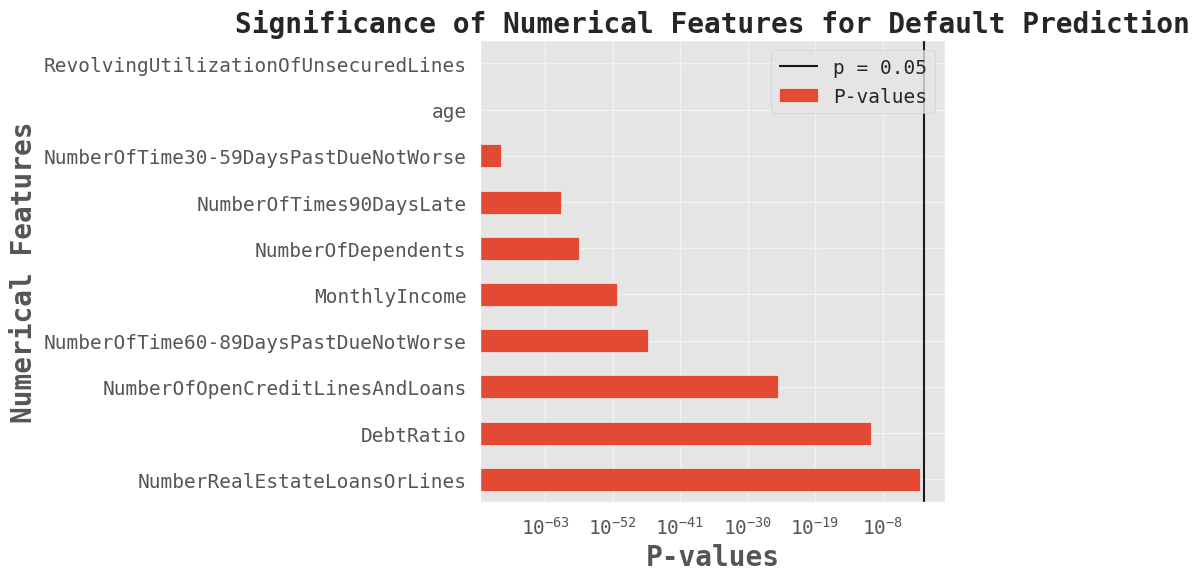

In [1002]:
# T Test

cat_cols = df.select_dtypes(include=['category'])
num_cols = df.select_dtypes(include=['int64', 'float64'])

col_list = []
p_val_list = []

# Loop and calculate p-values for each feature
for col in num_cols:
    # Group 1 : Customers who churn
    true_col = df[df['SeriousDlqin2yrs']==1][col]
    
    # Group 2 : Customers who did not churn
    false_col = df[df['SeriousDlqin2yrs']==0][col]
     
    # Compute the t-stat and p-value
    t_stat, p_val = ttest_ind(true_col, false_col, equal_var=False)

    # Append p_values
    p_val_list.append(p_val)
    col_list.append(col)

# Plot p-values
pvals = pd.DataFrame(p_val_list, col_list)
pvals.columns = ['P-values']
pvals.sort_values(by='P-values', ascending=False).plot(kind='barh');
plt.semilogx()
plt.vlines(x=0.05, ymin=-1, ymax=len(num_cols), colors='k', label='p = 0.05');
# plt.figure(figsize = (10, 8));
plt.legend();
plt.xlabel('P-values')
plt.ylabel('Numerical Features')
plt.title('Significance of Numerical Features for Default Prediction')

<br/>
<font size =3, color = 'green'>


### All values are lower than 0.05 and this indicates the data did not occur by chance.

### All of these studies show the data is fit for feature engineering and further modelling.

---

<a id="5"></a>
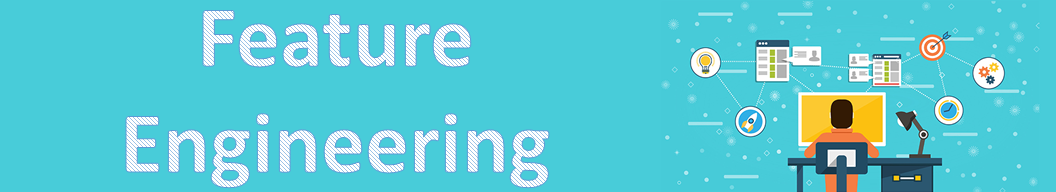

[Back to Contents](#100)

<font size = 3>

Feature engineering is the process of selecting and transforming raw data into features that can be used as inputs to a machine learning algorithm. In other words, it is the process of creating new variables or features from the existing data that are more informative and relevant for the task at hand.

The quality of the features used in a machine learning model can have a significant impact on its performance. Good features can improve the accuracy of the model, while poor features can make the model less effective or even useless. Feature engineering is therefore an important step in the machine learning pipeline, and requires careful consideration and domain knowledge.

There are many techniques used in feature engineering, including scaling, normalization, encoding, imputation, aggregation, and feature selection. Scaling and normalization are used to bring the data into a common range, while encoding is used to transform categorical variables into numerical ones. Imputation is used to fill in missing values, while aggregation is used to summarize data across groups or time periods. Feature selection is used to identify the most relevant features for the task at hand, and discard those that are redundant or noisy.

Overall, feature engineering is a crucial step in the machine learning process, and requires a combination of technical expertise, domain knowledge, and creativity. A well-engineered set of features can significantly improve the accuracy and performance of a machine learning model.

In [189]:
df = pd.read_csv('cs-training.csv')

In [190]:
df = clean_credit_data(df)

<a id="51"></a>

## Exploring the data

### We now do a few plot to understand the relation of the variables with each other.

### First Lets look at the Monthly Income by Age. 

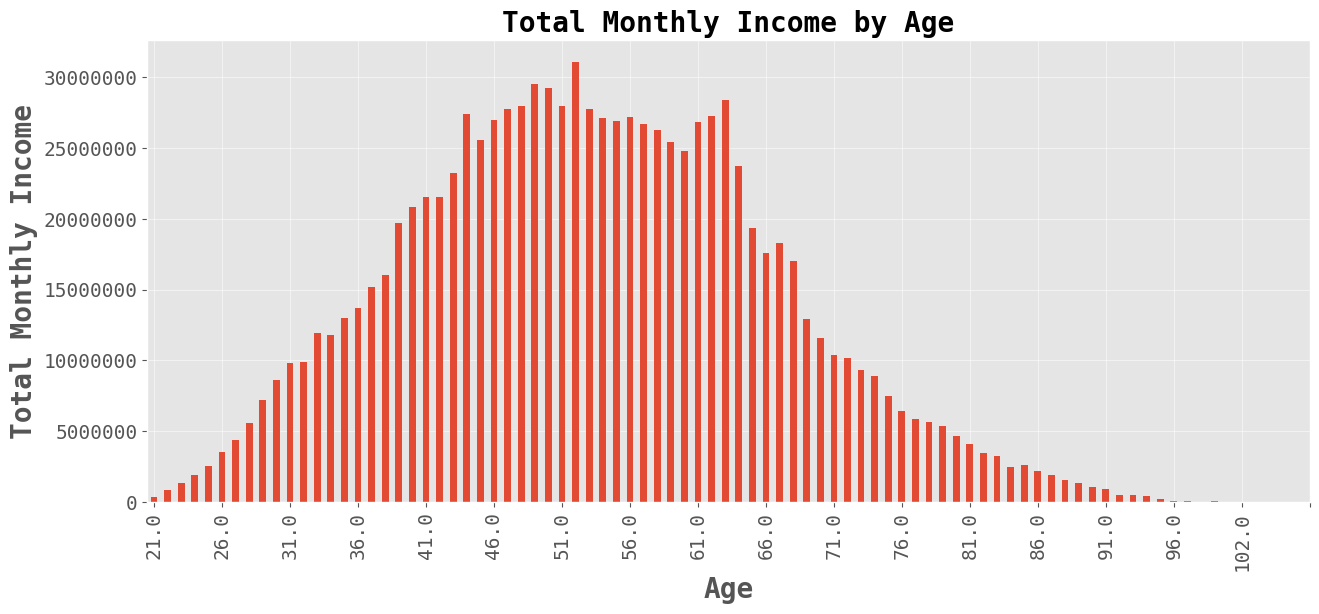

In [191]:
grouped = df.groupby('age')['MonthlyIncome'].sum()

# create the bar chart using seaborn
ax = grouped.plot(kind='bar', stacked=True, figsize=(15,6))

# add labels and title
plt.xlabel('Age')
plt.ylabel('Total Monthly Income')
plt.title('Total Monthly Income by Age')

# specify the range of ages to display on the x-axis ticks
age_ticks = range(0, 90, 5)
ax.set_xticks(age_ticks)

# format the y-axis tick labels to display actual numbers
ax.ticklabel_format(style='plain', axis='y')

# display the plot
plt.show()

#### Higher concentration in the middle ages. 

### Lets now see How many target variables are present in each age

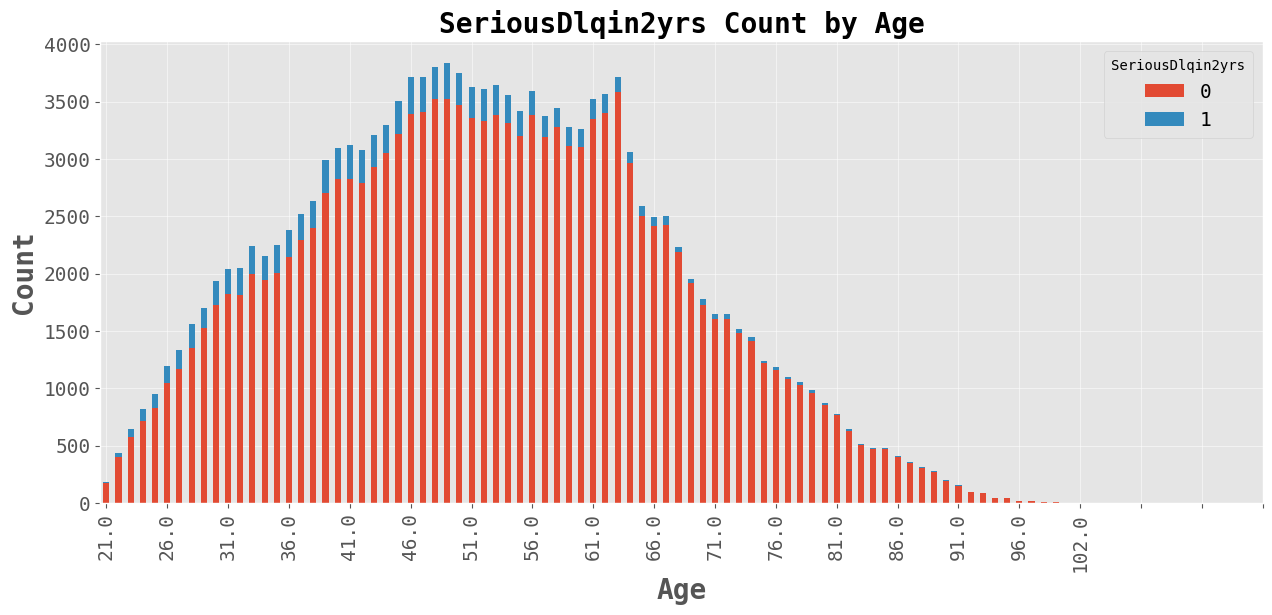

In [192]:
counts = df.groupby(['age', 'SeriousDlqin2yrs']).size().unstack()

# plot the counts as a stacked bar graph
ax = counts.plot(kind='bar', stacked=True, figsize=(15,6))

# add labels and title
plt.title('SeriousDlqin2yrs Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# set xticks with a 5-year interval
age_ticks = range(0, 100, 5)
ax.set_xticks(age_ticks)

plt.show()

<font color = 'green'>


### The distribution for delinquency is towards the mid ages.


### The below plot looks into the the relation between NumberRealEstateLoansOrLines and NumberOfOpenCreditLinesAndLoans with the target variable as the hue

Text(0.5, 1.0, 'Scatter Plot over Target Feature')

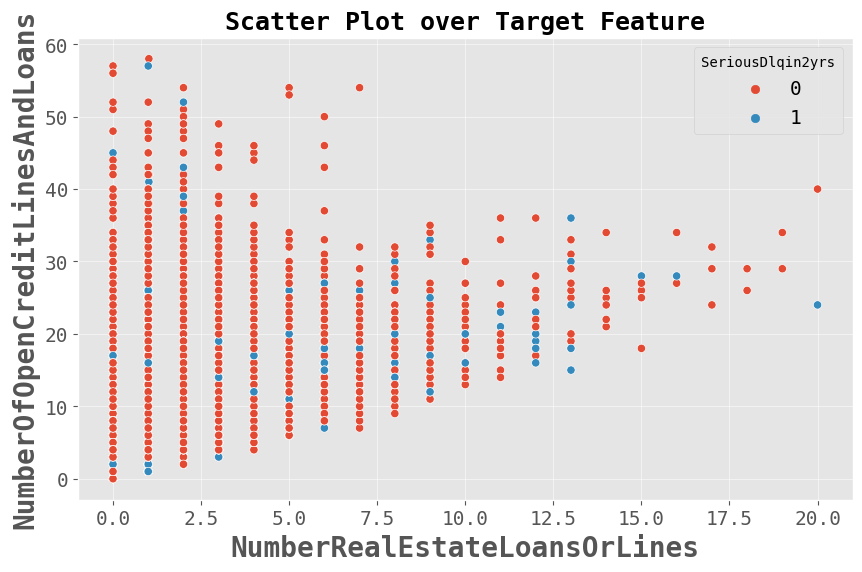

In [193]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'NumberRealEstateLoansOrLines', y = 'NumberOfOpenCreditLinesAndLoans', hue = 'SeriousDlqin2yrs', data=df)
plt.title('Scatter Plot over Target Feature', size=18)

## Now lets do a subplot of the variables against the target variable

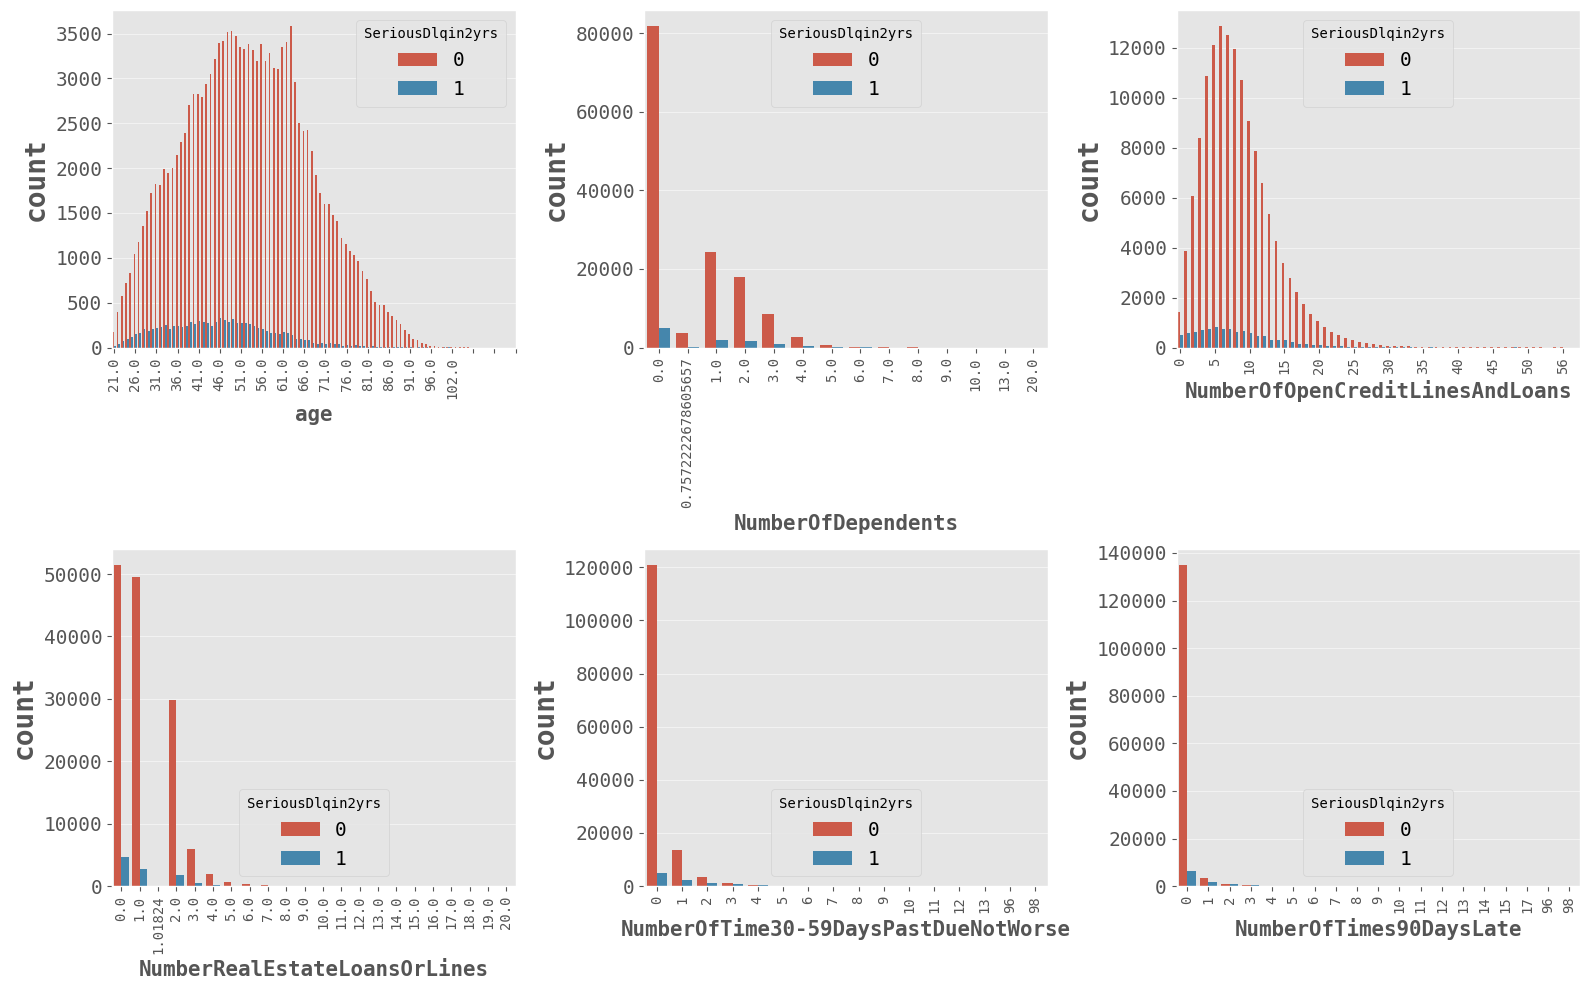

In [198]:
fig, ax = plt.subplots(2,3, figsize=(16,10))

sns.countplot(data=df, x = 'age', hue = 'SeriousDlqin2yrs', ax = ax[0][0])
sns.countplot(data=df, x = 'NumberOfDependents', hue='SeriousDlqin2yrs', ax = ax[0][1])
sns.countplot(data=df, x = 'NumberOfOpenCreditLinesAndLoans', hue = 'SeriousDlqin2yrs', ax = ax[0][2])
sns.countplot(data=df, x = 'NumberRealEstateLoansOrLines', hue='SeriousDlqin2yrs', ax = ax[1][0])
sns.countplot(data=df, x = 'NumberOfTime30-59DaysPastDueNotWorse', hue = 'SeriousDlqin2yrs', ax = ax[1][1])
sns.countplot(data=df, x = 'NumberOfTimes90DaysLate', hue='SeriousDlqin2yrs', ax = ax[1][2])

# Set xticks and only show a range
for i in range(2):
    for j in range(3):
        ax[i][j].tick_params(axis='x', labelsize=10, labelrotation=90)
        ax[i][j].set_xlabel(ax[i][j].get_xlabel(), fontsize=15)
        if ax[i][j].get_xlabel() in ['age']:
            ax[i][j].set_xticks(range(0, 100, 5))
        if ax[i][j].get_xlabel() in ['NumberOfOpenCreditLinesAndLoans']:
            ax[i][j].set_xticks(range(0, 60, 5))

# Adjust the layout of the subplots
plt.tight_layout()

# display the plot
plt.show()

## Lets now look at a pairplot.

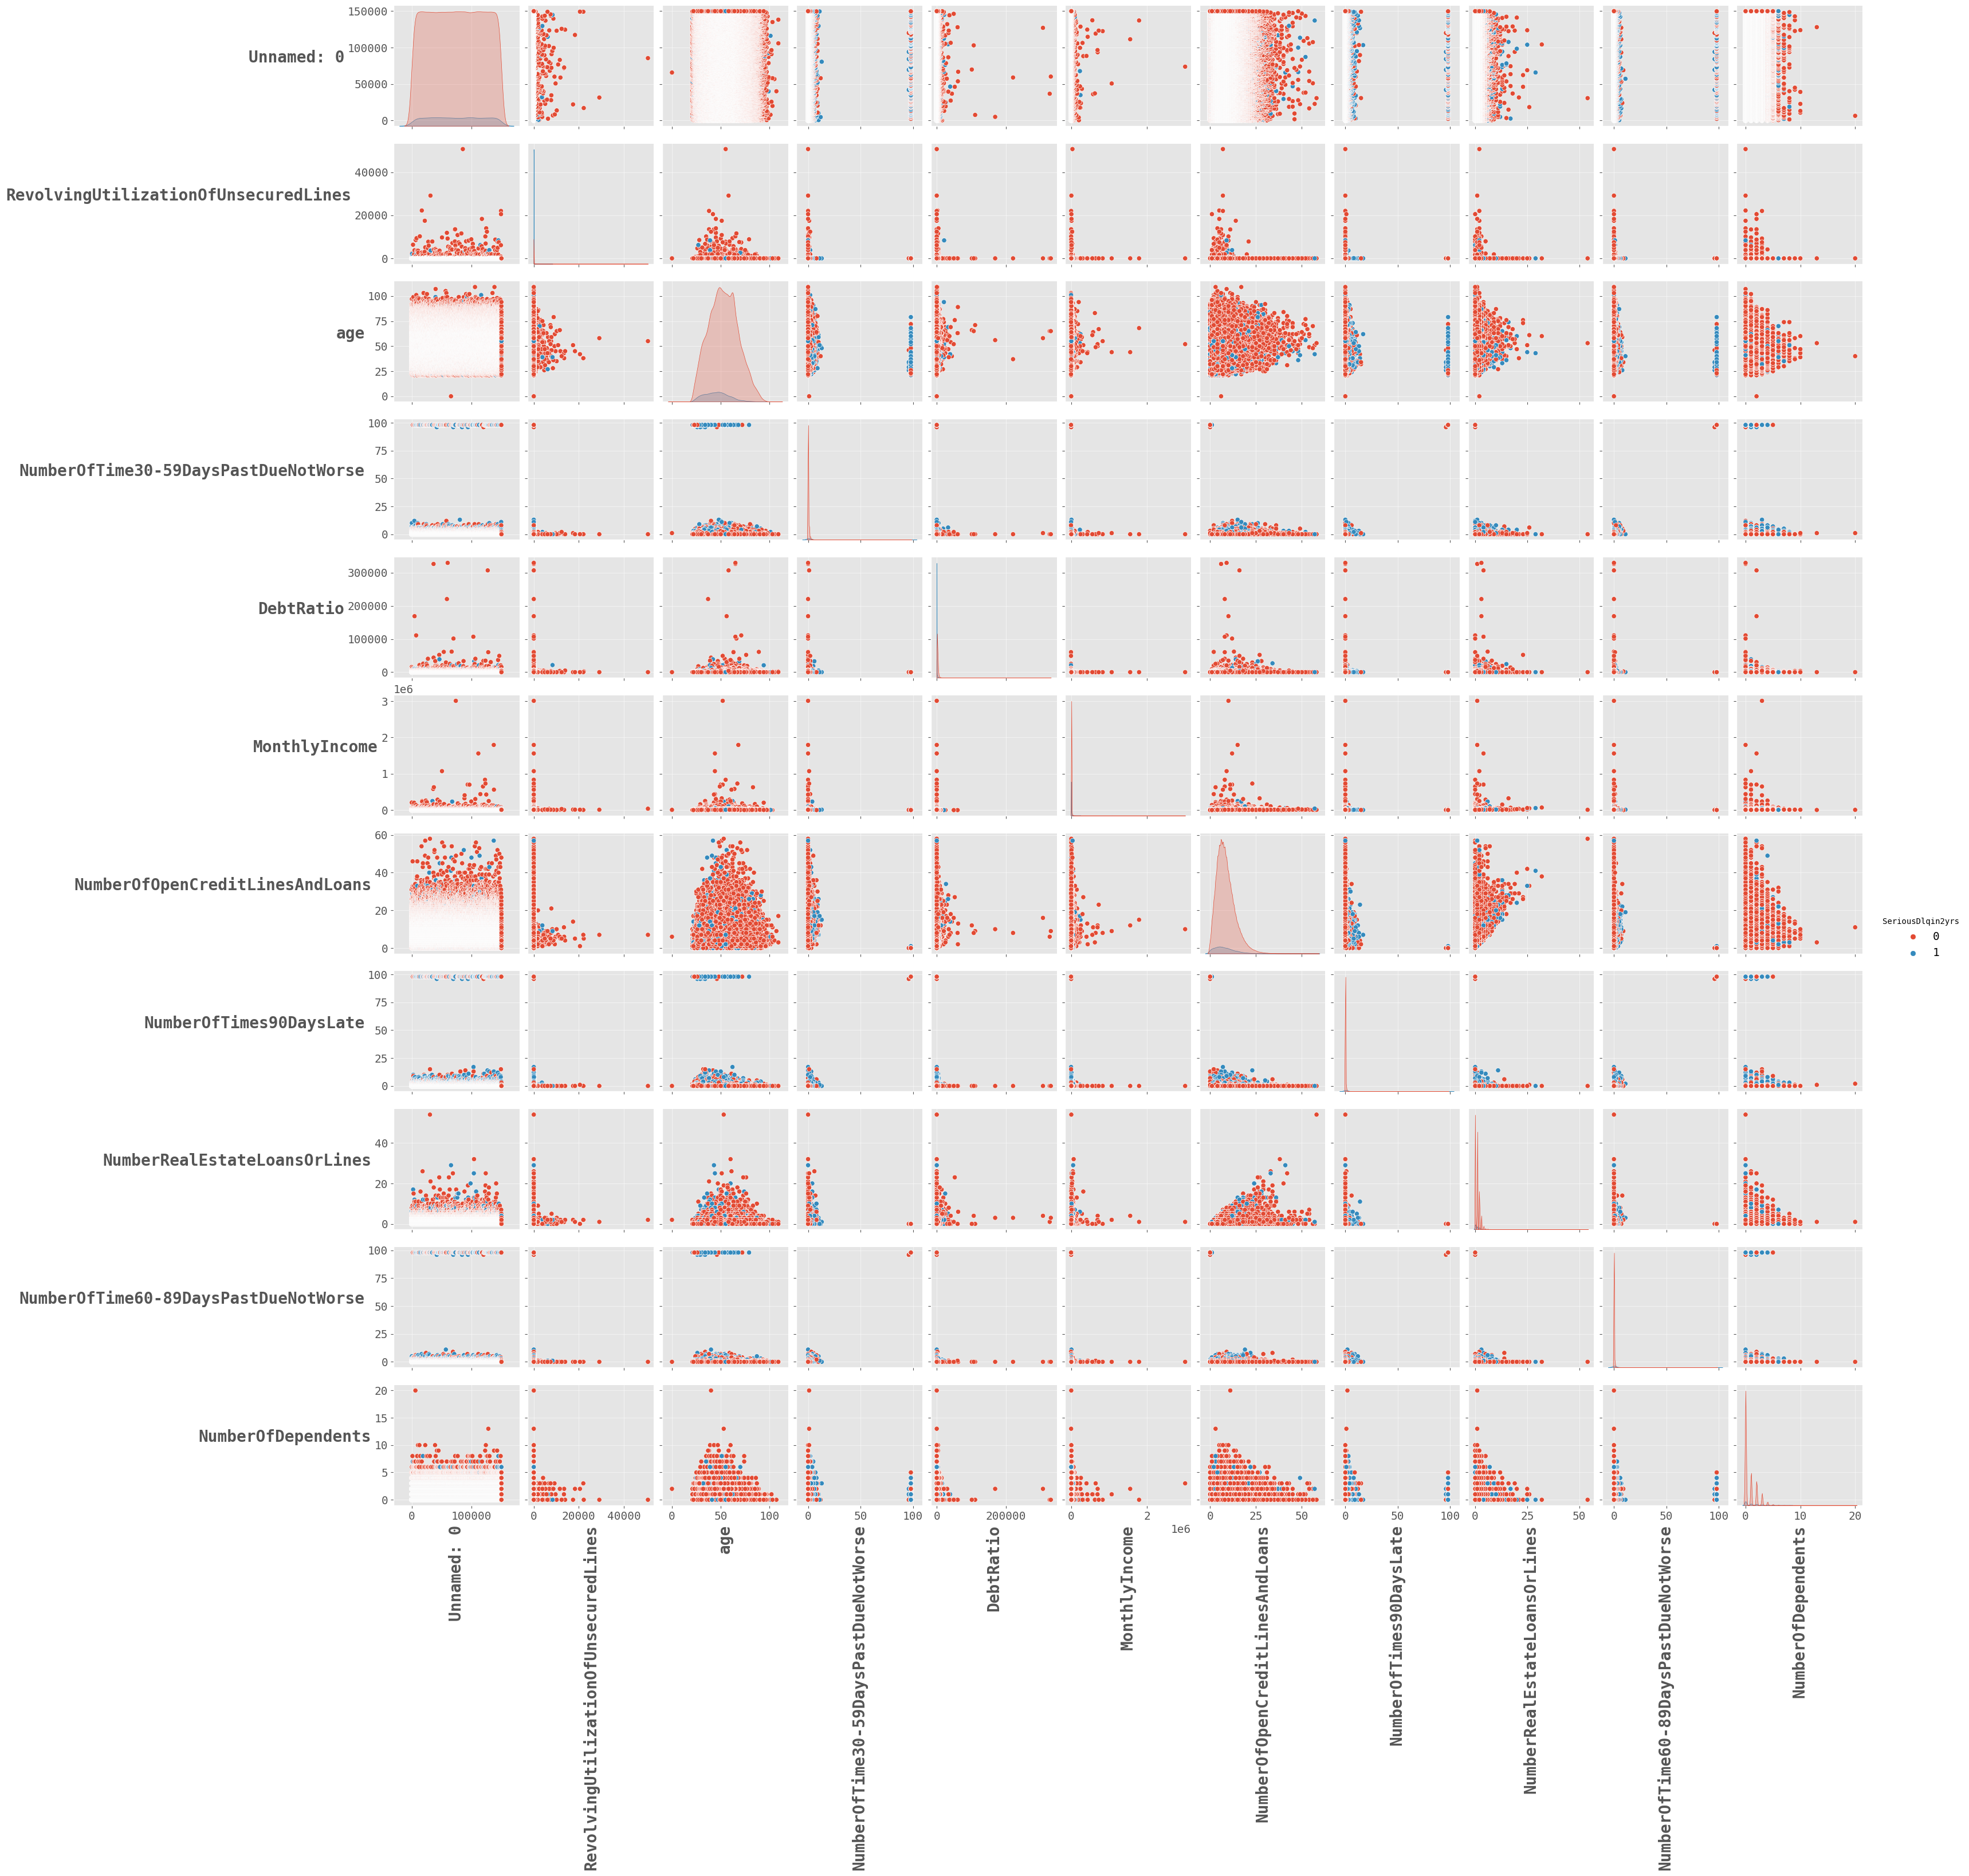

Wall time: 9min 41s


In [23]:
%%time
# load data into Dask dataframe
ddf = dd.read_csv('cs-training.csv')

# create pair plot
g = sns.pairplot(ddf.compute(), hue='SeriousDlqin2yrs')

# modify plot axes
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment('right')

# show plot
plt.show()

<font color = 'green'>

### Only a few features like Number of Late days seem to be splitting the data

<a id="52"></a>

## Custom Features 

<font size = 3>
<br/>

**Debt-per-person**: This feature could be calculated as the individual's debt ratio divided by the number of dependents they have. This feature could be useful for predicting default risk, as individuals with higher debt-per-person ratios are generally considered higher risk.

In [88]:
df['debt_per_person'] = df['DebtRatio'] / df['NumberOfDependents']
df['debt_per_person'] = df['debt_per_person'].replace([np.inf, -np.inf], np.nan)
mean_debt_per_person = df['debt_per_person'].mean()
df['debt_per_person'].fillna(mean_debt_per_person, inplace=True)

<font size = 3>
<br/>
    
**Delinquency_ratio**: This feature could be calculated by dividing the total amount past due across all past-due categories by the total credit limit across all open credit lines and loans. This feature could be useful for predicting creditworthiness, as individuals with high past-due-to-credit-limit ratios are generally considered higher risk.

In [89]:
df['TotalCreditLines'] = df['NumberOfOpenCreditLinesAndLoans'] + df['NumberRealEstateLoansOrLines']
df['Delinquency_ratio'] = df[['NumberOfTime30-59DaysPastDueNotWorse', 
                                           'NumberOfTime60-89DaysPastDueNotWorse', 
                                           'NumberOfTimes90DaysLate']].sum(axis=1) / df['TotalCreditLines']
df['Delinquency_ratio'] = df['Delinquency_ratio'].replace([np.inf, -np.inf], np.nan)
mean_Delinquency_ratio = df['Delinquency_ratio'].mean()
df['Delinquency_ratio'].fillna(mean_Delinquency_ratio, inplace=True)

<font size = 3>
<br/>

**Available credit ratio**: This feature could be calculated by dividing the total available credit (total credit limit minus total debt) by the total credit limit across all open credit lines and loans. This feature could be useful for predicting creditworthiness, as individuals with higher available credit ratios are generally considered lower risk.

In [90]:
df['available_credit_ratio'] = (df['TotalCreditLines'] - df['DebtRatio']) / df['TotalCreditLines']
df['available_credit_ratio'] = df['available_credit_ratio'].replace([np.inf, -np.inf], np.nan)
mean_available_credit_ratio = df['available_credit_ratio'].mean()
df['available_credit_ratio'].fillna(mean_available_credit_ratio, inplace=True)

<font size = 3>
<br/>

**TotalRevolvingLimits**: This feature represents the total revolving credit limit that an individual has across all their credit cards. It is typically calculated by summing up the revolving credit limits of all the credit cards that an individual has.

In [91]:
df['TotalRevolvingLimits'] = df['RevolvingUtilizationOfUnsecuredLines'] * df['DebtRatio'] / 100

<font size = 3>
<br/>

**Credit utilization ratio**: This feature could be derived by dividing the individual's total balance on revolving credit lines by their total credit limit across all revolving credit lines. This feature could be useful for predicting creditworthiness, as individuals with a higher credit utilization ratio may be at higher risk of default.

In [92]:
df['credit_utilization_ratio'] = df['RevolvingUtilizationOfUnsecuredLines'] / df['TotalRevolvingLimits']
df['credit_utilization_ratio'] = df['credit_utilization_ratio'].replace([np.inf, -np.inf], np.nan)
mean_credit_utilization_ratio = df['credit_utilization_ratio'].mean()
df['credit_utilization_ratio'].fillna(mean_credit_utilization_ratio, inplace=True)

<font size = 3>
<br/>

**Income-to-debt ratio**: This feature could be derived by dividing the individual's monthly income by their total debt. This feature could be useful for predicting default risk, as individuals with a higher income-to-debt ratio may be more able to repay their debts.

In [93]:
df['income_to_debt_ratio'] = df['MonthlyIncome'] / df['DebtRatio']
df['income_to_debt_ratio'] = df['income_to_debt_ratio'].replace([np.inf, -np.inf], np.nan)
mean_income_to_debt_ratio = df['income_to_debt_ratio'].mean()
df['income_to_debt_ratio'].fillna(mean_income_to_debt_ratio, inplace=True)

<br/>

### PCA

<font size = 3>
    
**PCA (Principal Component Analysis)** is a technique used in statistics and machine learning for dimensionality reduction. The goal of PCA is to reduce the number of variables in a dataset while retaining as much of the original variation as possible.

PCA works by identifying the directions in which the data varies the most, and projecting the data onto those directions. These directions are called principal components, and they are orthogonal to each other (i.e., they are uncorrelated). The first principal component captures the largest amount of variation in the data, and each subsequent component captures the next largest amount of variation, subject to the constraint that it must be orthogonal to the previous components.

PCA can be used for a variety of purposes, such as reducing the dimensionality of a dataset to make it more manageable, visualizing high-dimensional data in a lower-dimensional space, or identifying the most important variables in a dataset.
    
Since there was major correlation between the columns **NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTime60-89DaysPastDueNotWorse** and **NumberOfTimes90DaysLate**. This will now be cleared using **PCA**.
    
The same will be done for **NumberOfOpenCreditLinesAndLoans** and **NumberRealEstateLoansOrLines**.

In [94]:
# Total_Past_Due is a new variable being introduced that is a PCA of 
# NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate

# Select the three columns of interest
cols = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']
data = df[cols]

# Standardize the data
data_std = (data - data.mean()) / data.std()

# Create a PCA object and fit the data
pca = PCA(n_components=1)
pca.fit(data_std)

# Transform the data into the principal components
data_pca = pca.transform(data_std)

# Create a new column in the dataframe with the principal component values
df['Total_Past_Due'] = data_pca

In [95]:
# All_Credit_Lines is a new variable being introduced that is a PCA of 
# NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines

# Select the three columns of interest
cols = ['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']
data = df[cols]

# Standardize the data
data_std = (data - data.mean()) / data.std()

# Create a PCA object and fit the data
pca = PCA(n_components=1)
pca.fit(data_std)

# Transform the data into the principal components
data_pca = pca.transform(data_std)

# Create a new column in the dataframe with the principal component values
df['All_Credit_Lines'] = data_pca

### Now that all the features have been engineered, lets look at the correlations once more. 

In [96]:
df.info() # Check the number of columns and their info.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   age                                   150000 non-null  float64 
 1   MonthlyIncome                         150000 non-null  float64 
 2   NumberOfDependents                    146076 non-null  float64 
 3   DebtRatio                             150000 non-null  float64 
 4   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64 
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64   
 6   NumberRealEstateLoansOrLines          150000 non-null  float64 
 7   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64   
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64   
 9   NumberOfTimes90DaysLate               150000 non-null  int64   
 10  SeriousDlqin2yrs                      150000 non-null  c

### Lets see what a Pearson Correlation Says:

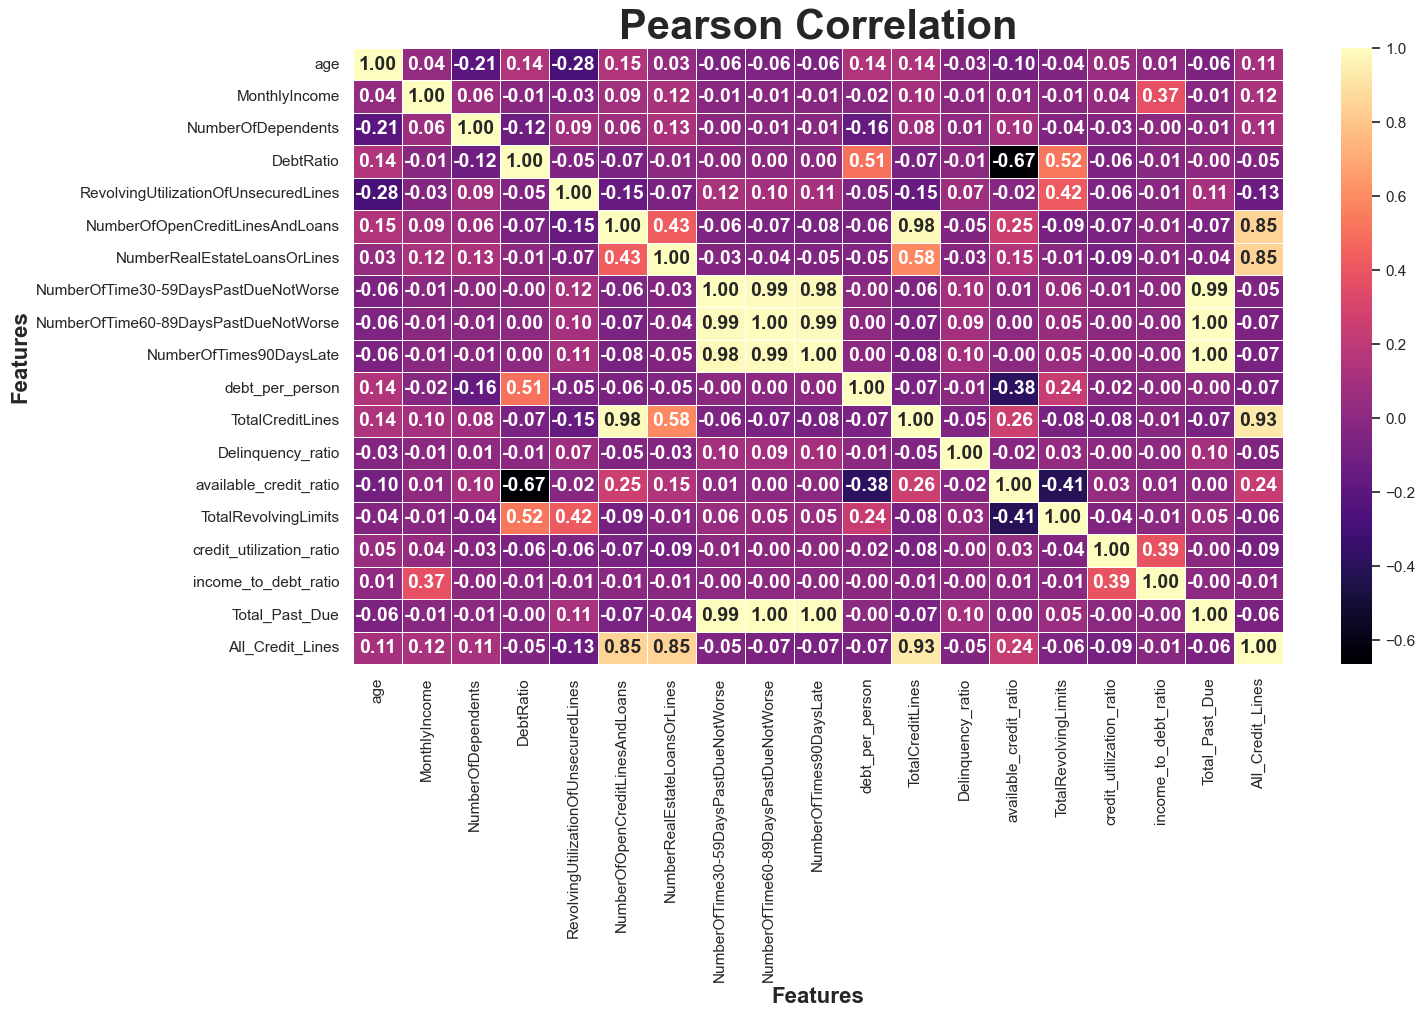

In [1031]:
correlation = df.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', annot_kws={'size':14, 'fontweight':'bold'}, linewidths=0.5)
sns.set(font_scale=0.8)
plt.title('Pearson Correlation', size=30, fontweight='bold')
plt.xlabel('Features', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')
plt.show()

#### We can see that a few of the columns need to be removed due to high correlation.

In [97]:
# Removing the columns with highest correlations

df.drop(['TotalCreditLines','NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse',\
         'NumberOfTimes90DaysLate', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines'], axis=1, inplace=True)

### Running the Pearson Correlation Again

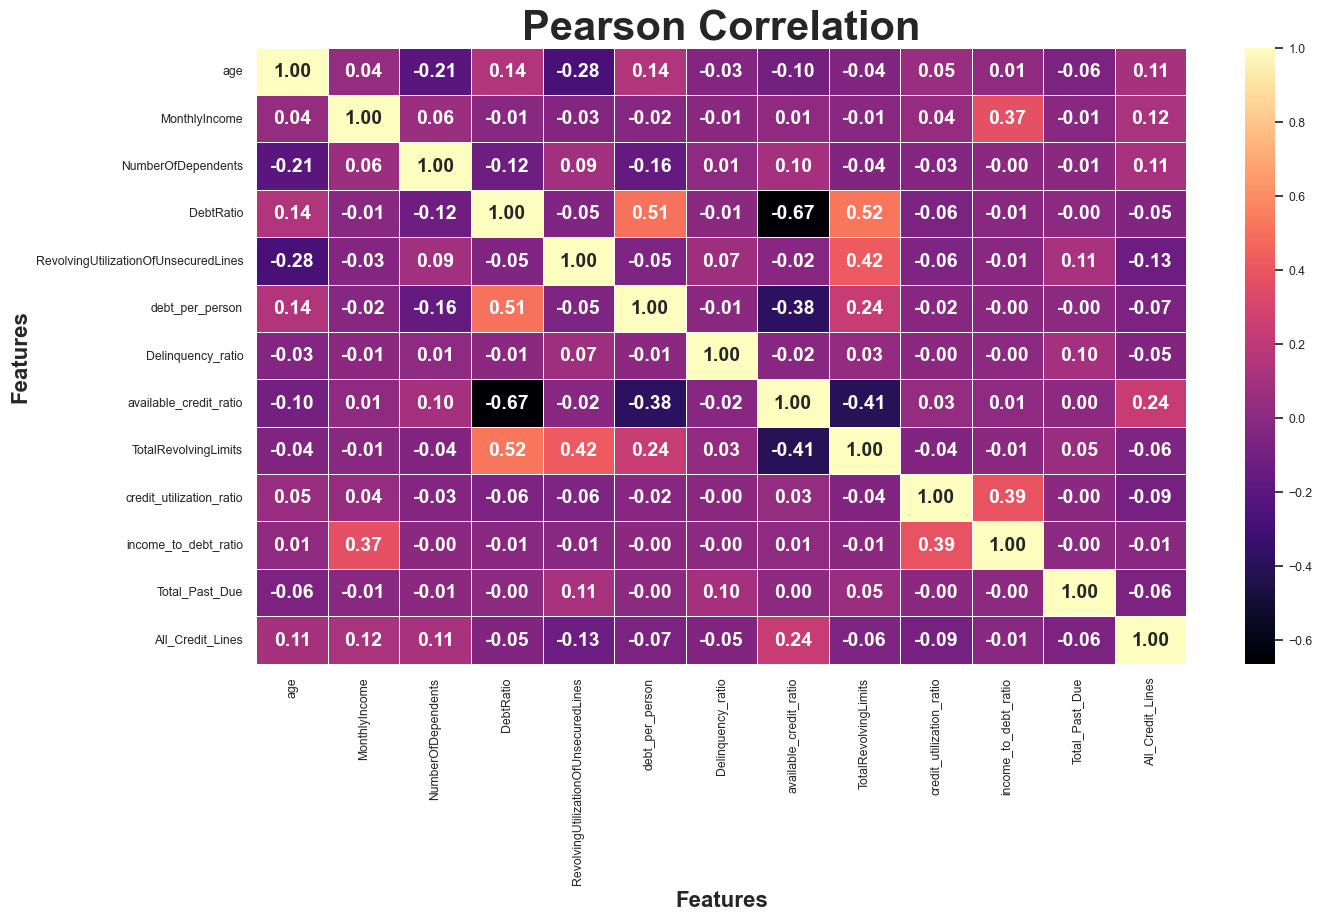

In [1035]:
correlation = df.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(correlation, annot=True, cmap='magma', fmt='.2f', annot_kws={'size':14, 'fontweight':'bold'}, linewidths=0.5)
sns.set(font_scale=0.8)
plt.title('Pearson Correlation', size=30, fontweight='bold')
plt.xlabel('Features', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')
plt.show()

### Most of them have been covered. The remaining have some correlation, but this is far more moderate and is being left in for this project.

### Now lets try running the other correlation metrics: VIF and t-test.

In [1037]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

                                 feature       VIF
0                                    age  4.817854
1                          MonthlyIncome  1.519052
2                     NumberOfDependents  1.469863
3                              DebtRatio  3.288881
4   RevolvingUtilizationOfUnsecuredLines  2.514258
5                       SeriousDlqin2yrs  1.166770
6                        debt_per_person  2.014106
7                      Delinquency_ratio  1.023010
8                 available_credit_ratio  3.153409
9                   TotalRevolvingLimits  2.165645
10              credit_utilization_ratio  1.233292
11                  income_to_debt_ratio  1.382536
12                        Total_Past_Due  1.032038
13                      All_Credit_Lines  1.126240


#### VIF has a much better distribution than last time.

Text(0.5, 1.0, 'Significance of Numerical Features for Default Prediction')

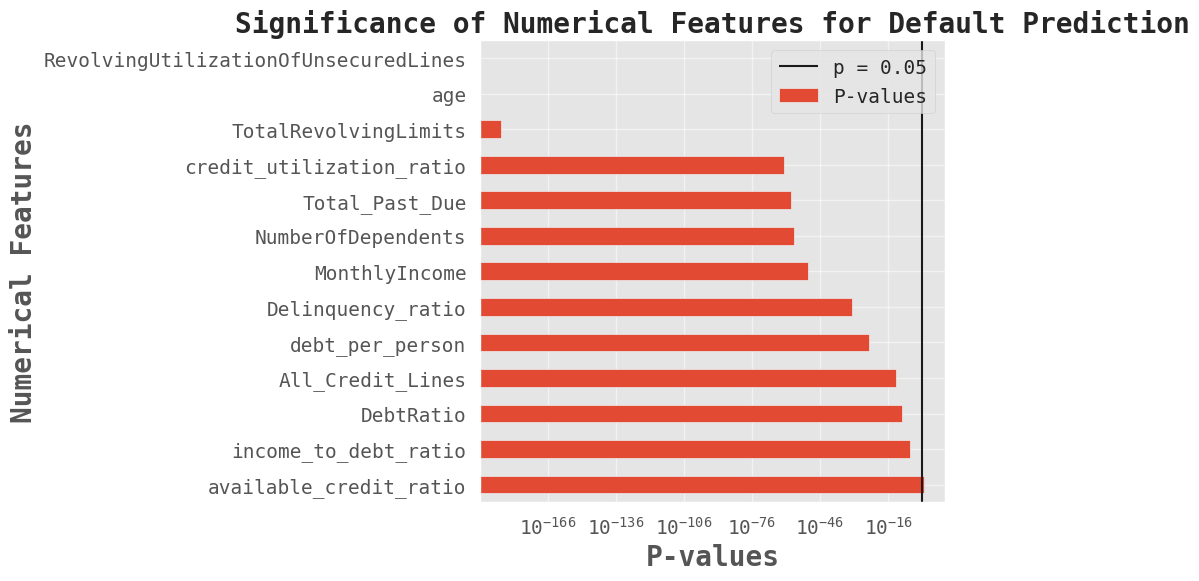

In [1039]:
# T Test

cat_cols = df.select_dtypes(include=['category'])
num_cols = df.select_dtypes(include=['int64', 'float64'])

col_list = []
p_val_list = []

# Loop and calculate p-values for each feature
for col in num_cols:
    # Group 1 : Customers who churn
    true_col = df[df['SeriousDlqin2yrs']==1][col]
    
    # Group 2 : Customers who did not churn
    false_col = df[df['SeriousDlqin2yrs']==0][col]
    
    # Compute the t-stat and p-value
    t_stat, p_val = ttest_ind(true_col, false_col, equal_var=False)

    # Append p_values
    p_val_list.append(p_val)
    col_list.append(col)

# Plot p-values
pvals = pd.DataFrame(p_val_list, col_list)
pvals.columns = ['P-values']
pvals.sort_values(by='P-values', ascending=False).plot(kind='barh');
plt.semilogx()
plt.vlines(x=0.05, ymin=-1, ymax=len(num_cols), colors='k', label='p = 0.05');
# plt.figure(figsize = (10, 8));
plt.legend();
plt.xlabel('P-values')
plt.ylabel('Numerical Features')
plt.title('Significance of Numerical Features for Default Prediction')

### We can also see all the p values are on or below 0.05 showing originality in the variables. 

---

<a id="53"></a>

### All of the feature engineering is now going to be placed in a function for using in a pipeline later

In [5]:
def feature_engineering(df):
    """
    This function takes in the dataframe and does all feature engineering at one go. This can be used in a pipeline. 
    """
    
    df_feature = df.copy() # create a copy of the original dataframe
    
    # debt_per_person feature
    df_feature['debt_per_person'] = df_feature['DebtRatio'] / df_feature['NumberOfDependents']
    df_feature['debt_per_person'] = df_feature['debt_per_person'].replace([np.inf, -np.inf], np.nan)
    mean_debt_per_person = df_feature['debt_per_person'].mean()
    df_feature['debt_per_person'].fillna(mean_debt_per_person, inplace=True)

    # Delinquency_ratio feature
    df_feature['TotalCreditLines'] = df_feature['NumberOfOpenCreditLinesAndLoans'] + df_feature['NumberRealEstateLoansOrLines']
    df_feature['Delinquency_ratio'] = df_feature[['NumberOfTime30-59DaysPastDueNotWorse',                                            'NumberOfTime60-89DaysPastDueNotWorse',                                            'NumberOfTimes90DaysLate']].sum(axis=1) / df_feature['TotalCreditLines']
    df_feature['Delinquency_ratio'] = df_feature['Delinquency_ratio'].replace([np.inf, -np.inf], np.nan)
    mean_Delinquency_ratio = df_feature['Delinquency_ratio'].mean()
    df_feature['Delinquency_ratio'].fillna(mean_Delinquency_ratio, inplace=True)

    # available_credit_ratio feature
    df_feature['available_credit_ratio'] = (df_feature['TotalCreditLines'] - df_feature['DebtRatio']) / df_feature['TotalCreditLines']
    df_feature['available_credit_ratio'] = df_feature['available_credit_ratio'].replace([np.inf, -np.inf], np.nan)
    mean_available_credit_ratio = df_feature['available_credit_ratio'].mean()
    df_feature['available_credit_ratio'].fillna(mean_available_credit_ratio, inplace=True)

    # TotalRevolvingLimits feature
    df_feature['TotalRevolvingLimits'] = df_feature['RevolvingUtilizationOfUnsecuredLines'] * df_feature['DebtRatio'] / 100

    # credit_utilization_ratio feature
    df_feature['credit_utilization_ratio'] = df_feature['RevolvingUtilizationOfUnsecuredLines'] / df_feature['TotalRevolvingLimits']
    df_feature['credit_utilization_ratio'] = df_feature['credit_utilization_ratio'].replace([np.inf, -np.inf], np.nan)
    mean_credit_utilization_ratio = df_feature['credit_utilization_ratio'].mean()
    df_feature['credit_utilization_ratio'].fillna(mean_credit_utilization_ratio, inplace=True)
    
    # income_to_debt_ratio feature
    df_feature['income_to_debt_ratio'] = df_feature['MonthlyIncome'] / df_feature['DebtRatio']
    df_feature['income_to_debt_ratio'] = df_feature['income_to_debt_ratio'].replace([np.inf, -np.inf], np.nan)
    mean_income_to_debt_ratio = df_feature['income_to_debt_ratio'].mean()
    df_feature['income_to_debt_ratio'].fillna(mean_income_to_debt_ratio, inplace=True)

    # Total_Past_Due is a new variable being introduced that is a PCA of 
    # NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate

    cols1 = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse',\
             'NumberOfTimes90DaysLate'] # Select the three columns of interest
    data1 = df_feature[cols1]
    data_std1 = (data1 - data1.mean()) / data1.std() # Standardize the data
    pca1 = PCA(n_components=1) # Create a PCA object and fit the data
    pca1.fit(data_std1)
    data_pca1 = pca1.transform(data_std1) # Transform the data into the principal components
    df_feature['Total_Past_Due'] = data_pca1 # Create a new column in the dataframe with the principal component values

    # All_Credit_Lines is a new variable being introduced that is a PCA of 
    # NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines

    cols2 = ['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines'] # Select the three columns of interest
    data2 = df_feature[cols2]
    data_std2 = (data2 - data2.mean()) / data2.std() # Standardize the data
    pca2 = PCA(n_components=1) # Create a PCA object and fit the data
    pca2.fit(data_std2)
    data_pca2 = pca2.transform(data_std2) # Transform the data into the principal components
    df_feature['All_Credit_Lines'] = data_pca2 # Create a new column in the dataframe with the principal component values

    # Removing the columns with highest correlations
    df_feature.drop(['TotalCreditLines','NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse',\
             'NumberOfTimes90DaysLate', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines'], axis=1, inplace=True)
    
    return df_feature

### The Function needs to be cleaned up before inputting into a pipeline

---

<a id="6"></a>

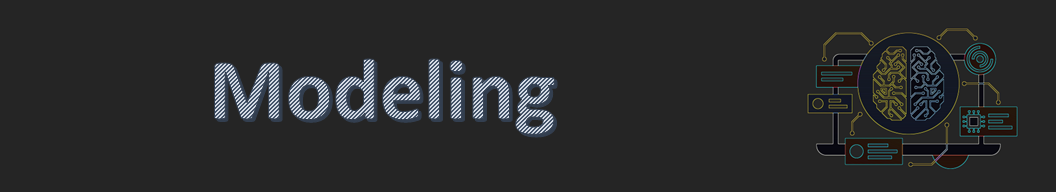

[Back to Contents](#100)


---

<font size =3>

   
The **Give Me Some Credit dataset** is a binary classification problem where the goal is to predict whether a borrower will experience financial distress in the next two years based on a set of features. There are many different machine learning models that can be used to tackle this problem. In this notebook we will be exploring the following keeping in mind our preffered metric is ithe AUC-ROC:
    
- **Logistic Regression**: This is a simple yet effective model that is often used for binary classification problems. Logistic Regression is easy to interpret, fast to train, and can handle large datasets. It can be a good starting point for the Give Me Some Credit dataset. In the case of logistic regression, the predicted probabilities of the positive class (e.g., deqlinquency) are used to compute the AUC-ROC. The predicted probabilities can be thresholded to obtain binary predictions for evaluation purposes, and the AUC-ROC considers all possible thresholds and evaluates the model's performance across all of them.
    
- **DecisionTrees**: They are a popular machine learning algorithm for both regression and classification problems. They recursively partition the feature space into smaller and smaller subsets based on a set of decision rules, which can be used to predict the target variable for new observations. Since decision trees are often used in classification problems, the AUC-ROC can help assess their performance by quantifying how well the model distinguishes between the positive and negative classes.     
- **Random Forest**: This is a popular ensemble learning algorithm that can handle both classification and regression problems. Random Forests can handle missing values and noisy data, and they tend to perform well on large datasets. They are also relatively easy to interpret.

- **Gradient Boosting**: Gradient Boosting is another ensemble learning algorithm that can be used for classification problems. It builds an ensemble of weak models, such as decision trees, by iteratively optimizing a loss function. Gradient Boosting can handle non-linear relationships between the features and the target variable, and it can perform well on a wide range of datasets.
    
- **Support Vector Machines (SVM)**: SVM is a widely used algorithm for binary classification tasks. It can handle non-linearly separable datasets and can output probabilities that can be used to calculate the AUC-ROC. SVM with a radial basis function (RBF) kernel is a popular choice for classification problems.

- **XGBoost**: XGBoost is an ensemble learning algorithm that has gained a lot of popularity in recent years. It can handle missing values and can output probabilities, making it a good choice for AUC-ROC evaluation. XGBoost can handle large datasets and has shown good performance on many classification tasks.

- **LightGBM**: LightGBM is another ensemble learning algorithm that is designed for large-scale datasets. It can handle missing values and can output probabilities, making it a good choice for AUC-ROC evaluation. LightGBM is known for its speed and has shown good performance on many classification tasks.

- **CatBoost**: CatBoost is a gradient boosting algorithm that is designed to handle categorical features. It can handle missing values and can output probabilities, making it a good choice for AUC-ROC evaluation. CatBoost has shown good performance on many classification tasks and is particularly useful when dealing with high-dimensional categorical data.   

- **Adaboost**: This is an ensemble learning algorithm that combines multiple weak learners into a strong classifier. It works by iteratively training weak learners, such as decision trees or regression models, on different subsets of the data and weighting the observations based on how well they were classified by the previous models. The final model is a weighted sum of the weak learners, with the weights determined by their individual performance. 
    
- **Neural Networks**: Deep learning models such as neural networks have shown impressive results on many different classification problems. They can handle complex relationships between features and the target variable and can perform well on very large datasets. However, they can be computationally expensive to train and may require a lot of hyperparameter tuning.Neural networks can also be used for AUC-ROC evaluation. 
    - **MLP (Multilayer Perceptron)** is a type of feedforward neural network that consists of multiple layers of nodes, with each layer connected to the next one. It is a flexible and powerful model that can be used for a wide range of classification and regression problems. MLP can handle both linear and non-linear relationships between the features and the target variable.
    - **KerasClassifier**: KerasClassifier is a wrapper class in the Keras library that allows developers to use Keras deep learning models with scikit-learn. Keras is a popular deep learning library that provides a high-level API for building and training neural networks. With KerasClassifier, users can define their deep learning model in Keras and then use it as a scikit-learn estimator for classification problems. 


In Summary the ML algorithms tried in this proejct are:
  
- **Logistic Regression**
- **DecisionTrees**
- **Random Forest**
- **Gradient Boosting**
- **Support Vector Machines (SVM)** -Didnt use due to time taken to compute
- **XGBoost**
- **LightGBM**
- **CatBoost**
- **Adaboostv**
- **Multi-Layer Perceptron (MLP)**
- **KerasClassifier** - Not used in initial basic model
   
    
It is worth noting that the choice of model will depend on the specific characteristics of the dataset, such as the number of features, the amount of missing data, and the distribution of the target variable.
    
### The following steps will be taken in the modeling in this project.    
    
- The basic models will be run with a scaler and without, with a sampler and without, and a combination of these to first determine the way forward. 
- The chosen scaler/sampler method will be used on all the ML methods including Deep Learning methods using Grid Search and other Hyperparameter tuning methods.
- The highest scores will be recorded and the top 5 will be chosen for the Model Ensemble Methods: Voting and Stacking Classifiers.
- The Final Tuned method will be for using in the Pipeline. 
    
---

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   age                                   150000 non-null  float64 
 1   MonthlyIncome                         150000 non-null  float64 
 2   NumberOfDependents                    150000 non-null  float64 
 3   DebtRatio                             150000 non-null  float64 
 4   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64 
 5   SeriousDlqin2yrs                      150000 non-null  category
 6   debt_per_person                       150000 non-null  float64 
 7   Delinquency_ratio                     150000 non-null  float64 
 8   available_credit_ratio                150000 non-null  float64 
 9   TotalRevolvingLimits                  150000 non-null  float64 
 10  credit_utilization_ratio              150000 non-null  f

Our features are going to be all the numerical columns.

In [7]:
features = df.drop(['SeriousDlqin2yrs'], axis=1).columns #Creates a variable having all columns other than SeriousDlqin2yrs

##### We now create two dataframes, one with all the variable other than the target varible. And another, with only the target variable

In [8]:
X = df[features] #Creates a df without the target variable
y = df['SeriousDlqin2yrs']

<font size =3>

We then use **Test_Train_Split** to create a training and testing set.

This is a function that is commonly used to split a dataset into two or more subsets for the purposes of supervised machine learning. The function takes as input the dataset and a set of parameters, such as the test size, random state, and stratification strategy, and returns two or more subsets of the data, typically called the training set and the test set.

The training set is used to fit the machine learning model, and the test set is used to evaluate the performance of the model. By splitting the data into separate training and test sets, we can assess how well the model generalizes to new, unseen data.

The function randomly splits the data into subsets, ensuring that the subsets are representative of the overall dataset. This helps to avoid overfitting, where the model performs well on the training data but poorly on new, unseen data. The train_test_split function is a commonly used tool in machine learning and is typically used at the beginning of the modeling process.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42)

# We have used a test size of 0.2 showing 20%

# We have a Random State of 42. This is to have repeatable results. 

# When stratify=y, the split is performed in a way that ensures that the proportion of classes in the target variable
# is the same in both the training and testing datasets. This is important when the classes are imbalanced and ensures
# that the model is trained and evaluated on representative data.

<a id="61"></a>

## Basic Model

### The below function will give us the auc scored using each model in their most basic form with no tuning. 

In [15]:
def get_auc_scores(X_train, X_test, y_train, y_test, trial_name):
    classifiers = {
        'Logistic Regression': LogisticRegression(random_state=42, n_jobs=-1),
        'Decision Trees': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingClassifier(),
#         'SVM': SVC(probability=True) #This was removed because it is very expensive computationally
        'XGBoost': XGBClassifier(random_state=42, n_jobs=-1),
        'LightGBM': LGBMClassifier(random_state=42, n_jobs=-1),
        'CatBoost': CatBoostClassifier(random_state=42, verbose=False, thread_count=-1),
        'Adaboost': AdaBoostClassifier(random_state=42),
        'MLP': MLPClassifier(random_state=42)
    }
    
    results = pd.DataFrame(columns=['Model', trial_name])
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred_prob = clf.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_pred_prob)
        results = results.append({'Model': name, trial_name: auc_score}, ignore_index=True)

    return results

In [16]:
%%time
BasicModel_AUC = get_auc_scores(X_train, X_test, y_train, y_test, "Basic Model")
BasicModel_AUC

Wall time: 1min 13s


Model  Basic Model
0  Logistic Regression     0.604587
1       Decision Trees     0.612859
2        Random Forest     0.839380
3    Gradient Boosting     0.867459
4              XGBoost     0.863670
5             LightGBM     0.866314
6             CatBoost     0.867437
7             Adaboost     0.863255
8                  MLP     0.623372

<a id="62"></a>

## Transformation

<br/>

<font size =4>
    
**Next we will try the same with a combination of three different scalers and samplers:**

<br/>

<font size =3>

The scaling methods tested are **MinMax Scaler**, **RobustScaler**, and **Standard Scaler**. These methods are used to transform the input data to a more manageable range or distribution, making it easier for the classifier algorithm to learn from it. MinMax Scaler scales the data to a range between 0 and 1, RobustScaler scales the data based on median and quartile range, and Standard Scaler scales the data to have zero mean and unit variance.

The sampling techniques tested are **Random Over Sampling**, **Random Under Sampling**, and **Smote**. These techniques are used to address the issue of imbalanced datasets, where one class has significantly more samples than the other. Random Over Sampling creates additional samples for the minority class, Random Under Sampling removes samples from the majority class, and Smote creates synthetic samples for the minority class based on the existing samples.

By combining different scaling and sampling techniques, we identify the optimal combination that maximizes the AUC ROC score for your classifier algorithm. **This loop is testing all possible combinations of scaling and sampling techniques and reporting the AUC ROC score for each combination.**
    
### A quick look into the scalers:
    
- **MinMaxScaler** scales the data to a fixed range between 0 and 1. It may be useful when the feature values are known to be in a certain range, and the aim is to keep them within that range. However, if there are outliers in the data, MinMaxScaler may not be the best choice, as it will squeeze the values between 0 and 1, causing the outliers to become less distinguishable from the rest of the data. This can lead to a decrease in AUC ROC.

- **RobustScaler**, on the other hand, is more robust to outliers than MinMaxScaler. It scales the data to the interquartile range (IQR) rather than a fixed range like MinMaxScaler. This can help to preserve the outliers in the data and make them more distinguishable from the rest of the data. As a result, using RobustScaler may lead to an increase in AUC ROC, especially when the dataset contains outliers.

- **StandardScaler** is another popular scaler that scales the data to have a mean of 0 and a standard deviation of 1. It is useful when the distribution of the data is roughly Gaussian (i.e., bell-shaped). Using StandardScaler may help to make the data more symmetrical and reduce the effect of outliers. However, if the dataset contains extreme outliers, StandardScaler may not be the best choice, as it may not be able to handle them effectively. The impact of StandardScaler on AUC ROC will depend on the nature of the data and whether the outliers have a significant impact on the model's performance.   
    
In summary, the choice of scaler from an AUC ROC perspective will depend on the nature of the dataset and the presence of outliers. MinMaxScaler may be suitable when the feature values are known to be within a certain range, while RobustScaler may be more suitable when the dataset contains outliers. StandardScaler may be suitable when the distribution of the data is roughly Gaussian, but extreme outliers may cause problems. Ultimately, the best way to determine which scaler to use is to experiment with different options and evaluate their impact on the model's performance using appropriate metrics such as AUC ROC.
    
### A quick look into the samplers:
    
- **Random Over Sampling**: involves randomly duplicating examples from the minority class until it is balanced with the majority class. This can help to increase the recall of the minority class, but it can also lead to overfitting and a decrease in precision. In terms of AUC ROC, Random Over Sampling may not always lead to an improvement in performance, as it can lead to a higher false positive rate due to the duplicated examples.

- **Random Under Sampling**: involves randomly removing examples from the majority class until it is balanced with the minority class. This can help to reduce overfitting and increase precision, but it can also lead to a decrease in recall. In terms of AUC ROC, Random Under Sampling may not always lead to an improvement in performance, as it can lead to a higher false negative rate due to the removed examples.

- **SMOTE (Synthetic Minority Over-sampling Technique)** involves generating synthetic examples for the minority class by interpolating between existing examples. This can help to increase the number of minority class examples and make the dataset more balanced, without overfitting or underfitting. In terms of AUC ROC, SMOTE may lead to an improvement in performance, as it can help to increase the recall of the minority class without significantly affecting the false positive rate.

In summary, the choice of resampling technique from an AUC ROC perspective will depend on the nature of the dataset and the performance trade-offs between precision, recall, and false positive/negative rates. Random Over Sampling may lead to overfitting and a higher false positive rate, Random Under Sampling may lead to a higher false negative rate, while SMOTE may help to balance the dataset without significantly affecting the false positive rate. Ultimately, the best way to determine which resampling technique to use is to experiment with different options and evaluate their impact on the model's performance using appropriate metrics such as AUC ROC.

### The below script will create a grid based on all these samplers and scalers. 

In [17]:
%%time
# Define the list of scalers and samplers
scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]
samplers = [RandomOverSampler(), RandomUnderSampler(), SMOTE()]

results_list = []

# Loop through each scaler and sampler combination
for scaler in scalers:
    scaler_name = type(scaler).__name__
    for sampler in samplers:
        sampler_name = type(sampler).__name__
        
        # Scale and resample the data
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_scaled, y_train)
        
        # Compute AUC scores
        results = get_auc_scores(X_train_resampled, X_test_scaled, y_train_resampled, y_test, f'{scaler_name} with {sampler_name}')
        results_list.append(results.reset_index(drop=True))  # reset index before appending
    
# Merge into one dataframe
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Model'), results_list)
merged_df

Wall time: 32min 40s


Model  MinMaxScaler with RandomOverSampler  \
0  Logistic Regression                             0.819382   
1       Decision Trees                             0.605813   
2        Random Forest                             0.833149   
3    Gradient Boosting                             0.867998   
4              XGBoost                             0.854984   
5             LightGBM                             0.866810   
6             CatBoost                             0.849887   
7             Adaboost                             0.860895   
8                  MLP                             0.864084   

   MinMaxScaler with RandomUnderSampler  MinMaxScaler with SMOTE  \
0                              0.793235                 0.821256   
1                              0.706274                 0.620258   
2                              0.851358                 0.835006   
3                              0.866222                 0.861382   
4                              0.856731                 0.852094   
5                              0.866602                 0.858316   
6                              0.867002                 0.858852   
7                              0.861887                 0.855927   
8                              0.862147                 0.857350   

   RobustScaler with RandomOverSampler  RobustScaler with RandomUnderSampler  \
0                             0.846315                              0.848523   
1                             0.600348                              0.704936   
2                             0.834356                              0.850426   
3                             0.868100                              0.866545   
4                             0.849903                              0.855590   
5                             0.866491                              0.864519   
6                             0.852450                              0.865372   
7                             0.862255                              0.861400   
8                             0.862406                              0.860373   

   RobustScaler with SMOTE  StandardScaler with RandomOverSampler  \
0                 0.841203                               0.846764   
1                 0.621947                               0.595831   
2                 0.831087                               0.832302   
3                 0.862571                               0.868158   
4                 0.851931                               0.853331   
5                 0.858812                               0.867158   
6                 0.861488                               0.850418   
7                 0.855997                               0.862569   
8                 0.845190                               0.855103   

   StandardScaler with RandomUnderSampler  StandardScaler with SMOTE  
0                                0.847568                   0.848034  
1                                0.700354                   0.611445  
2                                0.851233                   0.832712  
3                                0.866698                   0.861297  
4                                0.854303                   0.851128  
5                                0.866055                   0.856559  
6                                0.866195                   0.859726  
7                                0.860881                   0.852067  
8                                0.861971                   0.850430

In [37]:
merged_df = merged_df.set_index('Model') # Setting index as Model

In [48]:
BasicModel_AUC = BasicModel_AUC.set_index('Model') # Setting index as Model

In [49]:
combined_df = BasicModel_AUC.join(merged_df, how='inner')  Combining the Dfs together 

In [50]:
combined_df # DF containing basic AUC scores for all.

Basic Model  MinMaxScaler with RandomOverSampler  \
Model                                                                   
Logistic Regression     0.604587                             0.819382   
Decision Trees          0.612859                             0.605813   
Random Forest           0.839380                             0.833149   
Gradient Boosting       0.867459                             0.867998   
XGBoost                 0.863670                             0.854984   
LightGBM                0.866314                             0.866810   
CatBoost                0.867437                             0.849887   
Adaboost                0.863255                             0.860895   
MLP                     0.623372                             0.864084   

                     MinMaxScaler with RandomUnderSampler  \
Model                                                       
Logistic Regression                              0.793235   
Decision Trees                                   0.706274   
Random Forest                                    0.851358   
Gradient Boosting                                0.866222   
XGBoost                                          0.856731   
LightGBM                                         0.866602   
CatBoost                                         0.867002   
Adaboost                                         0.861887   
MLP                                              0.862147   

                     MinMaxScaler with SMOTE  \
Model                                          
Logistic Regression                 0.821256   
Decision Trees                      0.620258   
Random Forest                       0.835006   
Gradient Boosting                   0.861382   
XGBoost                             0.852094   
LightGBM                            0.858316   
CatBoost                            0.858852   
Adaboost                            0.855927   
MLP                                 0.857350   

                     RobustScaler with RandomOverSampler  \
Model                                                      
Logistic Regression                             0.846315   
Decision Trees                                  0.600348   
Random Forest                                   0.834356   
Gradient Boosting                               0.868100   
XGBoost                                         0.849903   
LightGBM                                        0.866491   
CatBoost                                        0.852450   
Adaboost                                        0.862255   
MLP                                             0.862406   

                     RobustScaler with RandomUnderSampler  \
Model                                                       
Logistic Regression                              0.848523   
Decision Trees                                   0.704936   
Random Forest                                    0.850426   
Gradient Boosting                                0.866545   
XGBoost                                          0.855590   
LightGBM                                         0.864519   
CatBoost                                         0.865372   
Adaboost                                         0.861400   
MLP                                              0.860373   

                     RobustScaler with SMOTE  \
Model                                          
Logistic Regression                 0.841203   
Decision Trees                      0.621947   
Random Forest                       0.831087   
Gradient Boosting                   0.862571   
XGBoost                             0.851931   
LightGBM                            0.858812   
CatBoost                            0.861488   
Adaboost                            0.855997   
MLP                                 0.845190   

                     StandardScaler with RandomOverSampler  \
Model                                                        
Logistic Regression           

### Plotting the AUC Scores for all the scalers/samplers/

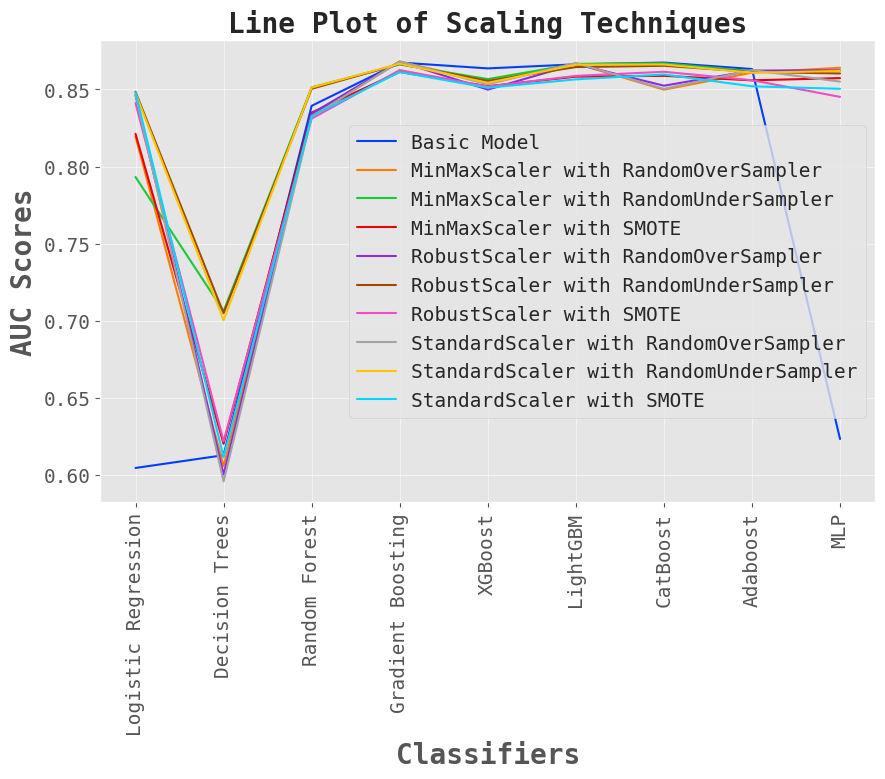

In [74]:
# Set up the color palette
palette = sns.color_palette('bright', len(combined_df.columns))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, col in enumerate(combined_df.columns):
    ax.plot(combined_df[col].index, combined_df[col], label=col, color=palette[i])

# Set the plot title and axis labels
ax.set_title('Line Plot of Scaling Techniques')
ax.set_xlabel('Classifiers')
ax.set_ylabel('AUC Scores')

# Rotate the xticks
plt.xticks(rotation=90)

# Add the legend
ax.legend()

# Set the style
sns.set_style('ticks')

# Show the plot
plt.show()

### We now can drop a few models and choose our Sampler and Scaler. 

In [76]:
combined_df.max() # Max of combined iincluding basic model

Basic Model                               0.867459
MinMaxScaler with RandomOverSampler       0.867998
MinMaxScaler with RandomUnderSampler      0.867002
MinMaxScaler with SMOTE                   0.861382
RobustScaler with RandomOverSampler       0.868100
RobustScaler with RandomUnderSampler      0.866545
RobustScaler with SMOTE                   0.862571
StandardScaler with RandomOverSampler     0.868158
StandardScaler with RandomUnderSampler    0.866698
StandardScaler with SMOTE                 0.861297
dtype: float64

In [77]:
combined_df.mean() # Mean of combined iincluding basic model

Basic Model                               0.778704
MinMaxScaler with RandomOverSampler       0.824778
MinMaxScaler with RandomUnderSampler      0.836829
MinMaxScaler with SMOTE                   0.824493
RobustScaler with RandomOverSampler       0.826958
RobustScaler with RandomUnderSampler      0.841965
RobustScaler with SMOTE                   0.825581
StandardScaler with RandomOverSampler     0.825737
StandardScaler with RandomUnderSampler    0.841695
StandardScaler with SMOTE                 0.824822
dtype: float64

In [85]:
merged_df.mean(axis=1) # The merged df was taken in this as MLP has low scores prior to scaling

Model
Logistic Regression    0.834698
Decision Trees         0.640801
Random Forest          0.839070
Gradient Boosting      0.865441
XGBoost                0.853333
LightGBM               0.863480
CatBoost               0.859043
Adaboost               0.859320
MLP                    0.857672
dtype: float64

### The chosen method is Robust Scaler with Random Over Sampling. While the highest value was in Stanted Scaler and Random Over Sampling, this wasn't the case for all models. The decision was based on the mean.

### The ROS has a habit of overfitting and this needs ot be reviewed.

### Going forward normal Decision Trees is removed due to low score. The Boosting ML models mostly use Decision Tree, so it is still technically used. 

In [47]:
# merged_df.to_csv('merged_df_scalervssampler.csv', index=False) # Saving in case of data loss

### Final Transformed Data

In [8]:
features = df.drop(['SeriousDlqin2yrs'], axis=1).columns 

In [9]:
X = df[features] #Creates a df without the target variable 
y = df['SeriousDlqin2yrs']

In [10]:
# Split the data into train and test sets
X_train1, X_test1, y_train1, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Scale the training data using RobustScaler
rs = RobustScaler()
X_train_scaled = rs.fit_transform(X_train1)
X_test_scaled = rs.transform(X_test1)

# Resample the training data using Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train1)

# Set the final train and test sets to the resampled and scaled data
X_train = X_train_resampled
y_train = y_train_resampled
X_test = X_test_scaled

<a id="63"></a>

### Defining Functions for Grid Search and for plotting the roc curve. 

In [91]:
def compute_model(model, params):
    """
    This function does a grid search with a 3 fold Stratified K fold and returns 
    the best model, the fpr, tpr and roc_auc values. 
    """
    skf = StratifiedKFold(n_splits=3)
    
    gs = GridSearchCV(model, params, cv=skf, n_jobs=-1, verbose=1, scoring='roc_auc')
    gs.fit(X_train, y_train)
    
    model_stats = pd.DataFrame(gs.cv_results_)
    model_stats = model_stats.sort_values(by='rank_test_score', ascending=False).reset_index()
    
    ypred_train = gs.best_estimator_.predict_proba(X_train)[:, 1]
    ypred = gs.best_estimator_.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, ypred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    result = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

    y_pred = gs.best_estimator_.predict(X_test)
    print(classification_report(y_test, y_pred))

    return result, gs.best_estimator_,model_stats

In [92]:
def plot_roc_curve(result, best_estimator):
    """
    This function does plot the roc curve. 
    """
    fpr = result['fpr']
    tpr = result['tpr']
    roc_auc = result['roc_auc']

    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [11]:
model_results = dict() # Dictionary to save results for later

#Convert Scaled Data to dataframe for use in per importance.
X_train_d = pd.DataFrame(X_train, columns=X_train1.columns)

## Now Lets try out the models with GridSearch hyperparameter tuning

<a id="641"></a>

## Logistic Regression

**<font size=3 color=green>Model AUC Score:</font>** 0.84947

Fitting 3 folds for each of 32 candidates, totalling 96 fits
              precision    recall  f1-score   support

           0       0.99      0.27      0.43     27995
           1       0.09      0.98      0.16      2005

    accuracy                           0.32     30000
   macro avg       0.54      0.63      0.29     30000
weighted avg       0.93      0.32      0.41     30000



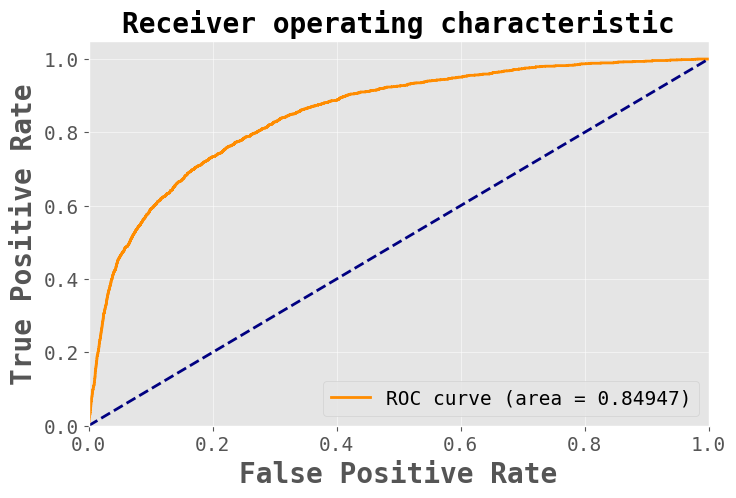

Wall time: 4min 40s


In [94]:
%%time
#LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 500],
    'class_weight': ['balanced', {0: 1, 1: 5}]
}
model_name = 'Logistic Regression'

result, best_estimator, lr_model_stats = compute_model(lr_model, lr_params)
model_results[model_name] = [result, best_estimator]
plot_roc_curve(result, best_estimator)

# Compute permutation importance using Eli5
perm = PermutationImportance(best_estimator, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="642"></a>

## Random Forest

**<font size=3 color=green>Model AUC Score:</font>** 0.86222

Fitting 3 folds for each of 48 candidates, totalling 144 fits
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     27995
           1       0.22      0.75      0.34      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.78      0.62     30000
weighted avg       0.93      0.81      0.85     30000



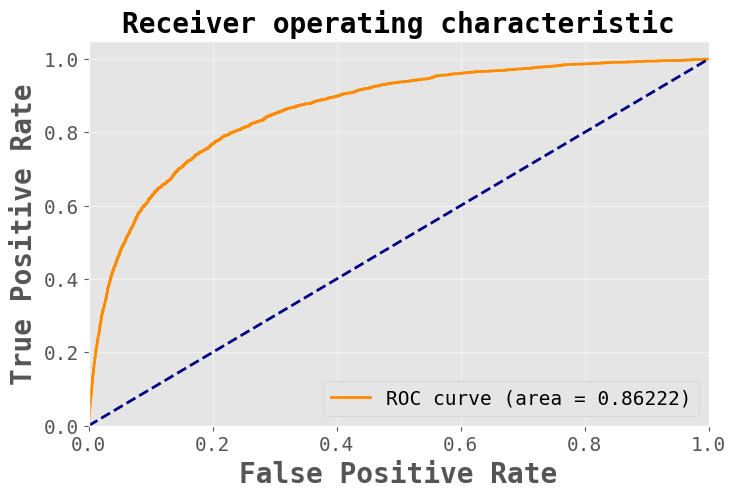

Wall time: 12min 23s


In [95]:
%%time
#Random Forest
rf_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier()
model_name = 'RandomForest'
result, best_estimator, rf_model_stats = compute_model(rf_model, rf_param_grid)
model_results[model_name] = [result, best_estimator]
plot_roc_curve(result, best_estimator)

# Compute permutation importance using Eli5
perm = PermutationImportance(best_estimator, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="643"></a>

## Gradient Boosting

**<font size=3 color=green>Model AUC Score:</font>** 0.86328

Fitting 3 folds for each of 18 candidates, totalling 54 fits
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     27995
           1       0.22      0.75      0.34      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.81      0.85     30000



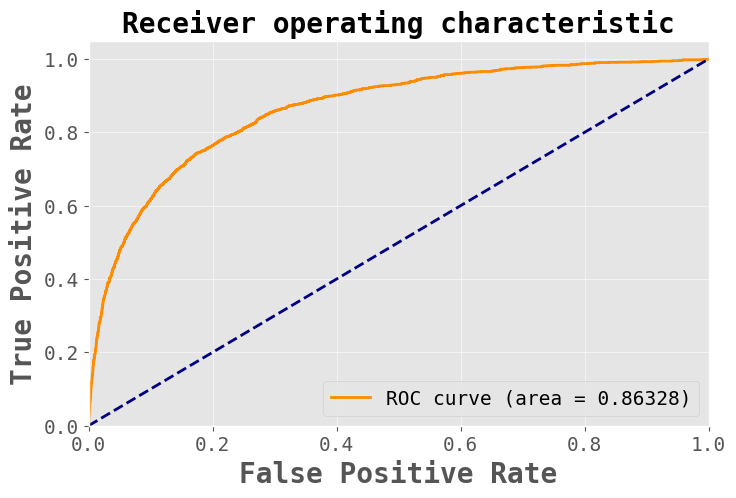

Wall time: 7min 49s


In [96]:
%%time
#GradientBoost
gb_model = GradientBoostingClassifier(random_state=42)
gb_param_grid = {
    'n_estimators': [20, 75],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.05]
} 
model_name = 'GradientBoosting'
result, best_estimator, gb_model_stats = compute_model(gb_model, gb_param_grid)
model_results[model_name] = [result, best_estimator]
plot_roc_curve(result, best_estimator)

# Compute permutation importance using Eli5
perm = PermutationImportance(best_estimator, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="644"></a>

## XGBoost

**<font size=3 color=green>Model AUC Score:</font>** 0.86612

Fitting 3 folds for each of 12 candidates, totalling 36 fits
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     27995
           1       0.23      0.75      0.35      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.79      0.62     30000
weighted avg       0.93      0.81      0.85     30000



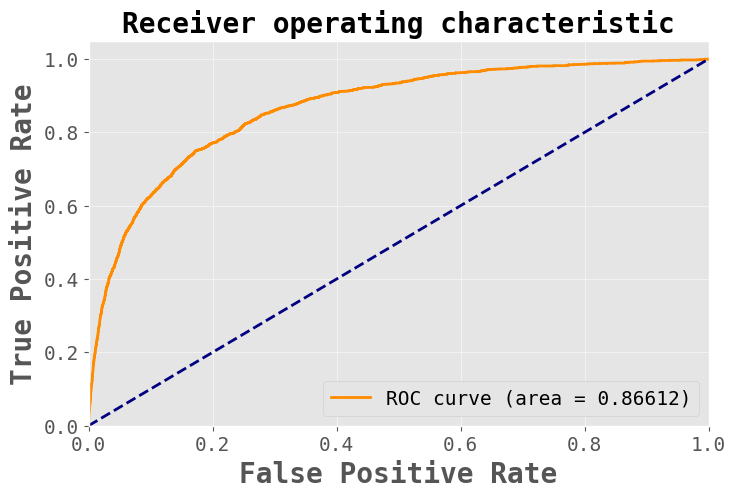

Wall time: 5min 39s


In [97]:
%%time
#XGBoost
xg_model = XGBClassifier(random_state=42)
xg_param_grid = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [150, 250],
    'max_depth': [3, 4, 5]
} 

model_name = 'XGBoost' 
result, best_estimator, xg_model_stats = compute_model(xg_model, xg_param_grid)
model_results[model_name] = [result, best_estimator]
plot_roc_curve(result, best_estimator)

# Compute permutation importance using Eli5
perm = PermutationImportance(best_estimator, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="645"></a>

## LightGBM

**<font size=3 color=green>Model AUC Score:</font>** 0.86689

Fitting 3 folds for each of 16 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       0.98      0.81      0.88     27995
           1       0.22      0.77      0.34      2005

    accuracy                           0.80     30000
   macro avg       0.60      0.79      0.61     30000
weighted avg       0.93      0.80      0.85     30000



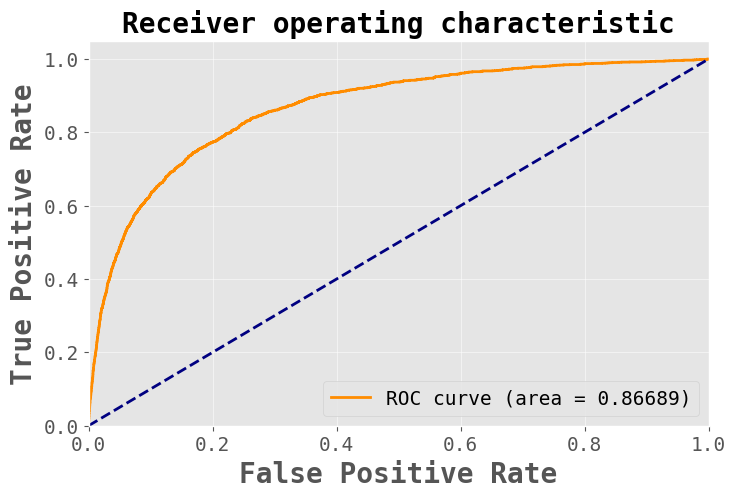

Wall time: 1min 24s


In [98]:
%%time
# LightGBM
lgb_model = LGBMClassifier(random_state=42, n_jobs=-1)
lgb_param_grid = {
    'learning_rate': [0.1, 0.05],
    'n_estimators': [150, 250],
    'max_depth': [3, 4],
    'num_leaves': [31, 63]
}

model_name = 'LightGBM'
result, best_estimator, lgb_model_stats = compute_model(lgb_model, lgb_param_grid)
model_results[model_name] = [result, best_estimator]
plot_roc_curve(result, best_estimator)

# Compute permutation importance using Eli5
perm = PermutationImportance(best_estimator, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="646"></a>

## CatBoost

**<font size=3 color=green>Model AUC Score:</font>** 0.86722

Fitting 3 folds for each of 18 candidates, totalling 54 fits
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     27995
           1       0.22      0.77      0.35      2005

    accuracy                           0.81     30000
   macro avg       0.60      0.79      0.62     30000
weighted avg       0.93      0.81      0.85     30000



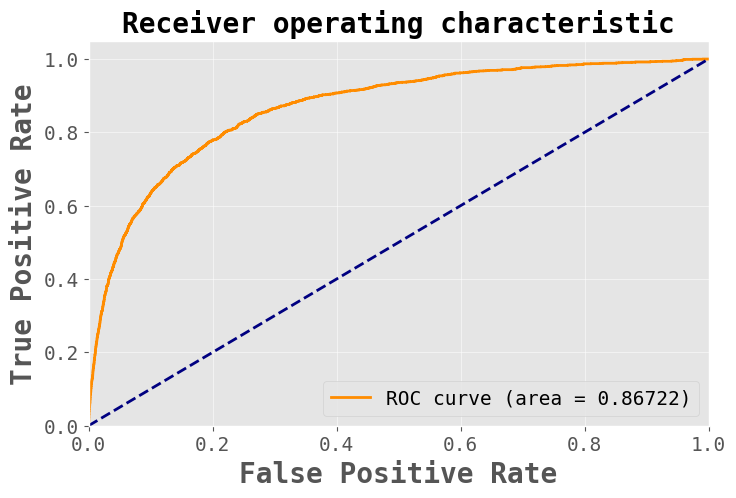

Wall time: 3min 13s


In [99]:
%%time
#CatBoost
cat_model = CatBoostClassifier(random_state=42, verbose=False, thread_count=-1)
cat_param_grid = {
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [150, 300],
    'max_depth': [3, 4, 5]
}

model_name = 'CatBoost'
result, best_estimator, cat_model_stats = compute_model(cat_model, cat_param_grid)
model_results[model_name] = [result, best_estimator]
plot_roc_curve(result, best_estimator)

# Compute permutation importance using Eli5
perm = PermutationImportance(best_estimator, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="647"></a>

## Adaboost

**<font size=3 color=green>Model AUC Score:</font>** 0.86706

Fitting 3 folds for each of 12 candidates, totalling 36 fits
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     27995
           1       0.22      0.77      0.34      2005

    accuracy                           0.80     30000
   macro avg       0.60      0.79      0.61     30000
weighted avg       0.93      0.80      0.84     30000



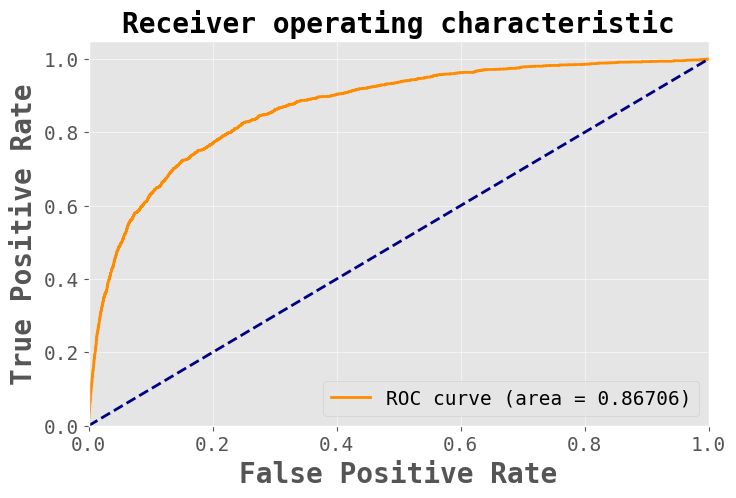

Wall time: 11min 9s


In [100]:
%%time
#Adaboost
ab_model = AdaBoostClassifier(random_state=42)
ab_param_grid = {
    'learning_rate':[0.01, 0.1, 0.05],
    'n_estimators': [100, 150],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}  
model_name = 'AdaBoost'
result, best_estimator, ab_model_stats = compute_model(ab_model, ab_param_grid)
model_results[model_name] = [result, best_estimator]
plot_roc_curve(result, best_estimator)

# Compute permutation importance using Eli5
perm = PermutationImportance(best_estimator, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="648"></a>

## Deep Learning Models

<a id="6481"></a>

## Multi-Layer Perceptron (MLP)

**<font size=3 color=green>Model AUC Score:</font>** 0.86382

#### Though MLP is a deep learning model, it is an aritificial one and can still behave like a normal ML model. 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     27995
           1       0.21      0.78      0.34      2005

    accuracy                           0.79     30000
   macro avg       0.60      0.79      0.61     30000
weighted avg       0.93      0.79      0.84     30000



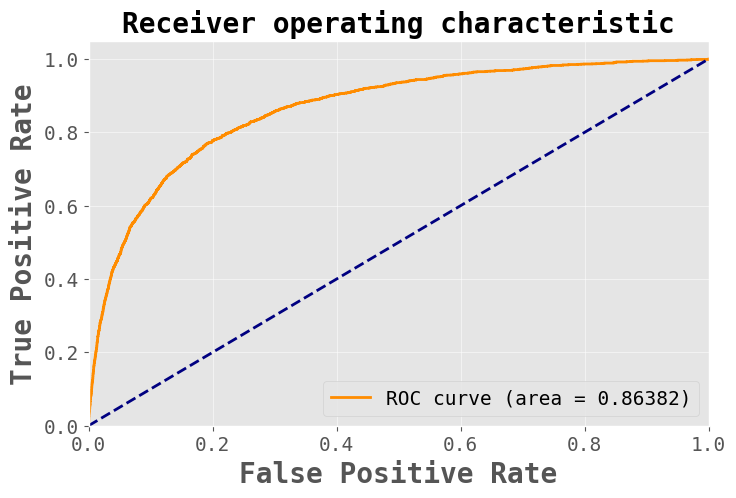

Wall time: 55.9 s


In [101]:
%%time
#MLP
mlp_model = MLPClassifier(random_state=42)
mlp_param_grid = {
    'hidden_layer_sizes': [(30,)],
    'activation': ['relu'],
    'alpha': [0.0001],
    'max_iter': [200],
}
model_name = 'MLP'
result, best_estimator, mlp_model_stats = compute_model(mlp_model, mlp_param_grid)
model_results[model_name] = [result, best_estimator]
plot_roc_curve(result, best_estimator)

# Compute permutation importance using Eli5
perm = PermutationImportance(best_estimator, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="6482"></a>

## KerasClassifier

**<font size=3 color=green>Model AUC Score:</font>** 0.86182

In [102]:
def create_model(activation, optimizer, alpha, learning_rate):
    
    np.random.seed(42)
    tf.random.set_seed(42)
    # Define the models
    model = Sequential()
    model.add(Dense(100, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(50, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tf.keras.metrics.AUC()])

    # Train the model and get the history
    with tf.device(gpu):
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=22, batch_size=750, verbose=4)

    return model, history

In [103]:
%%time
#Keras
# call the function and pass the parameters
kerasmodel, history = create_model(activation='relu', optimizer='adam', alpha=0.0001, learning_rate='constant')

Epoch 1/22
Epoch 2/22
Epoch 3/22
Epoch 4/22
Epoch 5/22
Epoch 6/22
Epoch 7/22
Epoch 8/22
Epoch 9/22
Epoch 10/22
Epoch 11/22
Epoch 12/22
Epoch 13/22
Epoch 14/22
Epoch 15/22
Epoch 16/22
Epoch 17/22
Epoch 18/22
Epoch 19/22
Epoch 20/22
Epoch 21/22
Epoch 22/22
Wall time: 28 s


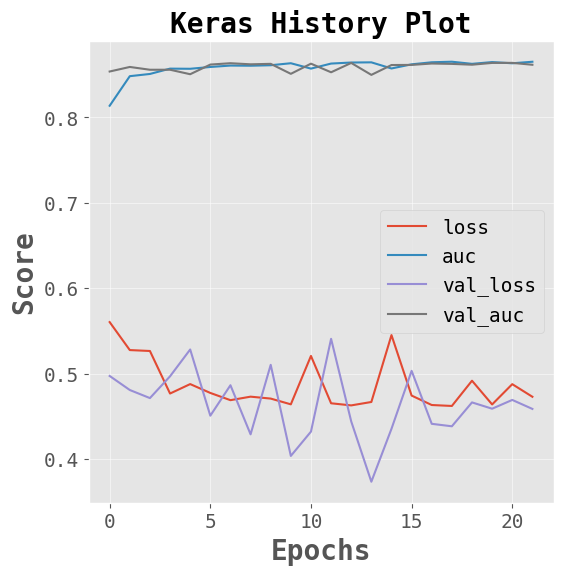

In [104]:
# plot the dataframe and set the X and Y labels
plt.plot(pd.DataFrame(history.history))
plt.xlabel('Epochs')
plt.ylabel('Score')

# set the title of the plot
plt.title('Keras History Plot')

# add a legend to the plot
plt.legend(pd.DataFrame(history.history).columns)

plt.show()

In [105]:
# Use the trained model to make predictions on the test data
y_pred = kerasmodel.predict(X_test)

# Compute the AUC_ROC score for the predicted probabilities and true labels
keras_roc_score = roc_auc_score(y_test, y_pred)

print('AUC_ROC score:', keras_roc_score)

938/938 [==============================] - 1s 1ms/step
AUC_ROC score: 0.8618223150820928


### From multiple iterations, The epochs around 20 to 25 gave the highest AUC score. 

<font size = 3>
If the auc values are significantly higher than the val_auc values, it may indicate that the model is overfitting to the training data and not generalizing well to the validation data. Conversely, if the val_auc values are significantly higher than the auc values, it may indicate that the model is underfitting and not capturing enough of the patterns in the training data.

<br/>
    
In this case, When graphed upto 50 epochs, the **value started overfitting at around 20 epochs**. 

<a id="65"></a>

## Model Performance

### Before moving on to Ensemble Methods, lets look at the performance of all the models. Please note the Keras Deep Learning model is not included in the below analysis. This is because it functions differently to the sklearn models. 

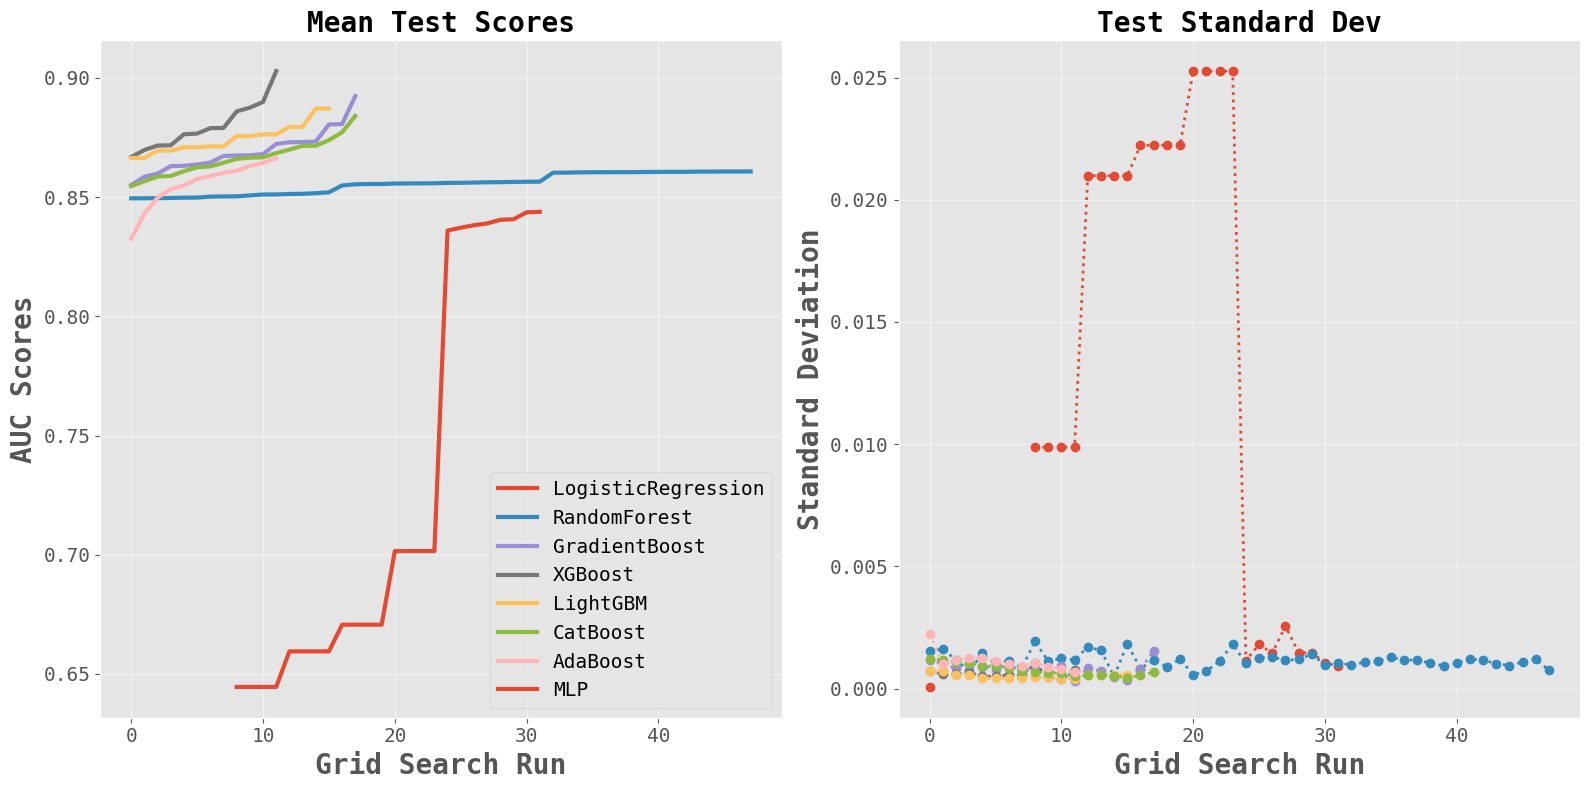

In [182]:
models = {'LogisticRegression': lr_model_stats, 'RandomForest': rf_model_stats,
          'GradientBoost': gb_model_stats,'XGBoost': xg_model_stats,
          'LightGBM': lgb_model_stats, 'CatBoost': cat_model_stats,
          'AdaBoost': ab_model_stats, 'MLP': mlp_model_stats}

plt.figure(figsize=(16,8))

for i, (model_name, model_stats) in enumerate(models.items()):
    
    # Plot mean test scores
    plt.subplot(1,2,1)
    pd.Series(model_stats['mean_test_score']).plot(kind='line', lw=3, label = model_name);
    plt.title('Mean Test Scores')
    plt.xlabel('Grid Search Run')
    plt.ylabel('AUC Scores')
    plt.legend()

    # Plot test scores standard deviation
    plt.subplot(1,2,2)
    pd.Series(model_stats['std_test_score']).plot(kind='line', lw=2, ls=':', marker='o', label = model_name);
    plt.title('Test Standard Dev')
    plt.xlabel('Grid Search Run')
    plt.ylabel('Standard Deviation')
    plt.tight_layout();

plt.show()

<font color ='green'>

### The boosting ML models seem to be outperforming all other models. CatBoost has the smoothest rise and the remaining seem to also be overfitting. Cat boost works best because of the target variable being in a category

<a id="66"></a>

# Model Ensemble Methods

### We will be trying out two of the emsemble methods in this project. We have already used quite a few Boosting ML models in our Grid Search analysis. The two Ensemble methods used now are Voting and Stacking Classifiers. 

In [107]:
# Making a new dataframe with contains the AUC Scores

results = [[model_name, results[0]['roc_auc'], results[1]] for model_name, results in model_results.items()]
results = pd.DataFrame(results, columns = ['model_name', 'roc_auc', 'best_model'])
results = results.sort_values(by='roc_auc', ascending=False) # Sorting based on roc_auc score
results.to_csv('results.csv', index=False) # Save the file
results

model_name   roc_auc  \
5             CatBoost  0.867221   
6             AdaBoost  0.867055   
4             LightGBM  0.866887   
3              XGBoost  0.866121   
7                  MLP  0.863816   
2     GradientBoosting  0.863280   
1         RandomForest  0.862225   
0  Logistic Regression  0.849474   

                                          best_model  
5  <catboost.core.CatBoostClassifier object at 0x...  
6  (DecisionTreeClassifier(max_depth=2, random_st...  
4  LGBMClassifier(max_depth=4, n_estimators=250, ...  
3  XGBClassifier(base_score=None, booster=None, c...  
7  MLPClassifier(hidden_layer_sizes=(30,), random...  
2  ([DecisionTreeRegressor(criterion='friedman_ms...  
1  (DecisionTreeClassifier(criterion='entropy', m...  
0  LogisticRegression(C=1, class_weight={0: 1, 1:...

### Creating Estimators based on top 4 models based on AUC Score. Note that Keras is not included in this due to difficulties in compatability. 

In [23]:
# results = pd.read_csv('results.csv')

In [28]:
estimators = []
for index, row in results.head(4).iterrows():
    variable_name = row['model_name'] + '_model'
    variable_value = row['best_model']
    globals()[variable_name] = variable_value
    estimators.append((row['model_name'], variable_value))

In [29]:
estimators # Chosen Estimators

[('CatBoost',
  '<catboost.core.CatBoostClassifier object at 0x00000232CBE619D0>'),
 ('AdaBoost',
  'AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),\n                   learning_rate=0.1, n_estimators=150, random_state=42)'),
 ('LightGBM',
  'LGBMClassifier(max_depth=4, n_estimators=250, random_state=42)'),
 ('XGBoost',
  'XGBClassifier(base_score=None, booster=None, callbacks=None,\n              colsample_bylevel=None, colsample_bynode=None,\n              colsample_bytree=None, early_stopping_rounds=None,\n              enable_categorical=False, eval_metric=None, feature_types=None,\n              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n              interaction_constraints=None, learning_rate=0.1, max_bin=None,\n              max_cat_threshold=None, max_cat_to_onehot=None,\n              max_delta_step=None, max_depth=5, max_leaves=None,\n              min_child_weight=None, missing=nan, monotone_constraints=None,\n              n_es

<a id="661"></a>

## Voting Classifier

**<font size=3 color=green>Model AUC Score:</font>** 0.86823

In [112]:
%%time
#VotingClassifier
vc = VotingClassifier(estimators=estimators, voting = 'soft')

# Fit Training Data
vc_scores = cross_val_score(vc, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Refit and Predict on test data
vc_model = vc.fit(X_train, y_train)
y_pred_proba = vc_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
voting_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('ROC AUC score:', voting_roc_auc)

ROC AUC score: 0.8682391004093625
Wall time: 8min 41s


In [113]:
# Compute permutation importance using Eli5
perm = PermutationImportance(vc, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<a id="662"></a>

## Stacking Classifier

**<font size=3 color=green>Model AUC Score:</font>** 0.80936

In [116]:
%%time
# StackingClassifier
sc = StackingClassifier(estimators=estimators, final_estimator=CatBoostClassifier())

#Fit Data
sc_scores = cross_val_score(sc, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Refit and Predict on test data
sc_model = sc.fit(X_train, y_train)
y_pred_proba = sc_model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
stacking_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('ROC AUC score:', stacking_roc_auc)

Learning rate set to 0.094422
0:	learn: 0.6299231	total: 28.4ms	remaining: 28.3s
1:	learn: 0.5773425	total: 50.2ms	remaining: 25s
2:	learn: 0.5371312	total: 69ms	remaining: 22.9s
3:	learn: 0.5060804	total: 87.3ms	remaining: 21.7s
4:	learn: 0.4838415	total: 105ms	remaining: 20.8s
5:	learn: 0.4621484	total: 122ms	remaining: 20.3s
6:	learn: 0.4459365	total: 144ms	remaining: 20.4s
7:	learn: 0.4340192	total: 162ms	remaining: 20.1s
8:	learn: 0.4244556	total: 180ms	remaining: 19.8s
9:	learn: 0.4170143	total: 198ms	remaining: 19.6s
10:	learn: 0.4091928	total: 220ms	remaining: 19.8s
11:	learn: 0.4028264	total: 243ms	remaining: 20s
12:	learn: 0.3989160	total: 267ms	remaining: 20.2s
13:	learn: 0.3948980	total: 290ms	remaining: 20.4s
14:	learn: 0.3912053	total: 309ms	remaining: 20.3s
15:	learn: 0.3879852	total: 331ms	remaining: 20.4s
16:	learn: 0.3864236	total: 352ms	remaining: 20.4s
17:	learn: 0.3841133	total: 372ms	remaining: 20.3s
18:	learn: 0.3820916	total: 390ms	remaining: 20.2s
19:	learn: 0.

168:	learn: 0.3477948	total: 3.95s	remaining: 19.4s
169:	learn: 0.3477119	total: 3.98s	remaining: 19.5s
170:	learn: 0.3476496	total: 4.01s	remaining: 19.4s
171:	learn: 0.3476085	total: 4.03s	remaining: 19.4s
172:	learn: 0.3475014	total: 4.06s	remaining: 19.4s
173:	learn: 0.3474371	total: 4.09s	remaining: 19.4s
174:	learn: 0.3473748	total: 4.11s	remaining: 19.4s
175:	learn: 0.3473243	total: 4.13s	remaining: 19.4s
176:	learn: 0.3472643	total: 4.16s	remaining: 19.3s
177:	learn: 0.3472181	total: 4.18s	remaining: 19.3s
178:	learn: 0.3471835	total: 4.2s	remaining: 19.3s
179:	learn: 0.3471341	total: 4.22s	remaining: 19.2s
180:	learn: 0.3470618	total: 4.25s	remaining: 19.2s
181:	learn: 0.3469726	total: 4.27s	remaining: 19.2s
182:	learn: 0.3469076	total: 4.29s	remaining: 19.2s
183:	learn: 0.3468621	total: 4.32s	remaining: 19.1s
184:	learn: 0.3467804	total: 4.33s	remaining: 19.1s
185:	learn: 0.3467308	total: 4.35s	remaining: 19.1s
186:	learn: 0.3466518	total: 4.38s	remaining: 19s
187:	learn: 0.3

327:	learn: 0.3400457	total: 8.23s	remaining: 16.9s
328:	learn: 0.3400095	total: 8.26s	remaining: 16.8s
329:	learn: 0.3399493	total: 8.28s	remaining: 16.8s
330:	learn: 0.3399211	total: 8.31s	remaining: 16.8s
331:	learn: 0.3398713	total: 8.33s	remaining: 16.8s
332:	learn: 0.3398506	total: 8.35s	remaining: 16.7s
333:	learn: 0.3397938	total: 8.38s	remaining: 16.7s
334:	learn: 0.3397603	total: 8.41s	remaining: 16.7s
335:	learn: 0.3397173	total: 8.44s	remaining: 16.7s
336:	learn: 0.3397049	total: 8.47s	remaining: 16.7s
337:	learn: 0.3396687	total: 8.49s	remaining: 16.6s
338:	learn: 0.3396513	total: 8.52s	remaining: 16.6s
339:	learn: 0.3396129	total: 8.54s	remaining: 16.6s
340:	learn: 0.3395643	total: 8.57s	remaining: 16.6s
341:	learn: 0.3395060	total: 8.6s	remaining: 16.5s
342:	learn: 0.3394836	total: 8.62s	remaining: 16.5s
343:	learn: 0.3394406	total: 8.65s	remaining: 16.5s
344:	learn: 0.3393926	total: 8.67s	remaining: 16.5s
345:	learn: 0.3393704	total: 8.71s	remaining: 16.5s
346:	learn: 0

495:	learn: 0.3342515	total: 12.4s	remaining: 12.6s
496:	learn: 0.3342492	total: 12.4s	remaining: 12.6s
497:	learn: 0.3342365	total: 12.4s	remaining: 12.5s
498:	learn: 0.3342224	total: 12.5s	remaining: 12.5s
499:	learn: 0.3342007	total: 12.5s	remaining: 12.5s
500:	learn: 0.3341727	total: 12.5s	remaining: 12.5s
501:	learn: 0.3341578	total: 12.5s	remaining: 12.4s
502:	learn: 0.3341240	total: 12.6s	remaining: 12.4s
503:	learn: 0.3340842	total: 12.6s	remaining: 12.4s
504:	learn: 0.3340689	total: 12.6s	remaining: 12.4s
505:	learn: 0.3340544	total: 12.6s	remaining: 12.3s
506:	learn: 0.3340331	total: 12.6s	remaining: 12.3s
507:	learn: 0.3340172	total: 12.7s	remaining: 12.3s
508:	learn: 0.3339631	total: 12.7s	remaining: 12.2s
509:	learn: 0.3339051	total: 12.7s	remaining: 12.2s
510:	learn: 0.3338411	total: 12.7s	remaining: 12.2s
511:	learn: 0.3338010	total: 12.7s	remaining: 12.2s
512:	learn: 0.3337386	total: 12.8s	remaining: 12.1s
513:	learn: 0.3337100	total: 12.8s	remaining: 12.1s
514:	learn: 

658:	learn: 0.3293794	total: 16.1s	remaining: 8.31s
659:	learn: 0.3293654	total: 16.1s	remaining: 8.28s
660:	learn: 0.3293278	total: 16.1s	remaining: 8.26s
661:	learn: 0.3293058	total: 16.1s	remaining: 8.23s
662:	learn: 0.3292611	total: 16.1s	remaining: 8.2s
663:	learn: 0.3292263	total: 16.2s	remaining: 8.17s
664:	learn: 0.3291853	total: 16.2s	remaining: 8.15s
665:	learn: 0.3291782	total: 16.2s	remaining: 8.12s
666:	learn: 0.3291243	total: 16.2s	remaining: 8.09s
667:	learn: 0.3290855	total: 16.2s	remaining: 8.06s
668:	learn: 0.3290751	total: 16.2s	remaining: 8.04s
669:	learn: 0.3290601	total: 16.3s	remaining: 8.01s
670:	learn: 0.3290483	total: 16.3s	remaining: 7.98s
671:	learn: 0.3290031	total: 16.3s	remaining: 7.96s
672:	learn: 0.3289716	total: 16.3s	remaining: 7.93s
673:	learn: 0.3289174	total: 16.4s	remaining: 7.91s
674:	learn: 0.3288839	total: 16.4s	remaining: 7.88s
675:	learn: 0.3288489	total: 16.4s	remaining: 7.86s
676:	learn: 0.3288346	total: 16.4s	remaining: 7.83s
677:	learn: 0

826:	learn: 0.3245039	total: 19.8s	remaining: 4.14s
827:	learn: 0.3244834	total: 19.8s	remaining: 4.11s
828:	learn: 0.3244690	total: 19.8s	remaining: 4.09s
829:	learn: 0.3244374	total: 19.9s	remaining: 4.07s
830:	learn: 0.3244091	total: 19.9s	remaining: 4.04s
831:	learn: 0.3243719	total: 19.9s	remaining: 4.02s
832:	learn: 0.3243515	total: 19.9s	remaining: 3.99s
833:	learn: 0.3243275	total: 19.9s	remaining: 3.97s
834:	learn: 0.3243129	total: 20s	remaining: 3.94s
835:	learn: 0.3242808	total: 20s	remaining: 3.92s
836:	learn: 0.3242610	total: 20s	remaining: 3.9s
837:	learn: 0.3242190	total: 20s	remaining: 3.87s
838:	learn: 0.3241728	total: 20.1s	remaining: 3.85s
839:	learn: 0.3241575	total: 20.1s	remaining: 3.82s
840:	learn: 0.3241245	total: 20.1s	remaining: 3.8s
841:	learn: 0.3241021	total: 20.1s	remaining: 3.77s
842:	learn: 0.3240604	total: 20.1s	remaining: 3.75s
843:	learn: 0.3240431	total: 20.2s	remaining: 3.73s
844:	learn: 0.3240306	total: 20.2s	remaining: 3.7s
845:	learn: 0.3239981	t

993:	learn: 0.3198372	total: 24s	remaining: 145ms
994:	learn: 0.3198268	total: 24s	remaining: 120ms
995:	learn: 0.3198137	total: 24s	remaining: 96.4ms
996:	learn: 0.3197847	total: 24s	remaining: 72.3ms
997:	learn: 0.3197553	total: 24s	remaining: 48.2ms
998:	learn: 0.3197376	total: 24.1s	remaining: 24.1ms
999:	learn: 0.3197081	total: 24.1s	remaining: 0us
Learning rate set to 0.094422
0:	learn: 0.6302797	total: 18.5ms	remaining: 18.4s
1:	learn: 0.5798941	total: 35.7ms	remaining: 17.8s
2:	learn: 0.5402545	total: 53.7ms	remaining: 17.8s
3:	learn: 0.5081486	total: 72.1ms	remaining: 17.9s
4:	learn: 0.4824647	total: 88.8ms	remaining: 17.7s
5:	learn: 0.4630916	total: 106ms	remaining: 17.6s
6:	learn: 0.4452197	total: 123ms	remaining: 17.5s
7:	learn: 0.4312434	total: 141ms	remaining: 17.4s
8:	learn: 0.4225131	total: 159ms	remaining: 17.5s
9:	learn: 0.4150599	total: 179ms	remaining: 17.8s
10:	learn: 0.4083086	total: 201ms	remaining: 18.1s
11:	learn: 0.4016757	total: 224ms	remaining: 18.5s
12:	lea

163:	learn: 0.3448953	total: 3.69s	remaining: 18.8s
164:	learn: 0.3448551	total: 3.72s	remaining: 18.8s
165:	learn: 0.3448107	total: 3.74s	remaining: 18.8s
166:	learn: 0.3447557	total: 3.77s	remaining: 18.8s
167:	learn: 0.3446969	total: 3.79s	remaining: 18.8s
168:	learn: 0.3446461	total: 3.82s	remaining: 18.8s
169:	learn: 0.3445722	total: 3.85s	remaining: 18.8s
170:	learn: 0.3445253	total: 3.88s	remaining: 18.8s
171:	learn: 0.3444689	total: 3.92s	remaining: 18.9s
172:	learn: 0.3443755	total: 3.95s	remaining: 18.9s
173:	learn: 0.3442791	total: 3.97s	remaining: 18.9s
174:	learn: 0.3441697	total: 4s	remaining: 18.8s
175:	learn: 0.3441094	total: 4.02s	remaining: 18.8s
176:	learn: 0.3440041	total: 4.05s	remaining: 18.8s
177:	learn: 0.3439363	total: 4.08s	remaining: 18.8s
178:	learn: 0.3439050	total: 4.11s	remaining: 18.8s
179:	learn: 0.3438323	total: 4.13s	remaining: 18.8s
180:	learn: 0.3437624	total: 4.16s	remaining: 18.8s
181:	learn: 0.3436704	total: 4.19s	remaining: 18.8s
182:	learn: 0.3

327:	learn: 0.3368067	total: 8.26s	remaining: 16.9s
328:	learn: 0.3367448	total: 8.28s	remaining: 16.9s
329:	learn: 0.3366905	total: 8.31s	remaining: 16.9s
330:	learn: 0.3366556	total: 8.34s	remaining: 16.9s
331:	learn: 0.3366208	total: 8.36s	remaining: 16.8s
332:	learn: 0.3365864	total: 8.39s	remaining: 16.8s
333:	learn: 0.3365521	total: 8.42s	remaining: 16.8s
334:	learn: 0.3365214	total: 8.45s	remaining: 16.8s
335:	learn: 0.3364315	total: 8.48s	remaining: 16.8s
336:	learn: 0.3363779	total: 8.51s	remaining: 16.7s
337:	learn: 0.3363544	total: 8.54s	remaining: 16.7s
338:	learn: 0.3363199	total: 8.58s	remaining: 16.7s
339:	learn: 0.3362360	total: 8.61s	remaining: 16.7s
340:	learn: 0.3362205	total: 8.65s	remaining: 16.7s
341:	learn: 0.3361816	total: 8.69s	remaining: 16.7s
342:	learn: 0.3361339	total: 8.72s	remaining: 16.7s
343:	learn: 0.3361023	total: 8.75s	remaining: 16.7s
344:	learn: 0.3360565	total: 8.79s	remaining: 16.7s
345:	learn: 0.3360318	total: 8.82s	remaining: 16.7s
346:	learn: 

486:	learn: 0.3309456	total: 12.8s	remaining: 13.5s
487:	learn: 0.3309361	total: 12.9s	remaining: 13.5s
488:	learn: 0.3308886	total: 12.9s	remaining: 13.5s
489:	learn: 0.3308459	total: 12.9s	remaining: 13.5s
490:	learn: 0.3308403	total: 13s	remaining: 13.4s
491:	learn: 0.3307841	total: 13s	remaining: 13.4s
492:	learn: 0.3307476	total: 13s	remaining: 13.4s
493:	learn: 0.3306943	total: 13s	remaining: 13.3s
494:	learn: 0.3306670	total: 13.1s	remaining: 13.3s
495:	learn: 0.3306347	total: 13.1s	remaining: 13.3s
496:	learn: 0.3306113	total: 13.1s	remaining: 13.3s
497:	learn: 0.3305480	total: 13.1s	remaining: 13.2s
498:	learn: 0.3305188	total: 13.1s	remaining: 13.2s
499:	learn: 0.3304884	total: 13.2s	remaining: 13.2s
500:	learn: 0.3304444	total: 13.2s	remaining: 13.1s
501:	learn: 0.3304150	total: 13.2s	remaining: 13.1s
502:	learn: 0.3303793	total: 13.2s	remaining: 13.1s
503:	learn: 0.3303486	total: 13.3s	remaining: 13.1s
504:	learn: 0.3303049	total: 13.3s	remaining: 13s
505:	learn: 0.3302786	

648:	learn: 0.3258786	total: 16.5s	remaining: 8.94s
649:	learn: 0.3258639	total: 16.5s	remaining: 8.91s
650:	learn: 0.3258355	total: 16.6s	remaining: 8.88s
651:	learn: 0.3258203	total: 16.6s	remaining: 8.86s
652:	learn: 0.3257794	total: 16.6s	remaining: 8.84s
653:	learn: 0.3257611	total: 16.7s	remaining: 8.81s
654:	learn: 0.3257446	total: 16.7s	remaining: 8.79s
655:	learn: 0.3257062	total: 16.7s	remaining: 8.76s
656:	learn: 0.3256788	total: 16.7s	remaining: 8.74s
657:	learn: 0.3256357	total: 16.8s	remaining: 8.71s
658:	learn: 0.3256140	total: 16.8s	remaining: 8.69s
659:	learn: 0.3255694	total: 16.8s	remaining: 8.67s
660:	learn: 0.3255314	total: 16.9s	remaining: 8.65s
661:	learn: 0.3254944	total: 16.9s	remaining: 8.63s
662:	learn: 0.3254818	total: 16.9s	remaining: 8.6s
663:	learn: 0.3254477	total: 16.9s	remaining: 8.57s
664:	learn: 0.3254400	total: 17s	remaining: 8.55s
665:	learn: 0.3254050	total: 17s	remaining: 8.52s
666:	learn: 0.3253731	total: 17s	remaining: 8.5s
667:	learn: 0.325351

814:	learn: 0.3213098	total: 20.9s	remaining: 4.75s
815:	learn: 0.3212869	total: 20.9s	remaining: 4.72s
816:	learn: 0.3212650	total: 20.9s	remaining: 4.69s
817:	learn: 0.3212542	total: 21s	remaining: 4.67s
818:	learn: 0.3212450	total: 21s	remaining: 4.64s
819:	learn: 0.3212379	total: 21s	remaining: 4.61s
820:	learn: 0.3212218	total: 21s	remaining: 4.58s
821:	learn: 0.3212088	total: 21s	remaining: 4.56s
822:	learn: 0.3211686	total: 21.1s	remaining: 4.53s
823:	learn: 0.3211345	total: 21.1s	remaining: 4.5s
824:	learn: 0.3211217	total: 21.1s	remaining: 4.48s
825:	learn: 0.3211035	total: 21.1s	remaining: 4.45s
826:	learn: 0.3210953	total: 21.1s	remaining: 4.42s
827:	learn: 0.3210701	total: 21.2s	remaining: 4.4s
828:	learn: 0.3210461	total: 21.2s	remaining: 4.37s
829:	learn: 0.3210198	total: 21.2s	remaining: 4.34s
830:	learn: 0.3209753	total: 21.2s	remaining: 4.32s
831:	learn: 0.3209611	total: 21.2s	remaining: 4.29s
832:	learn: 0.3209517	total: 21.3s	remaining: 4.26s
833:	learn: 0.3209355	to

978:	learn: 0.3171856	total: 24.8s	remaining: 532ms
979:	learn: 0.3171439	total: 24.8s	remaining: 507ms
980:	learn: 0.3171165	total: 24.8s	remaining: 481ms
981:	learn: 0.3170850	total: 24.9s	remaining: 456ms
982:	learn: 0.3170618	total: 24.9s	remaining: 431ms
983:	learn: 0.3170517	total: 24.9s	remaining: 405ms
984:	learn: 0.3170462	total: 24.9s	remaining: 380ms
985:	learn: 0.3170272	total: 25s	remaining: 354ms
986:	learn: 0.3169974	total: 25s	remaining: 329ms
987:	learn: 0.3169869	total: 25s	remaining: 304ms
988:	learn: 0.3169389	total: 25s	remaining: 278ms
989:	learn: 0.3169029	total: 25.1s	remaining: 253ms
990:	learn: 0.3168650	total: 25.1s	remaining: 228ms
991:	learn: 0.3168454	total: 25.1s	remaining: 202ms
992:	learn: 0.3168177	total: 25.1s	remaining: 177ms
993:	learn: 0.3168065	total: 25.1s	remaining: 152ms
994:	learn: 0.3167590	total: 25.2s	remaining: 127ms
995:	learn: 0.3167279	total: 25.2s	remaining: 101ms
996:	learn: 0.3166994	total: 25.2s	remaining: 75.9ms
997:	learn: 0.31667

139:	learn: 0.3458201	total: 7.04s	remaining: 43.3s
140:	learn: 0.3457433	total: 7.11s	remaining: 43.3s
141:	learn: 0.3456687	total: 7.16s	remaining: 43.2s
142:	learn: 0.3455909	total: 7.2s	remaining: 43.1s
143:	learn: 0.3455133	total: 7.25s	remaining: 43.1s
144:	learn: 0.3454503	total: 7.3s	remaining: 43.1s
145:	learn: 0.3454042	total: 7.35s	remaining: 43s
146:	learn: 0.3453134	total: 7.41s	remaining: 43s
147:	learn: 0.3452313	total: 7.46s	remaining: 42.9s
148:	learn: 0.3451388	total: 7.51s	remaining: 42.9s
149:	learn: 0.3450641	total: 7.56s	remaining: 42.9s
150:	learn: 0.3449890	total: 7.61s	remaining: 42.8s
151:	learn: 0.3449210	total: 7.66s	remaining: 42.7s
152:	learn: 0.3448413	total: 7.71s	remaining: 42.7s
153:	learn: 0.3447481	total: 7.75s	remaining: 42.6s
154:	learn: 0.3446972	total: 7.79s	remaining: 42.5s
155:	learn: 0.3445874	total: 7.82s	remaining: 42.3s
156:	learn: 0.3444977	total: 7.86s	remaining: 42.2s
157:	learn: 0.3444211	total: 7.9s	remaining: 42.1s
158:	learn: 0.34433

300:	learn: 0.3367256	total: 15.2s	remaining: 35.3s
301:	learn: 0.3366868	total: 15.3s	remaining: 35.3s
302:	learn: 0.3366474	total: 15.3s	remaining: 35.2s
303:	learn: 0.3366260	total: 15.3s	remaining: 35.1s
304:	learn: 0.3365890	total: 15.4s	remaining: 35s
305:	learn: 0.3365298	total: 15.4s	remaining: 34.9s
306:	learn: 0.3364800	total: 15.4s	remaining: 34.8s
307:	learn: 0.3364307	total: 15.5s	remaining: 34.8s
308:	learn: 0.3363890	total: 15.5s	remaining: 34.7s
309:	learn: 0.3363646	total: 15.5s	remaining: 34.6s
310:	learn: 0.3363091	total: 15.6s	remaining: 34.5s
311:	learn: 0.3362566	total: 15.6s	remaining: 34.4s
312:	learn: 0.3362128	total: 15.6s	remaining: 34.3s
313:	learn: 0.3361708	total: 15.7s	remaining: 34.2s
314:	learn: 0.3361312	total: 15.7s	remaining: 34.2s
315:	learn: 0.3361076	total: 15.8s	remaining: 34.2s
316:	learn: 0.3360921	total: 15.9s	remaining: 34.2s
317:	learn: 0.3360800	total: 15.9s	remaining: 34.2s
318:	learn: 0.3360312	total: 16s	remaining: 34.2s
319:	learn: 0.33

462:	learn: 0.3307147	total: 21.5s	remaining: 24.9s
463:	learn: 0.3306634	total: 21.5s	remaining: 24.8s
464:	learn: 0.3306343	total: 21.5s	remaining: 24.8s
465:	learn: 0.3306076	total: 21.6s	remaining: 24.7s
466:	learn: 0.3305896	total: 21.6s	remaining: 24.7s
467:	learn: 0.3305513	total: 21.6s	remaining: 24.6s
468:	learn: 0.3305282	total: 21.7s	remaining: 24.5s
469:	learn: 0.3304966	total: 21.7s	remaining: 24.5s
470:	learn: 0.3304651	total: 21.7s	remaining: 24.4s
471:	learn: 0.3304338	total: 21.8s	remaining: 24.3s
472:	learn: 0.3304027	total: 21.8s	remaining: 24.3s
473:	learn: 0.3303903	total: 21.8s	remaining: 24.2s
474:	learn: 0.3303753	total: 21.9s	remaining: 24.2s
475:	learn: 0.3303206	total: 21.9s	remaining: 24.1s
476:	learn: 0.3302901	total: 21.9s	remaining: 24s
477:	learn: 0.3302794	total: 22s	remaining: 24s
478:	learn: 0.3302506	total: 22s	remaining: 23.9s
479:	learn: 0.3302371	total: 22s	remaining: 23.9s
480:	learn: 0.3301845	total: 22.1s	remaining: 23.8s
481:	learn: 0.3301632	

624:	learn: 0.3258463	total: 26.3s	remaining: 15.8s
625:	learn: 0.3258133	total: 26.3s	remaining: 15.7s
626:	learn: 0.3258050	total: 26.4s	remaining: 15.7s
627:	learn: 0.3257856	total: 26.4s	remaining: 15.6s
628:	learn: 0.3257760	total: 26.4s	remaining: 15.6s
629:	learn: 0.3257186	total: 26.4s	remaining: 15.5s
630:	learn: 0.3256778	total: 26.4s	remaining: 15.5s
631:	learn: 0.3256441	total: 26.5s	remaining: 15.4s
632:	learn: 0.3256035	total: 26.5s	remaining: 15.4s
633:	learn: 0.3255455	total: 26.5s	remaining: 15.3s
634:	learn: 0.3255095	total: 26.5s	remaining: 15.2s
635:	learn: 0.3254847	total: 26.6s	remaining: 15.2s
636:	learn: 0.3254504	total: 26.6s	remaining: 15.2s
637:	learn: 0.3253879	total: 26.6s	remaining: 15.1s
638:	learn: 0.3253420	total: 26.6s	remaining: 15.1s
639:	learn: 0.3253252	total: 26.7s	remaining: 15s
640:	learn: 0.3253133	total: 26.7s	remaining: 15s
641:	learn: 0.3253051	total: 26.7s	remaining: 14.9s
642:	learn: 0.3252901	total: 26.7s	remaining: 14.8s
643:	learn: 0.32

786:	learn: 0.3209804	total: 30.3s	remaining: 8.2s
787:	learn: 0.3209588	total: 30.3s	remaining: 8.16s
788:	learn: 0.3209452	total: 30.3s	remaining: 8.11s
789:	learn: 0.3209090	total: 30.4s	remaining: 8.07s
790:	learn: 0.3208864	total: 30.4s	remaining: 8.03s
791:	learn: 0.3208705	total: 30.4s	remaining: 7.98s
792:	learn: 0.3208357	total: 30.4s	remaining: 7.94s
793:	learn: 0.3207988	total: 30.4s	remaining: 7.9s
794:	learn: 0.3207400	total: 30.5s	remaining: 7.86s
795:	learn: 0.3206905	total: 30.5s	remaining: 7.81s
796:	learn: 0.3206526	total: 30.5s	remaining: 7.77s
797:	learn: 0.3206470	total: 30.5s	remaining: 7.73s
798:	learn: 0.3206319	total: 30.6s	remaining: 7.69s
799:	learn: 0.3206030	total: 30.6s	remaining: 7.65s
800:	learn: 0.3205614	total: 30.6s	remaining: 7.6s
801:	learn: 0.3205317	total: 30.6s	remaining: 7.56s
802:	learn: 0.3204973	total: 30.7s	remaining: 7.52s
803:	learn: 0.3204602	total: 30.7s	remaining: 7.48s
804:	learn: 0.3204263	total: 30.7s	remaining: 7.44s
805:	learn: 0.3

949:	learn: 0.3166141	total: 34.4s	remaining: 1.81s
950:	learn: 0.3165688	total: 34.5s	remaining: 1.78s
951:	learn: 0.3165386	total: 34.5s	remaining: 1.74s
952:	learn: 0.3165058	total: 34.5s	remaining: 1.7s
953:	learn: 0.3164932	total: 34.5s	remaining: 1.67s
954:	learn: 0.3164625	total: 34.6s	remaining: 1.63s
955:	learn: 0.3164427	total: 34.6s	remaining: 1.59s
956:	learn: 0.3164162	total: 34.6s	remaining: 1.55s
957:	learn: 0.3163823	total: 34.6s	remaining: 1.52s
958:	learn: 0.3163730	total: 34.7s	remaining: 1.48s
959:	learn: 0.3163655	total: 34.7s	remaining: 1.45s
960:	learn: 0.3163400	total: 34.7s	remaining: 1.41s
961:	learn: 0.3163233	total: 34.7s	remaining: 1.37s
962:	learn: 0.3163113	total: 34.8s	remaining: 1.34s
963:	learn: 0.3162750	total: 34.8s	remaining: 1.3s
964:	learn: 0.3162676	total: 34.8s	remaining: 1.26s
965:	learn: 0.3162482	total: 34.8s	remaining: 1.23s
966:	learn: 0.3162322	total: 34.9s	remaining: 1.19s
967:	learn: 0.3161927	total: 34.9s	remaining: 1.15s
968:	learn: 0.

115:	learn: 0.3506049	total: 3.11s	remaining: 23.7s
116:	learn: 0.3505320	total: 3.18s	remaining: 24s
117:	learn: 0.3504498	total: 3.23s	remaining: 24.1s
118:	learn: 0.3503821	total: 3.25s	remaining: 24s
119:	learn: 0.3502862	total: 3.27s	remaining: 24s
120:	learn: 0.3501941	total: 3.29s	remaining: 23.9s
121:	learn: 0.3501000	total: 3.31s	remaining: 23.8s
122:	learn: 0.3500127	total: 3.34s	remaining: 23.8s
123:	learn: 0.3499403	total: 3.36s	remaining: 23.7s
124:	learn: 0.3498523	total: 3.38s	remaining: 23.7s
125:	learn: 0.3497404	total: 3.4s	remaining: 23.6s
126:	learn: 0.3496912	total: 3.42s	remaining: 23.5s
127:	learn: 0.3496151	total: 3.44s	remaining: 23.5s
128:	learn: 0.3495080	total: 3.47s	remaining: 23.4s
129:	learn: 0.3494232	total: 3.49s	remaining: 23.3s
130:	learn: 0.3493689	total: 3.51s	remaining: 23.3s
131:	learn: 0.3492908	total: 3.53s	remaining: 23.2s
132:	learn: 0.3492309	total: 3.55s	remaining: 23.1s
133:	learn: 0.3491565	total: 3.57s	remaining: 23.1s
134:	learn: 0.34907

280:	learn: 0.3409541	total: 6.88s	remaining: 17.6s
281:	learn: 0.3409255	total: 6.9s	remaining: 17.6s
282:	learn: 0.3408801	total: 6.92s	remaining: 17.5s
283:	learn: 0.3408533	total: 6.95s	remaining: 17.5s
284:	learn: 0.3407955	total: 6.97s	remaining: 17.5s
285:	learn: 0.3407533	total: 7s	remaining: 17.5s
286:	learn: 0.3406841	total: 7.03s	remaining: 17.5s
287:	learn: 0.3406519	total: 7.05s	remaining: 17.4s
288:	learn: 0.3406174	total: 7.08s	remaining: 17.4s
289:	learn: 0.3405930	total: 7.1s	remaining: 17.4s
290:	learn: 0.3405734	total: 7.12s	remaining: 17.4s
291:	learn: 0.3405036	total: 7.14s	remaining: 17.3s
292:	learn: 0.3404532	total: 7.16s	remaining: 17.3s
293:	learn: 0.3404327	total: 7.18s	remaining: 17.2s
294:	learn: 0.3403644	total: 7.21s	remaining: 17.2s
295:	learn: 0.3403088	total: 7.22s	remaining: 17.2s
296:	learn: 0.3402581	total: 7.25s	remaining: 17.2s
297:	learn: 0.3401985	total: 7.27s	remaining: 17.1s
298:	learn: 0.3401215	total: 7.29s	remaining: 17.1s
299:	learn: 0.340

444:	learn: 0.3346850	total: 10.6s	remaining: 13.2s
445:	learn: 0.3346487	total: 10.6s	remaining: 13.2s
446:	learn: 0.3346138	total: 10.6s	remaining: 13.1s
447:	learn: 0.3345642	total: 10.6s	remaining: 13.1s
448:	learn: 0.3345440	total: 10.7s	remaining: 13.1s
449:	learn: 0.3345006	total: 10.7s	remaining: 13s
450:	learn: 0.3344837	total: 10.7s	remaining: 13s
451:	learn: 0.3344663	total: 10.7s	remaining: 13s
452:	learn: 0.3344403	total: 10.7s	remaining: 13s
453:	learn: 0.3343980	total: 10.8s	remaining: 12.9s
454:	learn: 0.3343596	total: 10.8s	remaining: 12.9s
455:	learn: 0.3343225	total: 10.8s	remaining: 12.9s
456:	learn: 0.3342667	total: 10.8s	remaining: 12.9s
457:	learn: 0.3342521	total: 10.8s	remaining: 12.8s
458:	learn: 0.3342369	total: 10.9s	remaining: 12.8s
459:	learn: 0.3342279	total: 10.9s	remaining: 12.8s
460:	learn: 0.3341952	total: 10.9s	remaining: 12.7s
461:	learn: 0.3341569	total: 10.9s	remaining: 12.7s
462:	learn: 0.3341269	total: 11s	remaining: 12.7s
463:	learn: 0.3341017	

611:	learn: 0.3293098	total: 14.3s	remaining: 9.09s
612:	learn: 0.3292695	total: 14.4s	remaining: 9.07s
613:	learn: 0.3292227	total: 14.4s	remaining: 9.04s
614:	learn: 0.3292091	total: 14.4s	remaining: 9.02s
615:	learn: 0.3291951	total: 14.4s	remaining: 9s
616:	learn: 0.3291722	total: 14.5s	remaining: 8.98s
617:	learn: 0.3291489	total: 14.5s	remaining: 8.96s
618:	learn: 0.3291076	total: 14.5s	remaining: 8.94s
619:	learn: 0.3290771	total: 14.5s	remaining: 8.91s
620:	learn: 0.3290549	total: 14.6s	remaining: 8.89s
621:	learn: 0.3290182	total: 14.6s	remaining: 8.87s
622:	learn: 0.3289901	total: 14.6s	remaining: 8.85s
623:	learn: 0.3289737	total: 14.6s	remaining: 8.82s
624:	learn: 0.3289416	total: 14.7s	remaining: 8.8s
625:	learn: 0.3288763	total: 14.7s	remaining: 8.78s
626:	learn: 0.3288631	total: 14.7s	remaining: 8.76s
627:	learn: 0.3288533	total: 14.8s	remaining: 8.74s
628:	learn: 0.3288385	total: 14.8s	remaining: 8.72s
629:	learn: 0.3288243	total: 14.8s	remaining: 8.7s
630:	learn: 0.328

770:	learn: 0.3247239	total: 18.5s	remaining: 5.49s
771:	learn: 0.3246872	total: 18.5s	remaining: 5.46s
772:	learn: 0.3246708	total: 18.5s	remaining: 5.44s
773:	learn: 0.3245985	total: 18.5s	remaining: 5.42s
774:	learn: 0.3245648	total: 18.6s	remaining: 5.39s
775:	learn: 0.3245252	total: 18.6s	remaining: 5.37s
776:	learn: 0.3244991	total: 18.6s	remaining: 5.34s
777:	learn: 0.3244794	total: 18.6s	remaining: 5.32s
778:	learn: 0.3244212	total: 18.7s	remaining: 5.29s
779:	learn: 0.3244009	total: 18.7s	remaining: 5.27s
780:	learn: 0.3243770	total: 18.7s	remaining: 5.25s
781:	learn: 0.3243402	total: 18.7s	remaining: 5.23s
782:	learn: 0.3242960	total: 18.8s	remaining: 5.2s
783:	learn: 0.3242810	total: 18.8s	remaining: 5.18s
784:	learn: 0.3242471	total: 18.8s	remaining: 5.16s
785:	learn: 0.3242191	total: 18.9s	remaining: 5.13s
786:	learn: 0.3242095	total: 18.9s	remaining: 5.11s
787:	learn: 0.3241788	total: 18.9s	remaining: 5.09s
788:	learn: 0.3241650	total: 18.9s	remaining: 5.07s
789:	learn: 0

934:	learn: 0.3198057	total: 22.5s	remaining: 1.56s
935:	learn: 0.3197931	total: 22.5s	remaining: 1.54s
936:	learn: 0.3197650	total: 22.5s	remaining: 1.51s
937:	learn: 0.3197474	total: 22.5s	remaining: 1.49s
938:	learn: 0.3197349	total: 22.5s	remaining: 1.46s
939:	learn: 0.3197038	total: 22.6s	remaining: 1.44s
940:	learn: 0.3196891	total: 22.6s	remaining: 1.42s
941:	learn: 0.3196744	total: 22.6s	remaining: 1.39s
942:	learn: 0.3196364	total: 22.6s	remaining: 1.37s
943:	learn: 0.3196047	total: 22.6s	remaining: 1.34s
944:	learn: 0.3195824	total: 22.7s	remaining: 1.32s
945:	learn: 0.3195518	total: 22.7s	remaining: 1.29s
946:	learn: 0.3195393	total: 22.7s	remaining: 1.27s
947:	learn: 0.3195096	total: 22.7s	remaining: 1.25s
948:	learn: 0.3194815	total: 22.7s	remaining: 1.22s
949:	learn: 0.3194679	total: 22.8s	remaining: 1.2s
950:	learn: 0.3194227	total: 22.8s	remaining: 1.17s
951:	learn: 0.3193999	total: 22.8s	remaining: 1.15s
952:	learn: 0.3193857	total: 22.8s	remaining: 1.13s
953:	learn: 0

100:	learn: 0.3527732	total: 2.65s	remaining: 23.6s
101:	learn: 0.3526734	total: 2.68s	remaining: 23.6s
102:	learn: 0.3525702	total: 2.71s	remaining: 23.6s
103:	learn: 0.3524591	total: 2.73s	remaining: 23.6s
104:	learn: 0.3523621	total: 2.76s	remaining: 23.5s
105:	learn: 0.3522738	total: 2.78s	remaining: 23.5s
106:	learn: 0.3521255	total: 2.8s	remaining: 23.4s
107:	learn: 0.3520302	total: 2.82s	remaining: 23.3s
108:	learn: 0.3519649	total: 2.84s	remaining: 23.2s
109:	learn: 0.3518561	total: 2.87s	remaining: 23.2s
110:	learn: 0.3517593	total: 2.9s	remaining: 23.2s
111:	learn: 0.3516612	total: 2.92s	remaining: 23.1s
112:	learn: 0.3515851	total: 2.94s	remaining: 23.1s
113:	learn: 0.3515121	total: 2.96s	remaining: 23s
114:	learn: 0.3514264	total: 2.98s	remaining: 22.9s
115:	learn: 0.3513103	total: 3s	remaining: 22.9s
116:	learn: 0.3512010	total: 3.03s	remaining: 22.9s
117:	learn: 0.3511171	total: 3.07s	remaining: 22.9s
118:	learn: 0.3510015	total: 3.11s	remaining: 23s
119:	learn: 0.3508992

266:	learn: 0.3419275	total: 6.83s	remaining: 18.8s
267:	learn: 0.3418491	total: 6.86s	remaining: 18.7s
268:	learn: 0.3418078	total: 6.87s	remaining: 18.7s
269:	learn: 0.3417835	total: 6.89s	remaining: 18.6s
270:	learn: 0.3417571	total: 6.91s	remaining: 18.6s
271:	learn: 0.3416918	total: 6.93s	remaining: 18.5s
272:	learn: 0.3416605	total: 6.95s	remaining: 18.5s
273:	learn: 0.3416230	total: 6.97s	remaining: 18.5s
274:	learn: 0.3415847	total: 6.99s	remaining: 18.4s
275:	learn: 0.3415316	total: 7.01s	remaining: 18.4s
276:	learn: 0.3414719	total: 7.03s	remaining: 18.4s
277:	learn: 0.3414155	total: 7.06s	remaining: 18.3s
278:	learn: 0.3413921	total: 7.08s	remaining: 18.3s
279:	learn: 0.3413346	total: 7.1s	remaining: 18.3s
280:	learn: 0.3413046	total: 7.12s	remaining: 18.2s
281:	learn: 0.3412830	total: 7.14s	remaining: 18.2s
282:	learn: 0.3412595	total: 7.17s	remaining: 18.2s
283:	learn: 0.3412381	total: 7.19s	remaining: 18.1s
284:	learn: 0.3411938	total: 7.21s	remaining: 18.1s
285:	learn: 0

434:	learn: 0.3353806	total: 10.6s	remaining: 13.8s
435:	learn: 0.3353360	total: 10.6s	remaining: 13.7s
436:	learn: 0.3352845	total: 10.6s	remaining: 13.7s
437:	learn: 0.3352462	total: 10.7s	remaining: 13.7s
438:	learn: 0.3352133	total: 10.7s	remaining: 13.6s
439:	learn: 0.3351751	total: 10.7s	remaining: 13.6s
440:	learn: 0.3351609	total: 10.7s	remaining: 13.6s
441:	learn: 0.3351426	total: 10.7s	remaining: 13.5s
442:	learn: 0.3350840	total: 10.7s	remaining: 13.5s
443:	learn: 0.3350545	total: 10.8s	remaining: 13.5s
444:	learn: 0.3350301	total: 10.8s	remaining: 13.5s
445:	learn: 0.3350145	total: 10.8s	remaining: 13.4s
446:	learn: 0.3349969	total: 10.8s	remaining: 13.4s
447:	learn: 0.3349706	total: 10.9s	remaining: 13.4s
448:	learn: 0.3349443	total: 10.9s	remaining: 13.4s
449:	learn: 0.3348850	total: 10.9s	remaining: 13.3s
450:	learn: 0.3348727	total: 10.9s	remaining: 13.3s
451:	learn: 0.3348326	total: 11s	remaining: 13.3s
452:	learn: 0.3348110	total: 11s	remaining: 13.3s
453:	learn: 0.33

595:	learn: 0.3303783	total: 14.5s	remaining: 9.81s
596:	learn: 0.3303386	total: 14.5s	remaining: 9.79s
597:	learn: 0.3303123	total: 14.5s	remaining: 9.77s
598:	learn: 0.3302892	total: 14.6s	remaining: 9.75s
599:	learn: 0.3302475	total: 14.6s	remaining: 9.72s
600:	learn: 0.3301908	total: 14.6s	remaining: 9.7s
601:	learn: 0.3301665	total: 14.6s	remaining: 9.68s
602:	learn: 0.3301572	total: 14.7s	remaining: 9.65s
603:	learn: 0.3301447	total: 14.7s	remaining: 9.63s
604:	learn: 0.3301130	total: 14.7s	remaining: 9.61s
605:	learn: 0.3300959	total: 14.7s	remaining: 9.59s
606:	learn: 0.3300683	total: 14.8s	remaining: 9.57s
607:	learn: 0.3300189	total: 14.8s	remaining: 9.55s
608:	learn: 0.3299755	total: 14.9s	remaining: 9.54s
609:	learn: 0.3299500	total: 14.9s	remaining: 9.52s
610:	learn: 0.3299059	total: 14.9s	remaining: 9.49s
611:	learn: 0.3298912	total: 14.9s	remaining: 9.48s
612:	learn: 0.3298805	total: 15s	remaining: 9.45s
613:	learn: 0.3298477	total: 15s	remaining: 9.43s
614:	learn: 0.329

762:	learn: 0.3260482	total: 19.1s	remaining: 5.94s
763:	learn: 0.3260015	total: 19.2s	remaining: 5.92s
764:	learn: 0.3259806	total: 19.2s	remaining: 5.89s
765:	learn: 0.3259526	total: 19.2s	remaining: 5.87s
766:	learn: 0.3258967	total: 19.3s	remaining: 5.85s
767:	learn: 0.3258562	total: 19.3s	remaining: 5.82s
768:	learn: 0.3258176	total: 19.3s	remaining: 5.8s
769:	learn: 0.3257671	total: 19.3s	remaining: 5.78s
770:	learn: 0.3257564	total: 19.4s	remaining: 5.75s
771:	learn: 0.3257390	total: 19.4s	remaining: 5.73s
772:	learn: 0.3257183	total: 19.4s	remaining: 5.71s
773:	learn: 0.3256940	total: 19.5s	remaining: 5.68s
774:	learn: 0.3256605	total: 19.5s	remaining: 5.66s
775:	learn: 0.3256481	total: 19.5s	remaining: 5.63s
776:	learn: 0.3256257	total: 19.5s	remaining: 5.6s
777:	learn: 0.3255985	total: 19.5s	remaining: 5.58s
778:	learn: 0.3255804	total: 19.6s	remaining: 5.55s
779:	learn: 0.3255630	total: 19.6s	remaining: 5.53s
780:	learn: 0.3255519	total: 19.6s	remaining: 5.5s
781:	learn: 0.3

923:	learn: 0.3218424	total: 22.6s	remaining: 1.86s
924:	learn: 0.3218121	total: 22.6s	remaining: 1.83s
925:	learn: 0.3217510	total: 22.6s	remaining: 1.81s
926:	learn: 0.3217189	total: 22.7s	remaining: 1.78s
927:	learn: 0.3216982	total: 22.7s	remaining: 1.76s
928:	learn: 0.3216659	total: 22.7s	remaining: 1.74s
929:	learn: 0.3216546	total: 22.7s	remaining: 1.71s
930:	learn: 0.3216249	total: 22.8s	remaining: 1.69s
931:	learn: 0.3215693	total: 22.8s	remaining: 1.66s
932:	learn: 0.3215423	total: 22.8s	remaining: 1.64s
933:	learn: 0.3215120	total: 22.8s	remaining: 1.61s
934:	learn: 0.3214911	total: 22.9s	remaining: 1.59s
935:	learn: 0.3214620	total: 22.9s	remaining: 1.56s
936:	learn: 0.3214356	total: 22.9s	remaining: 1.54s
937:	learn: 0.3214052	total: 22.9s	remaining: 1.52s
938:	learn: 0.3213771	total: 23s	remaining: 1.49s
939:	learn: 0.3213487	total: 23s	remaining: 1.47s
940:	learn: 0.3213169	total: 23s	remaining: 1.44s
941:	learn: 0.3213032	total: 23s	remaining: 1.42s
942:	learn: 0.321285

84:	learn: 0.3480439	total: 2.42s	remaining: 26.1s
85:	learn: 0.3479350	total: 2.47s	remaining: 26.2s
86:	learn: 0.3478214	total: 2.51s	remaining: 26.3s
87:	learn: 0.3477179	total: 2.54s	remaining: 26.4s
88:	learn: 0.3476379	total: 2.58s	remaining: 26.4s
89:	learn: 0.3475395	total: 2.61s	remaining: 26.4s
90:	learn: 0.3474362	total: 2.64s	remaining: 26.4s
91:	learn: 0.3473587	total: 2.67s	remaining: 26.3s
92:	learn: 0.3472610	total: 2.7s	remaining: 26.3s
93:	learn: 0.3471769	total: 2.73s	remaining: 26.3s
94:	learn: 0.3470905	total: 2.75s	remaining: 26.2s
95:	learn: 0.3469837	total: 2.77s	remaining: 26.1s
96:	learn: 0.3468903	total: 2.8s	remaining: 26.1s
97:	learn: 0.3467702	total: 2.83s	remaining: 26s
98:	learn: 0.3466691	total: 2.85s	remaining: 25.9s
99:	learn: 0.3465645	total: 2.87s	remaining: 25.9s
100:	learn: 0.3464774	total: 2.9s	remaining: 25.8s
101:	learn: 0.3463888	total: 2.92s	remaining: 25.7s
102:	learn: 0.3463274	total: 2.95s	remaining: 25.7s
103:	learn: 0.3462620	total: 2.98

247:	learn: 0.3370001	total: 6.83s	remaining: 20.7s
248:	learn: 0.3369370	total: 6.86s	remaining: 20.7s
249:	learn: 0.3369159	total: 6.88s	remaining: 20.7s
250:	learn: 0.3368403	total: 6.91s	remaining: 20.6s
251:	learn: 0.3368196	total: 6.93s	remaining: 20.6s
252:	learn: 0.3367963	total: 6.95s	remaining: 20.5s
253:	learn: 0.3367604	total: 6.97s	remaining: 20.5s
254:	learn: 0.3366866	total: 7s	remaining: 20.5s
255:	learn: 0.3366450	total: 7.03s	remaining: 20.4s
256:	learn: 0.3366079	total: 7.06s	remaining: 20.4s
257:	learn: 0.3365474	total: 7.08s	remaining: 20.4s
258:	learn: 0.3364864	total: 7.11s	remaining: 20.3s
259:	learn: 0.3364473	total: 7.14s	remaining: 20.3s
260:	learn: 0.3364059	total: 7.16s	remaining: 20.3s
261:	learn: 0.3363610	total: 7.19s	remaining: 20.2s
262:	learn: 0.3363111	total: 7.21s	remaining: 20.2s
263:	learn: 0.3362391	total: 7.23s	remaining: 20.2s
264:	learn: 0.3361895	total: 7.25s	remaining: 20.1s
265:	learn: 0.3361594	total: 7.28s	remaining: 20.1s
266:	learn: 0.3

413:	learn: 0.3299155	total: 11.7s	remaining: 16.6s
414:	learn: 0.3298893	total: 11.8s	remaining: 16.6s
415:	learn: 0.3298444	total: 11.8s	remaining: 16.5s
416:	learn: 0.3298297	total: 11.8s	remaining: 16.5s
417:	learn: 0.3298025	total: 11.8s	remaining: 16.5s
418:	learn: 0.3297703	total: 11.9s	remaining: 16.4s
419:	learn: 0.3297436	total: 11.9s	remaining: 16.4s
420:	learn: 0.3297300	total: 11.9s	remaining: 16.4s
421:	learn: 0.3297068	total: 11.9s	remaining: 16.4s
422:	learn: 0.3296749	total: 12s	remaining: 16.3s
423:	learn: 0.3296435	total: 12s	remaining: 16.3s
424:	learn: 0.3296077	total: 12s	remaining: 16.3s
425:	learn: 0.3295627	total: 12.1s	remaining: 16.3s
426:	learn: 0.3295171	total: 12.1s	remaining: 16.3s
427:	learn: 0.3295023	total: 12.1s	remaining: 16.2s
428:	learn: 0.3294603	total: 12.2s	remaining: 16.2s
429:	learn: 0.3294388	total: 12.2s	remaining: 16.2s
430:	learn: 0.3293971	total: 12.2s	remaining: 16.2s
431:	learn: 0.3293665	total: 12.3s	remaining: 16.1s
432:	learn: 0.3293

576:	learn: 0.3245482	total: 16.6s	remaining: 12.2s
577:	learn: 0.3245361	total: 16.7s	remaining: 12.2s
578:	learn: 0.3245042	total: 16.7s	remaining: 12.1s
579:	learn: 0.3244520	total: 16.7s	remaining: 12.1s
580:	learn: 0.3244361	total: 16.7s	remaining: 12.1s
581:	learn: 0.3244030	total: 16.8s	remaining: 12s
582:	learn: 0.3243731	total: 16.8s	remaining: 12s
583:	learn: 0.3243541	total: 16.8s	remaining: 12s
584:	learn: 0.3243305	total: 16.8s	remaining: 11.9s
585:	learn: 0.3243068	total: 16.9s	remaining: 11.9s
586:	learn: 0.3242748	total: 16.9s	remaining: 11.9s
587:	learn: 0.3242461	total: 16.9s	remaining: 11.9s
588:	learn: 0.3242118	total: 16.9s	remaining: 11.8s
589:	learn: 0.3241941	total: 17s	remaining: 11.8s
590:	learn: 0.3241705	total: 17s	remaining: 11.8s
591:	learn: 0.3241576	total: 17s	remaining: 11.7s
592:	learn: 0.3240865	total: 17s	remaining: 11.7s
593:	learn: 0.3240540	total: 17.1s	remaining: 11.7s
594:	learn: 0.3240223	total: 17.1s	remaining: 11.6s
595:	learn: 0.3240057	tota

735:	learn: 0.3202356	total: 21.4s	remaining: 7.69s
736:	learn: 0.3202133	total: 21.5s	remaining: 7.67s
737:	learn: 0.3201725	total: 21.5s	remaining: 7.64s
738:	learn: 0.3201553	total: 21.6s	remaining: 7.62s
739:	learn: 0.3201418	total: 21.6s	remaining: 7.59s
740:	learn: 0.3201371	total: 21.6s	remaining: 7.56s
741:	learn: 0.3201160	total: 21.7s	remaining: 7.53s
742:	learn: 0.3201123	total: 21.7s	remaining: 7.5s
743:	learn: 0.3200721	total: 21.7s	remaining: 7.47s
744:	learn: 0.3200463	total: 21.7s	remaining: 7.44s
745:	learn: 0.3200250	total: 21.8s	remaining: 7.41s
746:	learn: 0.3199981	total: 21.8s	remaining: 7.38s
747:	learn: 0.3199793	total: 21.8s	remaining: 7.35s
748:	learn: 0.3199442	total: 21.9s	remaining: 7.33s
749:	learn: 0.3199114	total: 21.9s	remaining: 7.3s
750:	learn: 0.3198969	total: 21.9s	remaining: 7.26s
751:	learn: 0.3198537	total: 21.9s	remaining: 7.24s
752:	learn: 0.3198173	total: 22s	remaining: 7.21s
753:	learn: 0.3198003	total: 22s	remaining: 7.18s
754:	learn: 0.3197

897:	learn: 0.3159019	total: 26.4s	remaining: 3s
898:	learn: 0.3158823	total: 26.4s	remaining: 2.97s
899:	learn: 0.3158702	total: 26.5s	remaining: 2.94s
900:	learn: 0.3158526	total: 26.5s	remaining: 2.91s
901:	learn: 0.3158360	total: 26.6s	remaining: 2.88s
902:	learn: 0.3158279	total: 26.6s	remaining: 2.86s
903:	learn: 0.3157878	total: 26.7s	remaining: 2.83s
904:	learn: 0.3157639	total: 26.7s	remaining: 2.8s
905:	learn: 0.3157379	total: 26.7s	remaining: 2.77s
906:	learn: 0.3157257	total: 26.8s	remaining: 2.75s
907:	learn: 0.3157029	total: 26.8s	remaining: 2.72s
908:	learn: 0.3156613	total: 26.9s	remaining: 2.69s
909:	learn: 0.3156538	total: 26.9s	remaining: 2.66s
910:	learn: 0.3156320	total: 26.9s	remaining: 2.63s
911:	learn: 0.3156098	total: 27s	remaining: 2.6s
912:	learn: 0.3155797	total: 27s	remaining: 2.57s
913:	learn: 0.3155342	total: 27s	remaining: 2.54s
914:	learn: 0.3155172	total: 27.1s	remaining: 2.51s
915:	learn: 0.3154688	total: 27.1s	remaining: 2.48s
916:	learn: 0.3154321	t

In [117]:
# Compute permutation importance using Eli5
perm = PermutationImportance(sc, random_state=42)
perm.fit(X_train_d, y_train)
eli5.show_weights(perm, feature_names=X_train_d.columns.tolist())

<font size =3, color ='green'>

Voting and stacking are two techniques used to combine the predictions of multiple models to improve performance. Voting is simpler, more robust, and more interpretable than stacking, making it preferable for improving AUC_ROC score. Voting combines the predictions of base models using a simple aggregation technique, while stacking involves training a meta-model to combine the predictions of base models.

## Final Model Chosen is the Voting Classifier having the highest score of 0.86823

---

<a id="67"></a>

## Final Model Study

### First lets review all the AUC Scores that led to this choice.

In [118]:
results.loc[len(results)] = ["KerasClassifier", keras_roc_score, kerasmodel] # Adding on the keras score. 
results.loc[len(results)] = ["VotingClassifier", voting_roc_auc, vc_model] # Adding on the keras score. 
results.loc[len(results)] = ["StackingClassifier", stacking_roc_auc, sc_model] # Adding on the keras score. 

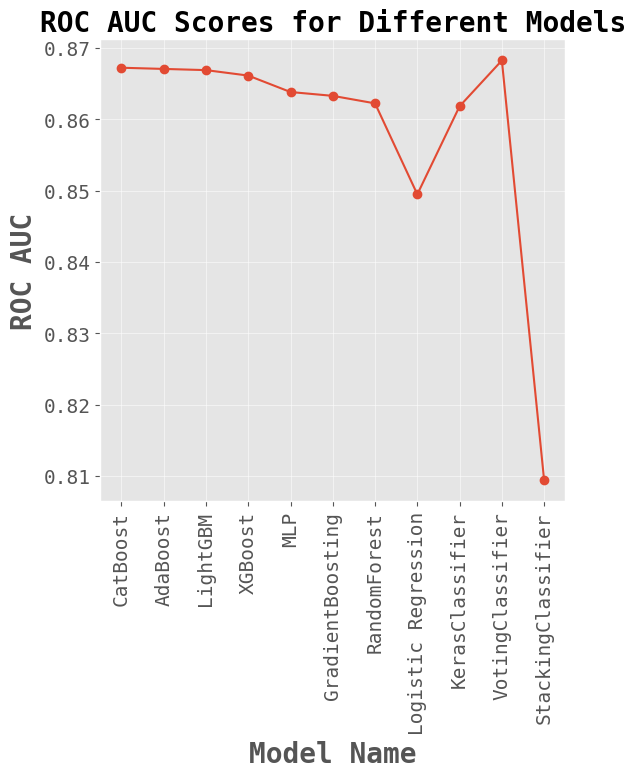

In [120]:
# create a line plot
plt.plot(results['model_name'], results['roc_auc'], '-o')

# set the x and y axis labels
plt.xlabel('Model Name')
plt.ylabel('ROC AUC')

# set the title of the chart
plt.title('ROC AUC Scores for Different Models')

# rotate x-tick labels by 90 degrees
plt.xticks(rotation=90)

# show the chart
plt.show()

### As seen, the scores of first four best models in a voting classifier gives us the best model

In [125]:
# results.to_csv('finalresults.csv', index=False) # Save the file 

### Lets see how important each feature was in the VC model:

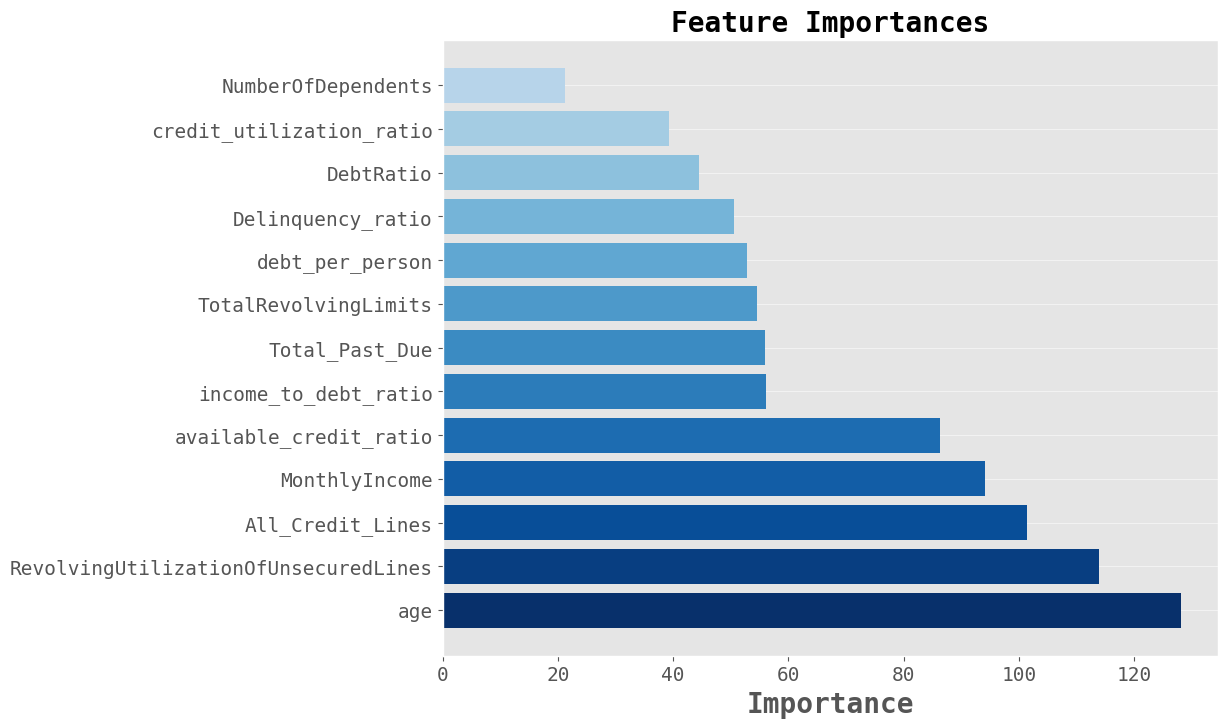

In [162]:
importances = []
for clf in vc.estimators_:
    try:
        importances.append(clf.feature_importances_)
    except AttributeError:
        # some models may not have feature_importances_
        pass

# Set figure size and color palette
plt.figure(figsize=(10, 8))
colors = plt.cm.Blues(np.linspace(1, 0.3, X_train_d.shape[1]))

# Compute mean importances and sort indices
mean_importances = np.mean(importances, axis=0)
sorted_indices = np.argsort(mean_importances)[::-1]
mean_importances = mean_importances[sorted_indices]

# Create horizontal bar chart
plt.barh(range(X_train.shape[1]), mean_importances, color=colors)
plt.yticks(range(X_train.shape[1]), features[sorted_indices])
plt.xlabel('Importance')
plt.title('Feature Importances')

# Add grid lines
plt.grid(axis='x')

# Show plot
plt.show()

### This is intresting as the RevolvingUtilizationOfUnsecuredLines was the most important feature for most of the models when checking using permutation importance. 

---

<a id="68"></a>

## Model Interpretation

<a id="682"></a>

## SHAP

In [150]:
# Retreiving the CatBoost Model from Voting Classifier

estimators2 = []
for index, row in results.head(4).iterrows():
    variable_name = row['model_name'] + '_model'
    variable_value = row['best_model']
    globals()[variable_name] = variable_value
    estimators2.append((row['model_name'], variable_name))

In [151]:
estimators2

[('CatBoost', 'CatBoost_model'),
 ('AdaBoost', 'AdaBoost_model'),
 ('LightGBM', 'LightGBM_model'),
 ('XGBoost', 'XGBoost_model')]

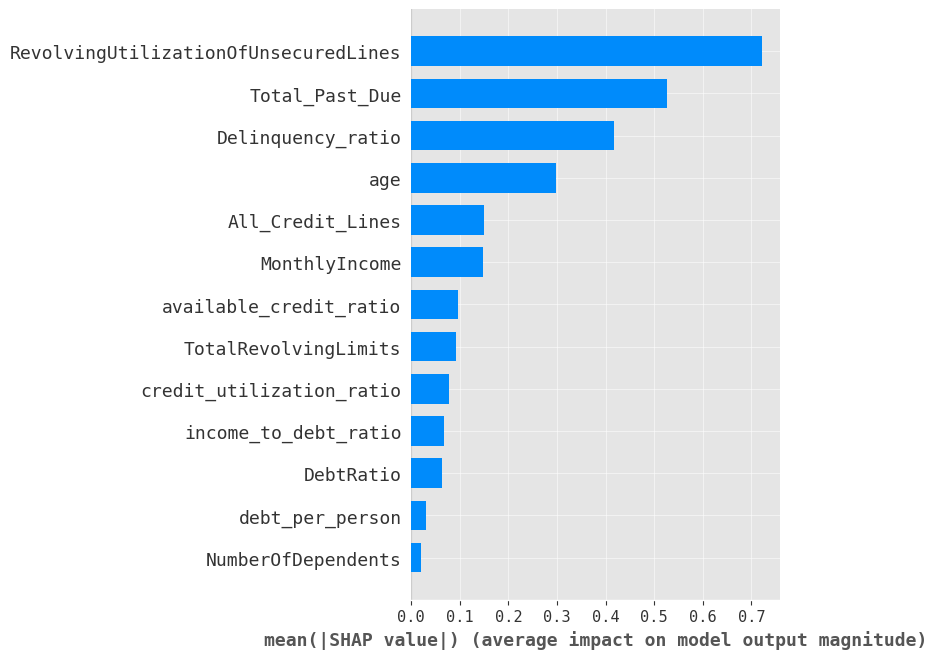

In [167]:
# Create a SHAP explainer object for the model
explainer = shap.TreeExplainer(CatBoost_model)

# Compute the SHAP values for the dataset
shap_values = explainer.shap_values(X_test_d)

# Visualize the SHAP values and feature importances
shap.summary_plot(shap_values, X_test_d, plot_type="bar")

### The above plot is similar to a feature importance graph and shows which variable had the highest impact.

## SHAP Violin Plot

### The plot shows a description of each variable and the Chance of Delinquency. The Stronger the red color indicates the higher the delinquency chances.

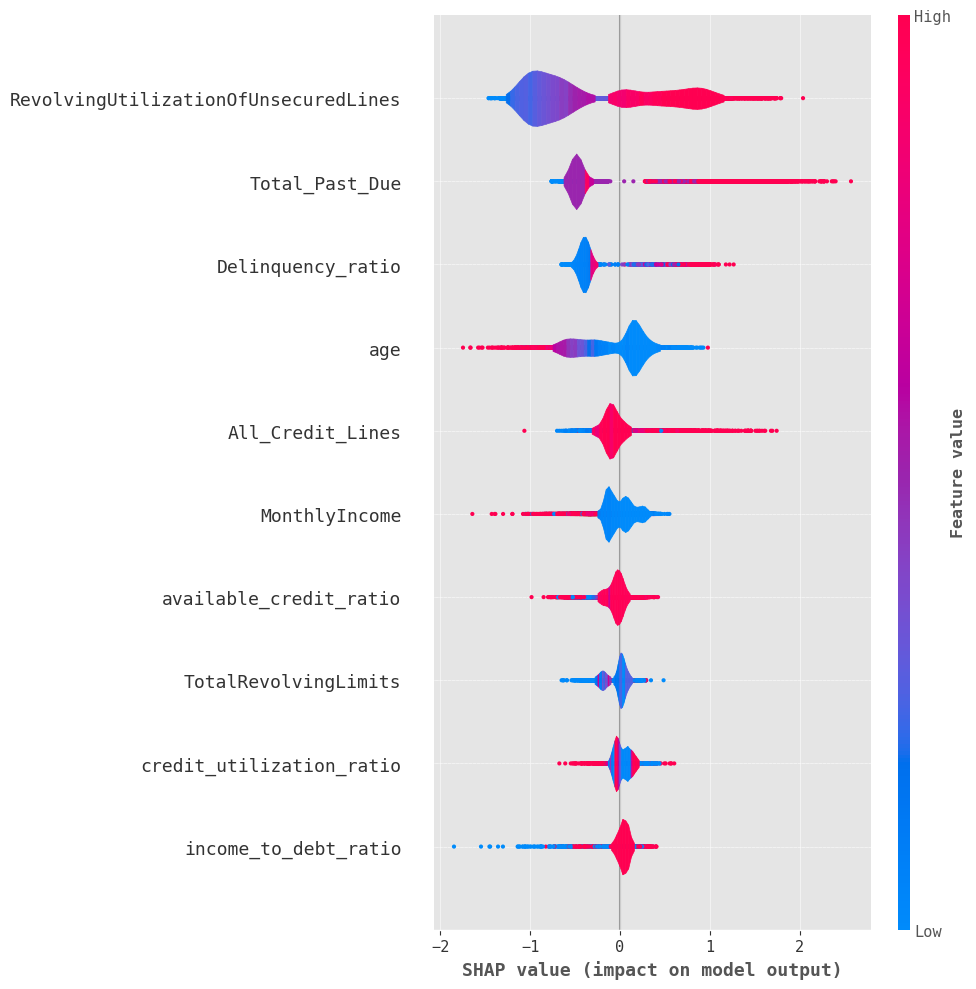

In [170]:
shap.summary_plot(shap_values, X_test_d, max_display=10,
                  plot_type='violin', plot_size=(10,10), title = 'Shap Summary Plot')

<a id="69"></a>

## Test the Model

_Not done due to time constraint and restarting Kernel_

In [206]:
model = results['best_model'][9]

In [209]:
df_test = pd.read_csv('cs-test.csv')

In [210]:
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
X_test = df_test.drop(columns=['SeriousDlqin2yrs'])
pred = model.predict_proba(X_test)[:,1]
pred

### This is the final step to the prediction. Running this with a test set will give us our final predictions.

---

<a id="7"></a>
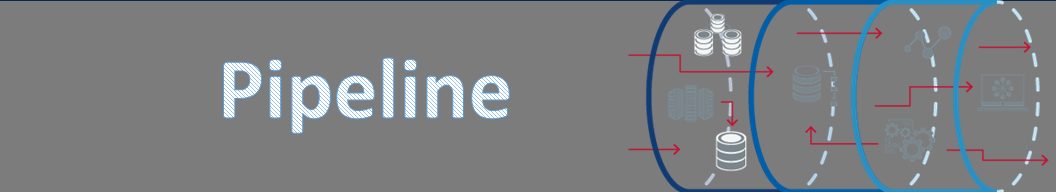

[Back to Contents](#100)

In [175]:
clean_credit_data_ft = FunctionTransformer(clean_credit_data)

In [176]:
feature_engineering_ft = FunctionTransformer(feature_engineering)

In [177]:
steps = [('Data_Cleaning', clean_credit_data_ft), # step 1
         ('Feature_Engineering', feature_engineering_ft), # step 2
         ('Scaler', RobustScaler()), # step 3
         ('ROS', RandomOverSampler()), # step 4
         ('VotingClassifier', VotingClassifier(estimators=estimators, voting='soft'))] # step 5

pipeline = Pipeline(steps)

In [178]:
Pipeline=Pipeline(steps=steps)

In [179]:
Pipeline

Pipeline(steps=[('Data_Cleaning',
                 FunctionTransformer(func=<function clean_credit_data at 0x00000232B2DED9D0>)),
                ('Feature_Engineering',
                 FunctionTransformer(func=<function feature_engineering at 0x00000232C4DE5A60>)),
                ('Scaler', RobustScaler()), ('ROS', RandomOverSampler()),
                ('VotingClassifier',
                 VotingClassifier(estimators=[('CatBoost',
                                               <catboost.core.CatBoostClas...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_thresho

### Final Prediction using pipeline

_Not done due to time constraint and restarting Kernel_

In [ ]:
Pipeline.fit(X_train, y_train)

dump(Pipeline, 'predict.joblib') # Saving Pipeline

# Load the pipeline from the file
loaded_pipeline = load('predict.joblib')

# Use the loaded pipeline to make predictions

df_test = pd.read_csv('cs-test.csv') # Loading test dataset
df_test.drop('Unnamed: 0', axis=1, inplace=True)
X_test = df_test.drop(columns=['SeriousDlqin2yrs'])
y_pred = loaded_pipeline.predict(X_test)
y_pred

### The Pipeline might not run as there as some numpy features like drop that need to incorporated using different transformers to the pipeline. 

<a id="8"></a>


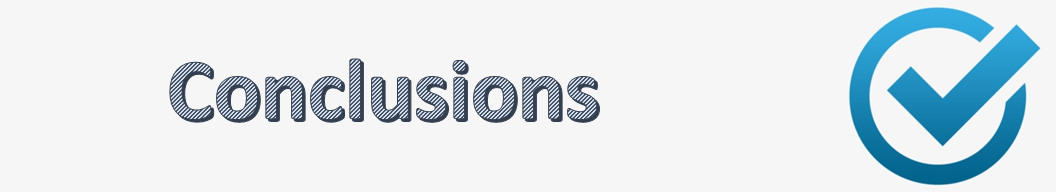

[Back to Contents](#100)

<font size = 4>

The Give me Some Credit dataset provided an excellent opportunity to build a Machine Learning (ML) portfolio, aimed at predicting the likelihood of Financial Distress. The **chosen ML model, a Voting Classifier,** was able to provide a highly accurate prediction based on the available data.

The primary evaluation metric for the model was the **Area Under the Receiver Operating Characteristic curve (AUC_ROC)**. AUC_ROC is a widely-used metric in classification models, and it measures the model's ability to distinguish between positive and negative cases. The Voting Classifier achieved an AUC_ROC score of 0.86823, indicating that it performed exceptionally well in predicting the likelihood of credit default.

**Boosting Algorithms** worked the best with this model. They are effective in handling complex datasets, including both continuous and categorical variables, missing values, imbalanced datasets, and overfitting. These algorithms sequentially add new models that correct the errors of the previous ones, prioritize the misclassified positive cases, and use regularization techniques to prevent overfitting and improve the model's generalization performance. In the context of credit risk prediction, Boosting algorithms, such as Gradient Boosting, can effectively handle the Give me Some Credit dataset's imbalanced nature, which contains many variables and complex relationships between them. The best model was given by **CatBoost**. This is a algorithm that works great with Categorical Data. CatBoost's ability to handle missing values and overfitting also helped improve the robustness and generalization performance of the model. Overall, while Boosting algorithms, in general, are effective for credit risk prediction, CatBoost's specific features make it a suitable and effective approach for the specific project carried out.
 
One of the significant advantages of the Voting Classifier is its ability to combine multiple algorithms to create a more robust model. In this portfolio, four different boosting algorithms were combined to create the final Voting Classifier based on their individual AUC scores. This approach allowed the model to leverage the strengths of each algorithm and improve its overall performance.    
    
The **Highest score was 0.86955 in the Kaggle competition** and the score of **0.86823 puts this model in the 44th Position**. 
There was a random_state in which the CatBoost ML model had given a score of 0.86918, but i wasn't able to repeat it. A bit more tuning and maybe choosing a larger train set could benefit. The outlier removed could also have changed the score of this Model.

Next step would be to run this model with the test dataset and upload in Kaggle to see real score.
    
Overall, the ML portfolio built using the Give me Some Credit dataset, with the Voting Classifier as the primary model and AUC_ROC as the evaluation metric, demonstrated excellent performance in predicting Financial Distress. The portfolio could be further improved by incorporating additional data sources, refining the feature engineering process, or trying other ML models. However, based on the results of this project, the Voting Classifier represents a robust and accurate solution for predicting  Financial Distress.